<a href="https://colab.research.google.com/github/rajiv0100/data_science_projects/blob/main/machine_learning_rajiv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title** - Sales Prediction: Predicting Sales of a major store chain Rossmann



##### **Project Type**    - EDA/Regression
##### **Contribution**    - Individual

Rajiv Negi






# **Project Summary -**



*   In the Rossmann sales prediction project there is a dataset which contains sales information.

*   The shape of Rossmann dataset = 1017209, 8 and Store dataset = 1115, 10.

*  In both dataset ‘Store’ column is common. So we do inner join on the basis of column ‘Store’
*   This dataset is a live dataset of Rossmann Stores. On analyzing this problem we observe that Rossmann problem is a regression problem and our primarily goal is to predict the sales figures of Rossmann problem.


*   In this Notebook we are going to work on following topics:-


*   Analyzing the dataset by using Exploratory Data Analysis using exponential moving averages analysis trends and seasonality in Rossmann dataset Analyze Regression using following prediction analysis.


A) Linear Regression Analysis.
  B)Elastic Regression (Lasso & Ridge Regression).

C) Decision tree.
D) Random Forest Regression.


# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.
You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import missingno as msno
import matplotlib
import matplotlib.pylab as pylab

%matplotlib inline
matplotlib.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 8,6

import math
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LassoLars
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNet

### Dataset Loading

In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading the file
rossmann_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project/Rossmann Stores Data.csv', low_memory= False)
store_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project/store.csv', low_memory= False)


### Dataset First View

In [4]:
# Dataset First Look
rossmann_df.head(5)

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [ ]:
store_df.head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
rossmann_df.shape


(1017209, 9)

In [5]:
store_df.shape

(1115, 10)

### Dataset Information

In [ ]:
# Dataset Info
rossmann_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
rossmann_df.duplicated().sum()


np.int64(0)

In [6]:
store_df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(rossmann_df.isnull().sum())

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


In [7]:
print(store_df.isnull().sum())

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


**Describe the data set**

In [ ]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
percentiles = [0.01, 0.25, 0.5, 0.75, 0.95,0.99]
rossmann_df.describe(percentiles=percentiles)

Store  DayOfWeek   Sales  Customers    Open   Promo  SchoolHoliday
count 1017209    1017209 1017209    1017209 1017209 1017209        1017209
mean      558          4    5774        633       1       0              0
std       322          2    3850        464       0       0              0
min         1          1       0          0       0       0              0
1%         11          1       0          0       0       0              0
25%       280          2    3727        405       1       0              0
50%       558          4    5744        609       1       0              0
75%       838          6    7856        837       1       1              0
95%      1060          7   12137       1362       1       1              1
99%      1104          7   17160       2267       1       1              1
max      1115          7   41551       7388       1       1              1

In [ ]:
store_df.describe(percentiles=percentiles)

Store  CompetitionDistance  CompetitionOpenSinceMonth  \
count   1115                 1112                        761   
mean     558                 5405                          7   
std      322                 7663                          3   
min        1                   20                          1   
1%        12                   50                          1   
25%      280                  718                          4   
50%      558                 2325                          8   
75%      836                 6882                         10   
95%     1059                20145                         12   
99%     1104                35145                         12   
max     1115                75860                         12   

       CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  
count                       761    1115              571              571  
mean                       2009       1               24             2012  
std                           6       1               14                2  
min                        1900       0                1             2009  
1%                         1994       0                1             2009  
25%                        2006       0               13             2011  
50%                        2010       1               22             2012  
75%                        2013       1               37             2013  
95%                        2014       1               45             2014  
99%                        2015       1               48             2015  
max                        2015       1               50             2015

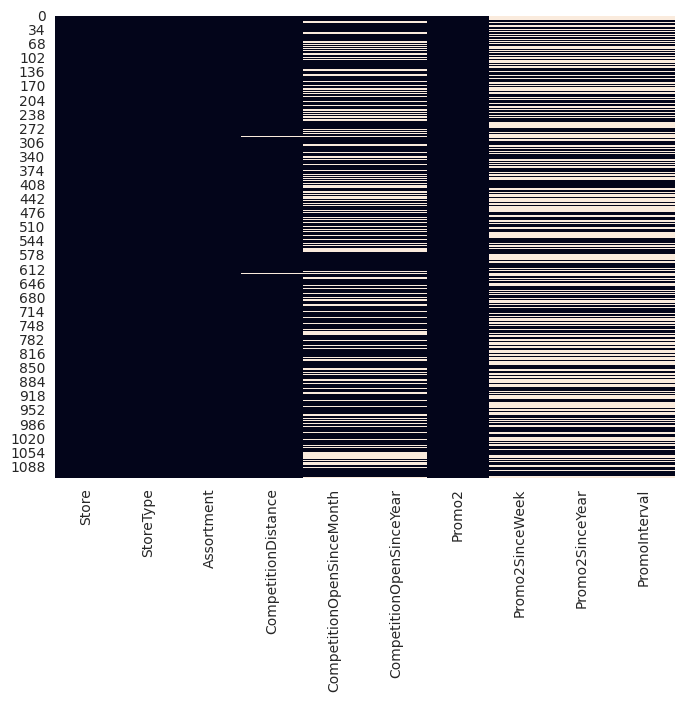

In [ ]:
# Visualizing the missing values
sns.heatmap(store_df.isnull(), cbar=False)
plt.show()

### What did you know about your dataset?



*   Rossmann dataset' is having 1017209 rows and 9 columns and does not have any null value.

*   'Stores dataset' is having 1115 rows and 10 columns. It contains null values in total six features viz.CompetitionDistance,CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek,Promo2SinceYear and PromoInterval.
*   There are no duplicate values present in both the datasets.


*   There are total 4 categorical features in 'Rossmann' dataset namely Open, Promo, StateHoliday and SchoolHoliday and 'Stores' contain categorical features namely StoreType, Assortment, Promo2, PromoInterval.



## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
rossmann_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [ ]:
store_df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
# Dataset Describe

### Variables Description

Rossmann stores data.csv - Historical data including sales


*  Store - Unique identifier for each store.
*   DayOfWeek - Day of the week as a number (1 = Monday, 7 = Sunday).


*   Date - The calendar date of the record.

*   Sales - The total sales made at the store on the given date (in monetary units).
*   Customers - The number of customers who visited the store on that day.


*   Open -  Indicates whether the store was open (1) or closed (0) on that day.


*   Promo - Indicates whether the store was running a promotion on that day.

*   StateHoliday - Indicates whether the day was a state holiday:

*   '0' = No holiday


*   'a' = Public holiday


*   'b' = Easter holiday
*   'c' = Christmas



*   SchoolHoliday - Whether the (local) schools were closed on that day.










store.csv - Supplemental information about stores

Data Fields


*   id - A unique identifier for each entry in the dataset.
*   store - The identifier for a specific store.


*   sales - The daily sales for a given store (target variable to predict).

*   customers -The number of customers visiting the store on a particular day.
*   open - Indicates whether the store was open (1) or closed (0) on a given day.


*  StateHoliday -Indicates whether the day was a state holiday (a, b, c represent different holiday types, and 0 indicates no holiday).


*   SchoolHoliday - Indicates whether the day was a school holiday (1 = Yes, 0 = No).

*  Storetype - Represents the type of store (e.g., a, b, c, d).
*   Assortment - Describes the level of assortment available in the store (a = basic, b = extra, c = extended).


*   CompetitionDistance - Distance to the nearest competitor store (in meters).
promo - Indicates whether a store was running a promotion that day (1 = Yes, 0 = No).


*   promo2 -Indicates whether the store is part of a continuous promotion (1 = Yes, 0 = No).


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
unique_vls = rossmann_df.apply(lambda col : col.unique())
print(unique_vls)
print('*'*40 )
print("unique value count")
print(rossmann_df.nunique())

Store            [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
DayOfWeek                                    [5, 4, 3, 2, 1, 7, 6]
Date             [2015-07-31, 2015-07-30, 2015-07-29, 2015-07-2...
Sales            [5263, 6064, 8314, 13995, 4822, 5651, 15344, 8...
Customers        [555, 625, 821, 1498, 559, 589, 1414, 833, 687...
Open                                                        [1, 0]
Promo                                                       [1, 0]
StateHoliday                                          [0, a, b, c]
SchoolHoliday                                               [1, 0]
dtype: object
****************************************
unique value count
Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         4
SchoolHoliday        2
dtype: int64


In [ ]:
unique_vls_store = store_df.apply(lambda col : col.unique())
print(unique_vls_store)
print('*'*40 )
print("unique value count")
print(store_df.nunique())

Store                        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
StoreType                                                         [c, a, d, b]
Assortment                                                           [a, c, b]
CompetitionDistance          [1270.0, 570.0, 14130.0, 620.0, 29910.0, 310.0...
CompetitionOpenSinceMonth    [9.0, 11.0, 12.0, 4.0, 10.0, 8.0, nan, 3.0, 6....
CompetitionOpenSinceYear     [2008.0, 2007.0, 2006.0, 2009.0, 2015.0, 2013....
Promo2                                                                  [0, 1]
Promo2SinceWeek              [nan, 13.0, 14.0, 1.0, 45.0, 40.0, 26.0, 22.0,...
Promo2SinceYear              [nan, 2010.0, 2011.0, 2012.0, 2009.0, 2014.0, ...
PromoInterval                [nan, Jan,Apr,Jul,Oct, Feb,May,Aug,Nov, Mar,Ju...
dtype: object
****************************************
unique value count
Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654


## 3. ***Data Wrangling***

### Data Wrangling Code

**1. Null values and outliers treatment**

a). Handling null values from CompetitionDistance feature.

In [8]:
# fetching the observations which contains null values in CompetitionDistance feature
store_df[store_df["CompetitionDistance"].isnull()]

Store StoreType Assortment  CompetitionDistance  \
290    291         d          a                  NaN   
621    622         a          c                  NaN   
878    879         d          a                  NaN   

     CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
290                        NaN                       NaN       0   
621                        NaN                       NaN       0   
878                        NaN                       NaN       1   

     Promo2SinceWeek  Promo2SinceYear    PromoInterval  
290              NaN              NaN              NaN  
621              NaN              NaN              NaN  
878              5.0           2013.0  Feb,May,Aug,Nov

<Axes: xlabel='CompetitionDistance'>

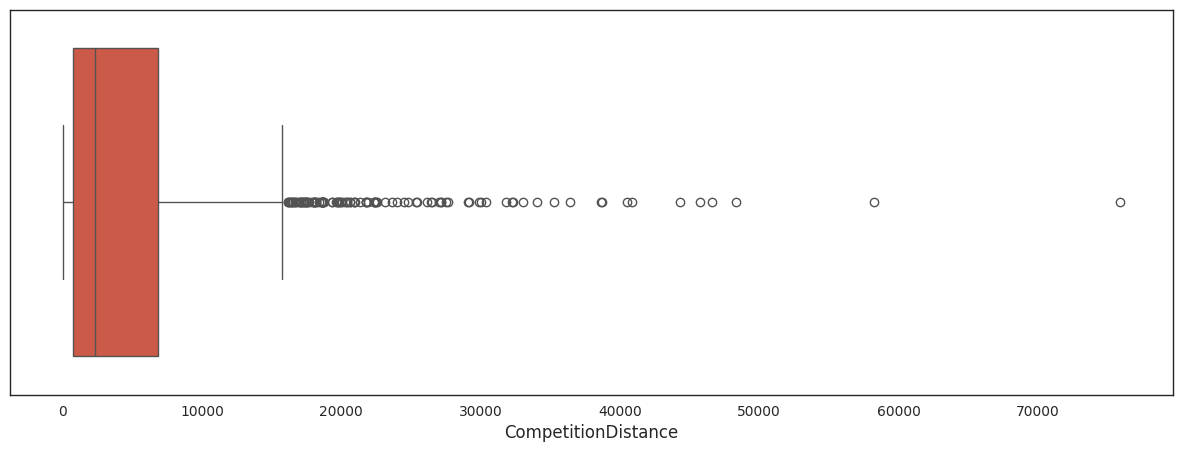

In [9]:
# plotting seaborn box plot to check the outliers in CompetitionDistance features
plt.figure(figsize=(15,5))
sns.boxplot(x= store_df["CompetitionDistance"])

In order to fill the null values of CompetitionDistance we have 4 options:


*  Zero(0) >> Not effective as the corresponding values for CompetitionSinceMonth and CompetitionSinceYear are not zero.

*   Mean >> Replacing null values with mean will create blunders as it contains outliers and mean is influenced with outliers.
*   Median >> To get good results replacing with median can be a better choice.


*   Mode >> Mode can also help to fill the null values in our case.

Since, we have two options(Mode and Median) we are going with the median.






In [10]:
# filling null values
store_df["CompetitionDistance"].fillna(store_df["CompetitionDistance"].median(), inplace=True)

<ipython-input-10-9f1a22344b60>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store_df["CompetitionDistance"].fillna(store_df["CompetitionDistance"].median(), inplace=True)


In [11]:
# rechecking if we have any further null values in CompetitionDistance feature
store_df[store_df["CompetitionDistance"].isnull()].sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                         0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                  0
dtype: object

b). Handling null values from CompetitionOpenSinceMonth and CompetitionOpenSinceYear feature.

In [12]:
# fetching the observations which contains null values in CompetitionOpenSinceMonth and CompetitionOpenSinceYear feature
store_df[store_df["CompetitionOpenSinceMonth"].isnull()]

Store StoreType Assortment  CompetitionDistance  \
11       12         a          c               1070.0   
12       13         d          a                310.0   
15       16         a          c               3270.0   
18       19         a          c               3240.0   
21       22         a          a               1040.0   
...     ...       ...        ...                  ...   
1095   1096         a          c               1130.0   
1099   1100         a          a                540.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   
1114   1115         d          c               5350.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
11                          NaN                       NaN       1   
12                          NaN                       NaN       1   
15                          NaN                       NaN       0   
18                          NaN                       NaN       1   
21                          NaN                       NaN       1   
...                         ...                       ...     ...   
1095                        NaN                       NaN       1   
1099                        NaN                       NaN       1   
1112                        NaN                       NaN       0   
1113                        NaN                       NaN       0   
1114                        NaN                       NaN       1   

      Promo2SinceWeek  Promo2SinceYear     PromoInterval  
11               13.0           2010.0   Jan,Apr,Jul,Oct  
12               45.0           2009.0   Feb,May,Aug,Nov  
15                NaN              NaN               NaN  
18               22.0           2011.0  Mar,Jun,Sept,Dec  
21               22.0           2012.0   Jan,Apr,Jul,Oct  
...               ...              ...               ...  
1095             10.0           2014.0  Mar,Jun,Sept,Dec  
1099             14.0           2011.0   Jan,Apr,Jul,Oct  
1112              NaN              NaN               NaN  
1113              NaN              NaN               NaN  
1114             22.0           2012.0  Mar,Jun,Sept,Dec  

[354 rows x 10 columns]

<Axes: ylabel='CompetitionOpenSinceMonth'>

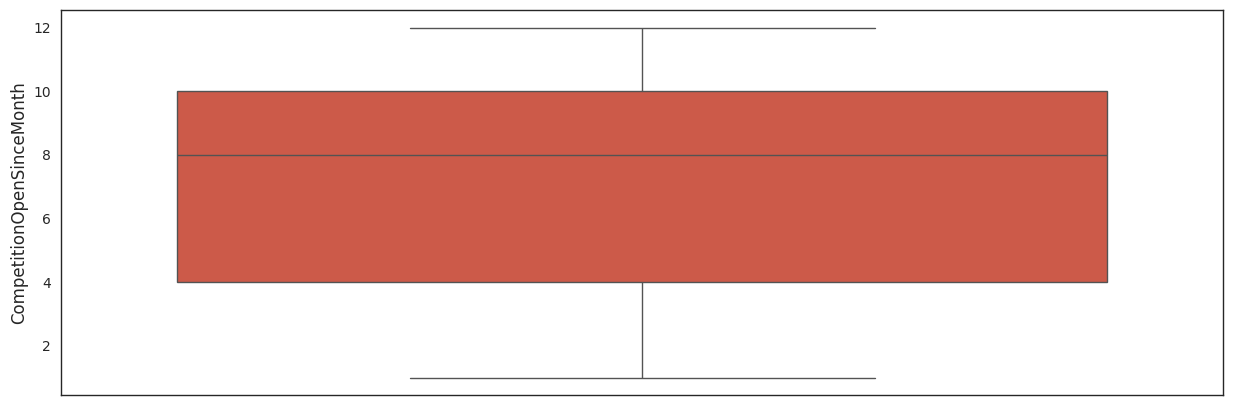

In [13]:
# plotting seaborn box plot to check the outliers in CompetitionOpenSinceMonth and CompetitionOpenSinceYear features
plt.figure(figsize=(15,5))
sns.boxplot(store_df["CompetitionOpenSinceMonth"])

<Axes: ylabel='CompetitionOpenSinceYear'>

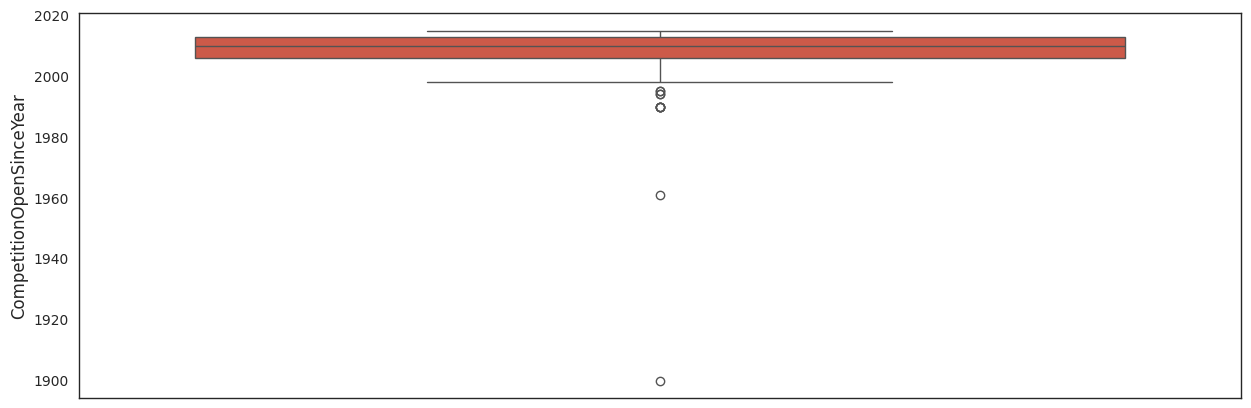

In [14]:
# plotting seaborn box plot to check the outliers in CompetitionOpenSinceMonth and CompetitionOpenSinceYear features
plt.figure(figsize=(15,5))
sns.boxplot(store_df["CompetitionOpenSinceYear"])

In [15]:
# filling null values of CompetitionOpenSinceMonth
store_df["CompetitionOpenSinceMonth"].fillna(store_df["CompetitionOpenSinceMonth"].mode()[0], inplace=True)

<ipython-input-15-105d203422d1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store_df["CompetitionOpenSinceMonth"].fillna(store_df["CompetitionOpenSinceMonth"].mode()[0], inplace=True)


In [16]:
# filling null values of CompetitionOpenSinceYear
store_df["CompetitionOpenSinceYear"].fillna(store_df["CompetitionOpenSinceYear"].mode()[0], inplace=True)

<ipython-input-16-0d1ef107e769>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store_df["CompetitionOpenSinceYear"].fillna(store_df["CompetitionOpenSinceYear"].mode()[0], inplace=True)


In [17]:
# rechecking if we have any null values in CompetitionOpenSinceMonth and CompetitionOpenSinceYear
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


c). Handling null values from Promo2SinceWeek, Promo2SinceYear and PromoInterval feature.

Since corresponding value where Promo2 is 0 for features Promo2SinceWeek, Promo2SinceYear and PromoInterval having null values. So, we are replacing null values with 0.

In [18]:
# Replacing all the null values of Promo2SinceWeek, Promo2SinceYear and PromoInterval with 0.
store_df["Promo2SinceWeek"].fillna(0, inplace=True)
store_df["Promo2SinceYear"].fillna(0, inplace=True)
store_df["PromoInterval"].fillna(0, inplace=True)

<ipython-input-18-905d46857a27>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store_df["Promo2SinceWeek"].fillna(0, inplace=True)
<ipython-input-18-905d46857a27>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [19]:
# rechecking if our features contains more null values
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


**2. Merging datasets**

In [20]:
# using inner join for our further analysis
df= pd.merge(rossmann_df, store_df, on="Store", how= "inner")
print(df.shape)

(1017209, 18)


In [ ]:
#checking info of our final merged dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

**3. Typecasting**

In [ ]:
# Checking dtypes of all the variables of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [21]:
# changing dtype into required format from both the datasets
df["Date"]= pd.to_datetime(df["Date"],format="%Y-%m-%d") # Changed format string to match the actual date format
df["CompetitionDistance"]= df["CompetitionDistance"].astype(int)
df["CompetitionOpenSinceMonth"]= df["CompetitionOpenSinceMonth"].astype(int)
df["CompetitionOpenSinceYear"]= df["CompetitionOpenSinceYear"].astype(int)
df["Promo2SinceWeek"]= df["Promo2SinceWeek"].astype(int)
df["Promo2SinceYear"]= df["Promo2SinceYear"].astype(int)

In [ ]:
# Verifying the dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

# What all manipulations have you done and insights you found?



**1. Null values treatment:**

*   Replaced null values of CompetitionDistance with MEDIAN.

*   Replaced null values of CompetitionOpenSinceMonth and with MODE.

*   Replaced null values of CompetitionOpenSinceMonth and with MODE.
*   Replaced null values of Promo2SinceWeek and with 0.


**2. Merging datasets:** We don't want to compromise with quality and quantity of our dataset in order to get the best accuracy in ML model implementation. So, we were wondering to use the best join for the good results and we got to know with our R&D that every join is giving the same shape of our merged dataset with 0 null values. So, we have decided to go with the inner join.


**3. Typecasting:** In typecasting section we have typecasted the following features in order to visualize it properly and can feed them as input of ML model:


*    Typecasted the Date feature to Datetime format.


*    Typecasted the CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, Promo2SinceYear feature to Integer.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [22]:
# Considering those rows where stores are open and sales are not zero.
df = df[(df['Open']==1) & (df['Sales']!=0)]

# Now since every store in our dataset are opened , we don't need 'Open' column and we will drop this column
df.drop(['Open'],axis=1,inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 844338 entries, 0 to 1017190
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844338 non-null  int64         
 1   DayOfWeek                  844338 non-null  int64         
 2   Date                       844338 non-null  datetime64[ns]
 3   Sales                      844338 non-null  int64         
 4   Customers                  844338 non-null  int64         
 5   Promo                      844338 non-null  int64         
 6   StateHoliday               844338 non-null  object        
 7   SchoolHoliday              844338 non-null  int64         
 8   StoreType                  844338 non-null  object        
 9   Assortment                 844338 non-null  object        
 10  CompetitionDistance        844338 non-null  int64         
 11  CompetitionOpenSinceMonth  844338 non-null  int64       

#### **Chart-1: Checking frequency distribution of continous features-Sales, CompetitionDistance, Customers:**



<ipython-input-42-f22941a88d59>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["Sales"], color="Green", shade = True)  #kernel density estimate (KDE) plot
<ipython-input-42-f22941a88d59>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["CompetitionDistance"], color="Blue", shade = True) #kernel density estimate (KDE) plot
<ipython-input-42-f22941a88d59>:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["Customers"], color="Red", shade = True) #kernel density estimate (KDE) plot


Text(0.5, 1.0, 'Density distribution of Customers')

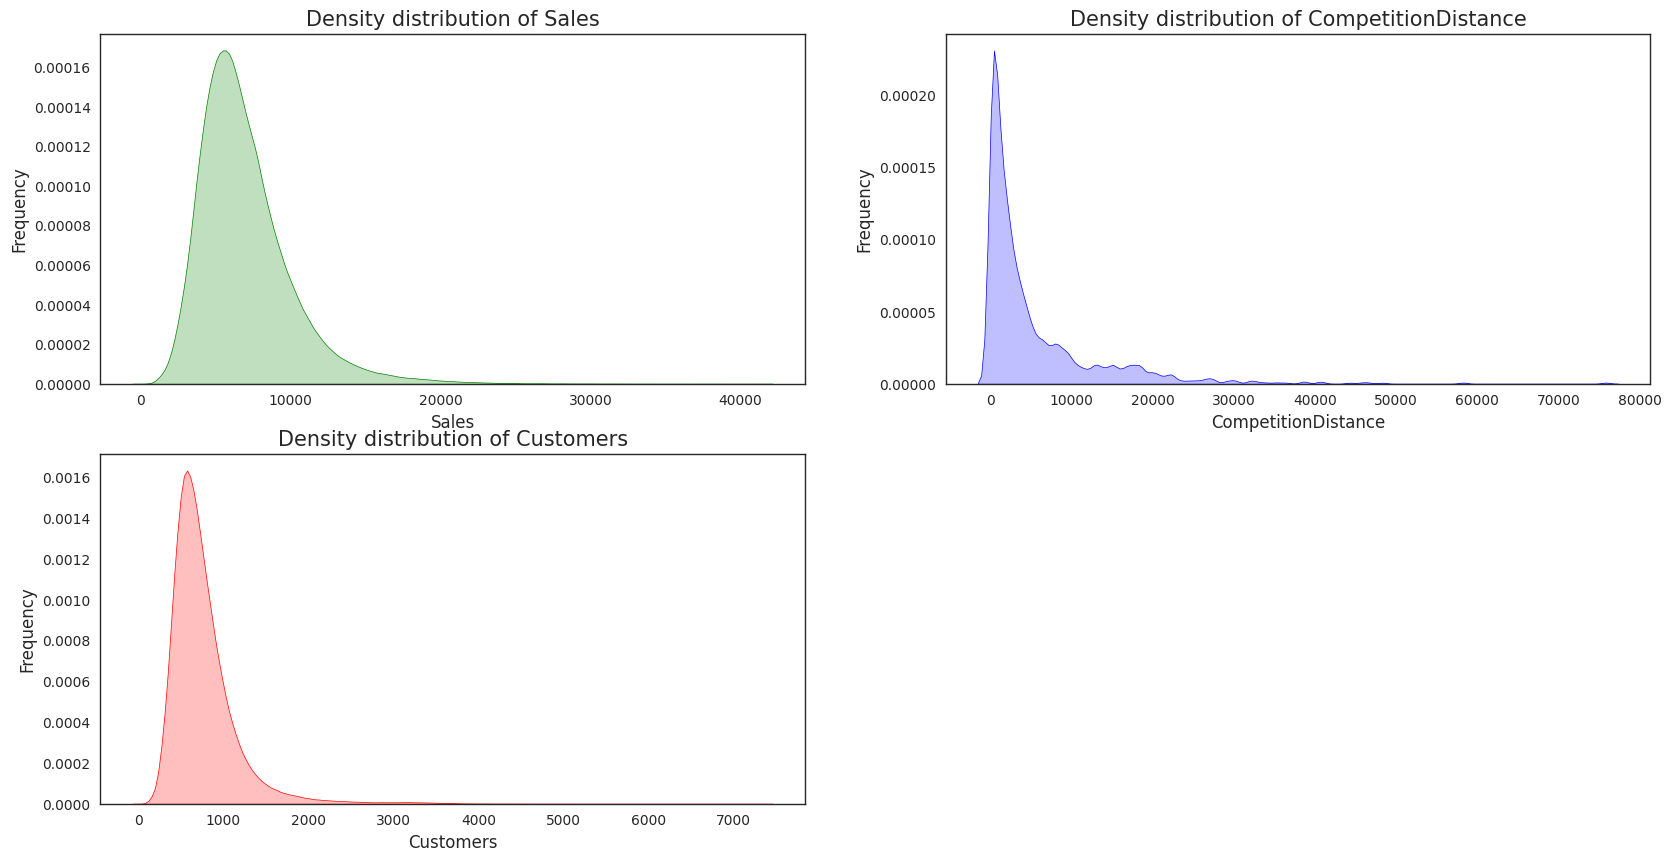

In [ ]:
#Checking Frequency distribution for continous features:
plt.figure(figsize=(20,10))

#First plot(Sales vs Frequency)
plt.subplot(2,2,1)
plt.xlabel("Sales")
plt.ylabel("Frequency")
sns.kdeplot(df["Sales"], color="Green", shade = True)  #kernel density estimate (KDE) plot
plt.title('Density distribution of Sales',size = 15)

#Second plot(CompetitionDistance vs Frequency)
plt.subplot(2,2,2)
plt.xlabel("CompetitionDistance")
plt.ylabel("Frequency")
sns.kdeplot(df["CompetitionDistance"], color="Blue", shade = True) #kernel density estimate (KDE) plot
plt.title('Density distribution of CompetitionDistance',size = 15)

#Third plot(Customers vs Frequency)
plt.subplot(2,2,3)
plt.xlabel("Customers")
plt.ylabel("Frequency")
sns.kdeplot(df["Customers"], color="Red", shade = True) #kernel density estimate (KDE) plot
plt.title('Density distribution of Customers',size = 15)

##### 1. Why did you pick the specific chart?

We picked this chart as it shows whether the observations are high or low and also whether they are concentrated in one area or spread out across the entire scale for continous features only.

##### **2. What is/are the insight(s) found from the chart?**



*  Average Sales value is under 5000 and graph is rightly skewed, which shows most of the stores are open where the middle class resides.

*   We can clearly observe that most of the stores have their competition within 5Km range which indicates mostly competiting stores are located nearby to each other.


*   Average number of customer visiting stores is 700.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



*   As we can see most of the sales are under 1000, to expand their business and sales they should open their stores in posh area or where the upper class lives.
*  We plotted frequency distribution graph for sales, customer and competition distance with the help of which we came to know that many competiting stores are densly located. so, business should plan different strategies to sustain in the competitive market.



#### **Chart - 2 Sales in different months**

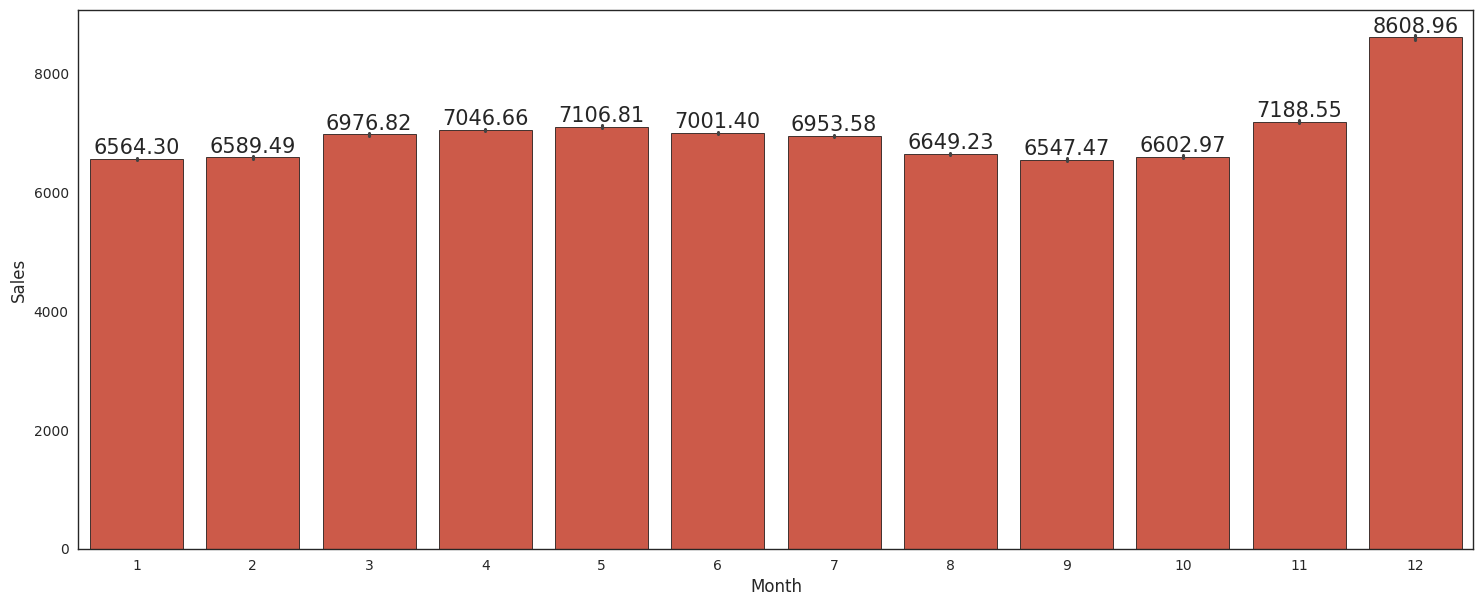

In [ ]:
# Month vs sales
plt.figure(figsize=(18,7))
plots=sns.barplot(x=df['Date'].dt.month,y=df['Sales'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel("Month")

plt.show()

##### 1. Why did you pick the specific chart?

To know the patterns or trends in the data, such as a peak in activity or sales during a particular month of the year.

##### 2. What is/are the insight(s) found from the chart?



*   The countplot highlights that December being a festive month attracts more sale than the rest of the months. Also, November has slightly more sales than other months. This could be due to the 'Black Friday' sale which is very popular across the globe. As Rossmann Stores deals in health and beauty products, it can be guessed that November and December sales are due to the celebratory nature of people who love to buy beauty/health products leading to the sudden increase in sales.




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Yes, definitely these insights create a positive business impact as business owners will try to keep more goods to cater with the business needs and also they can increase the revenue by keeping stores open even on weekends or holidays as customers are aiming to buy more in this period of month.


#### **Chart - 3 Sales vs School Holiday**

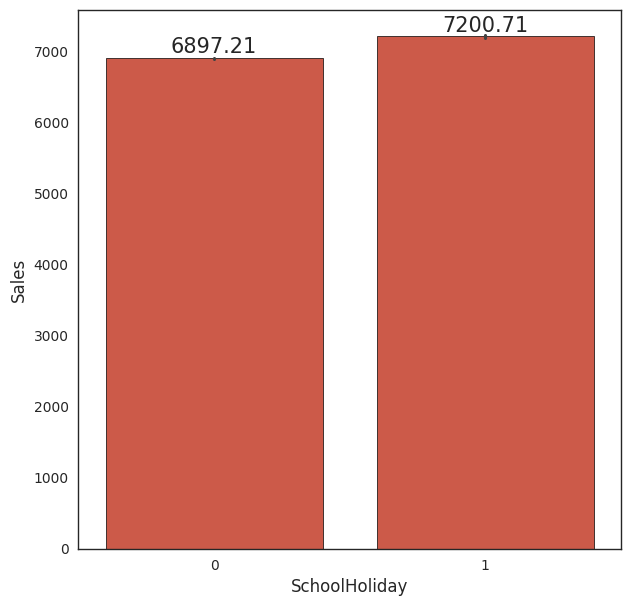

In [ ]:
# Sales vs SchoolHoliday

plt.figure(figsize=(7,7))

plots=sns.barplot(x=df['SchoolHoliday'],y=df['Sales'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()


##### 1. Why did you pick the specific chart?

To know the count of how many sales were made at stores on school holiday and on non-school holiday .



##### 2. What is/are the insight(s) found from the chart?

We can see there is not much difference in sales. However,sales is more on school holidays . It is possible that school holidays are more likely to be associated with families going on vacation or parents taking time off work to spend with their children, which could lead to increase in consumer spendings.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


As we can see from the graph, it is not making much difference whether there is school holiday or not. Still, businesses can target school holidays and run more promotional offers.




####**Chart 4 -Sales vs Year**

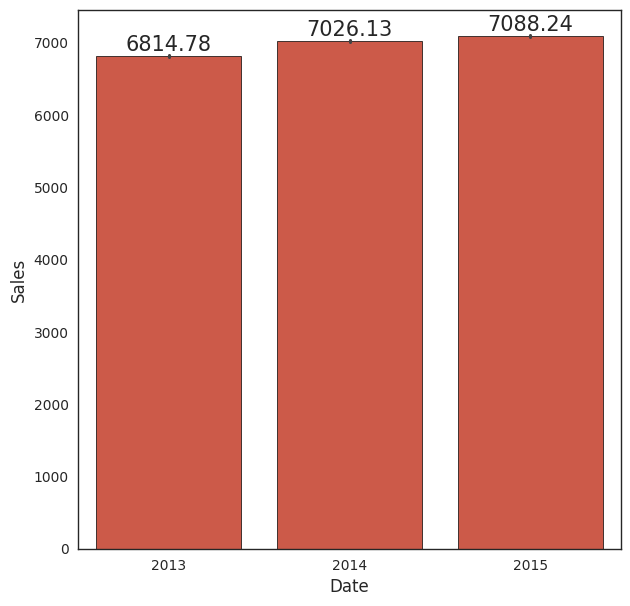

In [ ]:
# Sales vs Year
plt.figure(figsize=(7,7))
plots=sns.barplot(x=df["Date"].dt.year,y=df['Sales'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')


#### 1. Why did you pick the specific chart?

We used this plot to visualize the distribution of sales in 2013, 2014 and 2015. Count plots can help us understand how the values of a variable are distributed within the dataset.

#### 2. What is/are the insight(s) found from the chart?

For any business, year-on-year sales growth is a good parameter to access the store growth. Here we can observe that even though sales are increasing year-on-year, sales growth is not even 10%. So the owners need to put extra efforts to increase the yearly sales.

#### 3. Will the gained insights help creating a positive business impact?

Yes. The insights from this graph are actually very important for the owners. Since the growth is not at very commendable pace, they need to target more customers and bring some changes in the operations.

#### **Chart - 5 Sales vs StoreType**

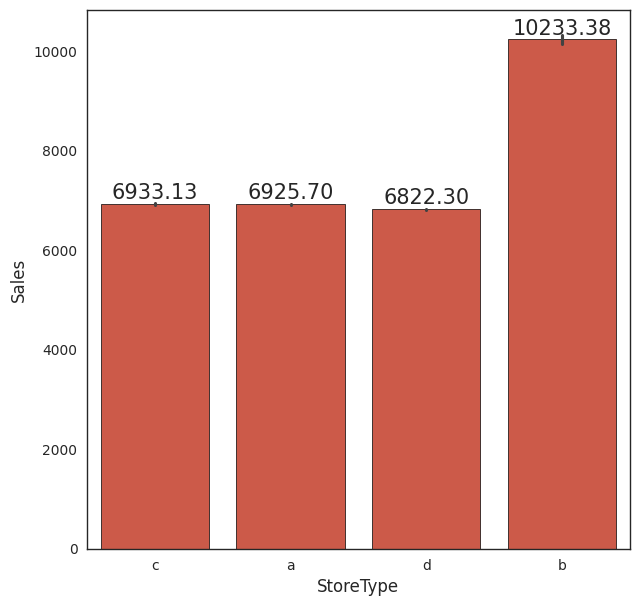

In [ ]:
# Sales vs StoreType
plt.figure(figsize=(7,7))
plots=sns.barplot(x=df['StoreType'],y=df['Sales'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

##### 1. Why did you pick the specific chart?

To know which kind of store is able to generate maximum profit.

##### 2. What is/are the insight(s) found from the chart?



*  Sales for the store type b is the highest . Store type B might be located in a more affluent or high-traffic area, which would increase the number of potential customers. Store type B may have a more favorable layout, which makes it more attractive to customers and makes it easier for them to find the products they want, resulting in more sales
*   Earlier we have drawn the univeriate graph of Store type to know which type of store are more in numbers, and we found that store type a,c,d are more but this is not the case with the sales even though storetype_b are less still they are making more profit.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.




*   Since store type 'a','c' and 'd' are generating similar sales and lower than store type 'b', they can follow the business strategies, marketing tactics of store type 'b'.
*   Company should open stores of type_b to gain more profit





#### **Chart - 6 Sales Vs DayOfWeek**

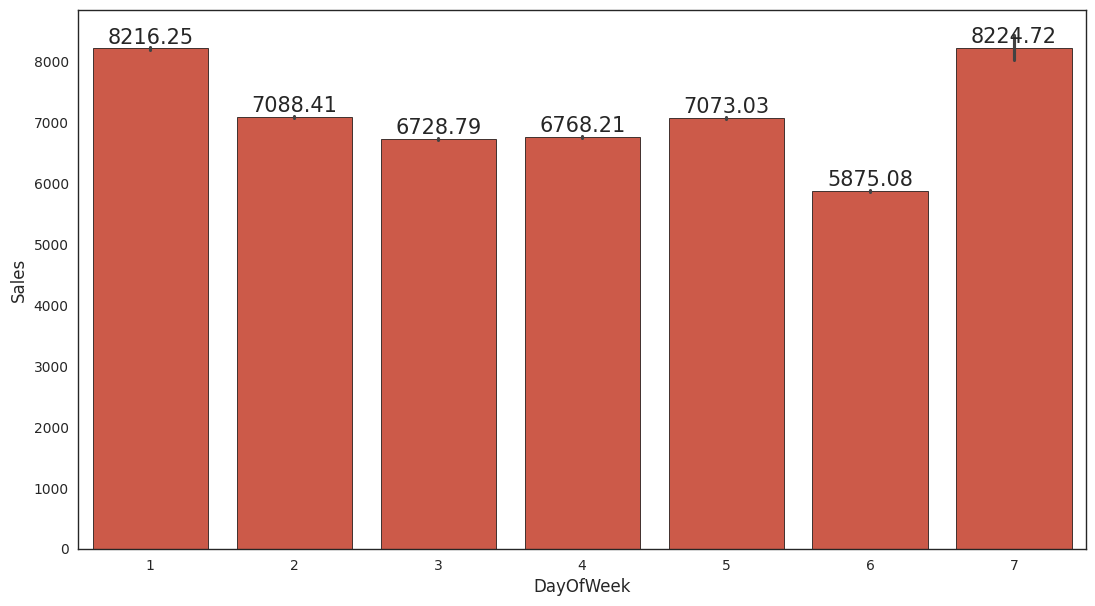

In [ ]:
# Sales Vs DayOfWeek
plt.figure(figsize=(13,7))
plots=sns.barplot(x=df['DayOfWeek'],y=df['Sales'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

We used bar plots because they are a useful tool for visualizing and understanding categorical data, and can be an effective way to communicate information to the wide audience.

##### 2. What is/are the insight(s) found from the chart?

Day 1 and day 7 witness the highest sale indicating they are probably days falling on the weekend. Day 2 to day 6 generate medium to low sales indicating they are probably weekdays where customer footfall is low.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



*   Day 1 and 7 have good number of sales so we can hire more staff specially for these days and delivery boys for more revenue.
*   Since only 2 days are witnessing good sales, store can target remaining 5 days in a week to milk more revenue. It can run exciting offers and attract more customers on weekdays to generate more revenue.



#### **Chart - 7 Checking frequency distribution of continous features-SchoolHoliday, Promo, Promo2:**

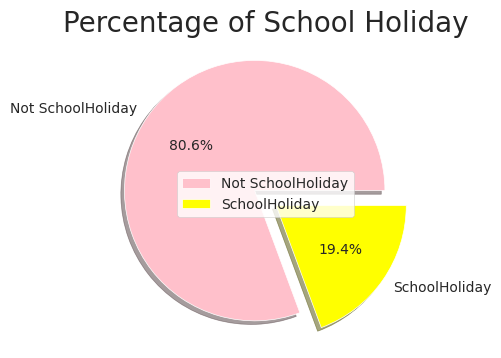

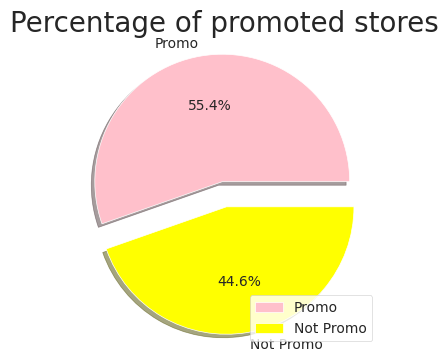

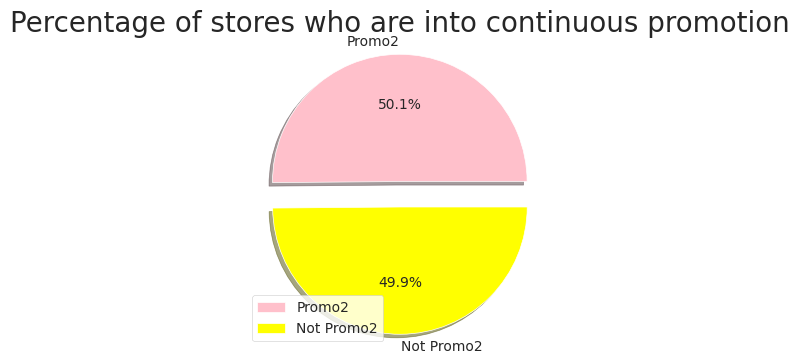

In [ ]:
#Lets check distribution for Some discrete features(SchoolHoliday,Promo,Promo2):
labels = 'Not SchoolHoliday' , 'SchoolHoliday'
sizes = df.SchoolHoliday.value_counts()
colors = ['pink', 'yellow']
explode = (0.2, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title("Percentage of School Holiday",fontsize=20)
plt.legend( labels, loc="best")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(4,4)
plt.show()

labels = 'Promo' , 'Not Promo'
sizes = df.Promo.value_counts()
colors = ['pink', 'yellow']
explode = (0.2, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title("Percentage of promoted stores",fontsize=20)
plt.legend( labels, loc="best")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(4,4)
plt.show()

labels = 'Promo2' , 'Not Promo2'
sizes = df.Promo2.value_counts()
colors = ['pink', 'yellow']
explode = (0.2, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title("Percentage of stores who are into continuous promotion",fontsize=20)
plt.legend( labels, loc="best")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(4,4)
plt.show()


##### 1. Why did you pick the specific chart?

We choose the pie chart as it represents the contribution of each part of the data to a whole where the arc size of each slice is directly proportional to the contribution of that part..

##### 2. What is/are the insight(s) found from the chart?




*   From first pie chart We can say that market will observe approx 20% of school Holidays.

*   We see that 44.6% of stores are into promotions and 55.4% of stores are not into promotions .The reason that more stores are not into promotions may be they don't have the enough budget or they may not see enough need for promotions
*   From Third chart we can infer that there is almost equal percentage of stores getting promoted and the one which are not getting promoted.







##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



*  From above pie chart we understood that percentage of stores getting promoted is more than non promoting stores but sales are positively correlated to promo meaning if stores are getting promoted sale is increasing. So, business should try promoting the stores to increase the revenue.
*   Later we will see if their is any impact of School holiday on sale on sale.



#### Chart -**8 Sales vs Customers**

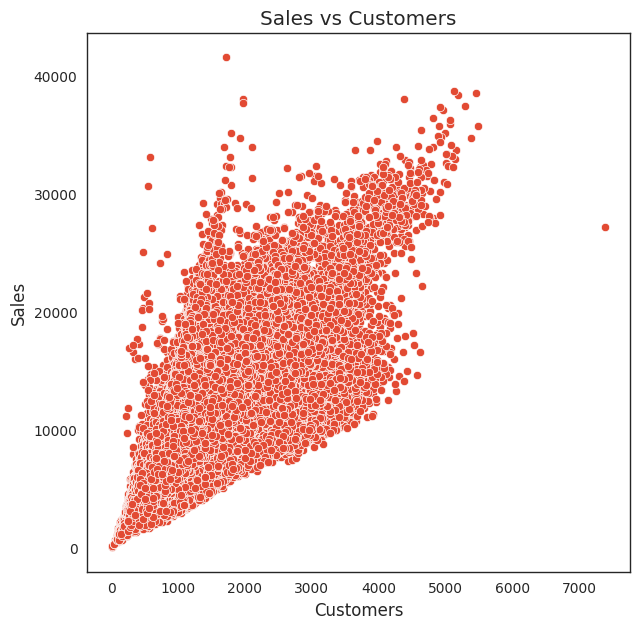

In [ ]:
# Sale Vs Customer
plt.figure(figsize=(7, 7))
sns.scatterplot(x=df['Customers'], y=df['Sales'])
plt.title('Sales vs Customers')
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()


##### 1. Why did you pick the specific chart?

A scatter plot is ideal for visualizing the relationship between two continuous numerical variables

##### 2. What is/are the insight(s) found from the chart?

This above scatterplot show a positive correlation between 'Sales' and 'Customers'. As the number of customers increases, the sales also tend to increase. We understood from the above trend that our data shows linear trend between these two variables - customers and sales.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Customers and sales are directly proportional to each other and are highly correlated. It can help businesses to promote their strategies using marketing campaigns, advertisements to attract more customers ultimately shooting up the sales.




#### **Chart - 9 Sales vs Promo**

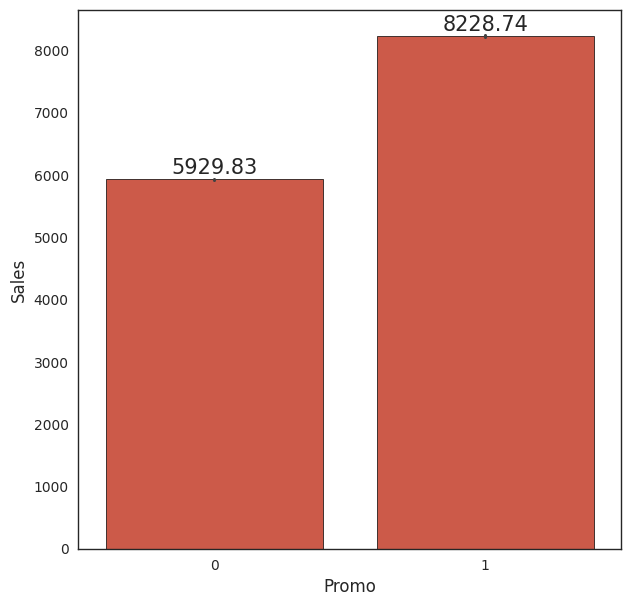

In [ ]:
# Sales vs Promo
plt.figure(figsize=(7,7))
plots=sns.barplot(x=df['Promo'],y=df['Sales'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

To know the count of how many sales were made at stores that were running promotions and how many were made at stores that were not running promotions. We used bar plots because they are a useful tool for visualizing and understanding categorical data, and can be an effective way to communicate information to the wide audience

##### 2. What is/are the insight(s) found from the chart?

From the above plot we see the effectiveness of promotions on increasing sales. So we can infer that as the stores are getting promoted, sales are increasing on large basis showing positive correlation between promo and sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Business owners should try to promote the stores to sustain in the market eventually resulting increment in the sales amount.

#### **Chart - 10 Sales Vs Promo 2**

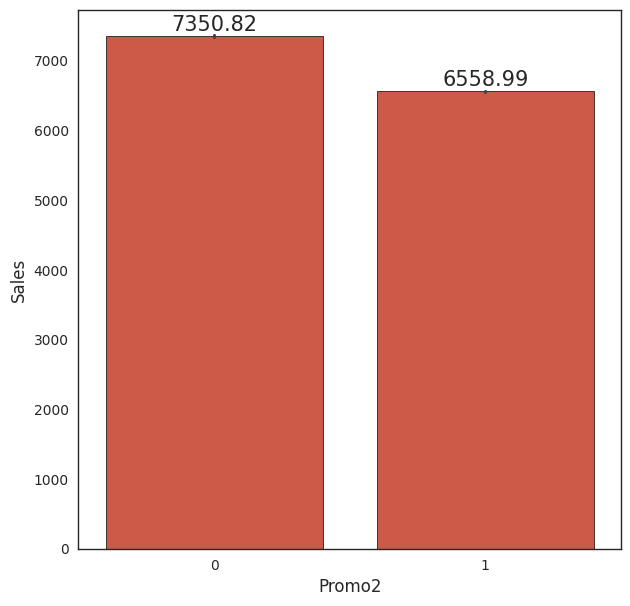

In [ ]:
plt.figure(figsize=(7,7))

plots=sns.barplot(x=df['Promo2'],y=df['Sales'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')


##### 1. Why did you pick the specific chart?

A bar chart is the best choice here because It clearly displays the average sales comparison between the two categories of the Promo2 variable

##### 2. What is/are the insight(s) found from the chart?

The barplot shows that customers are slightly less responsive to the stores(i.e sales) that are running consecutive promotions. One possibility could be customers might have already taken advantage of a similar promotion earlier. Another reason could be store might not have invested enough in promoting the promotion to customers, resulting in lower awareness and fewer sales. Also, if the store is running same promotion again and again, it could have resulted into lower customer footfal and ultimately leadind to fewer sales.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. The insights are indeed helpful as they are highlighting one of the most important thing about consecutive promotions. Clearly, such promotions are not enough to convert customers into buyers. The store needs to come up with more innovative and more rewardful solutions.



#### **Chart - 11 Sales vs competitiveDistance**

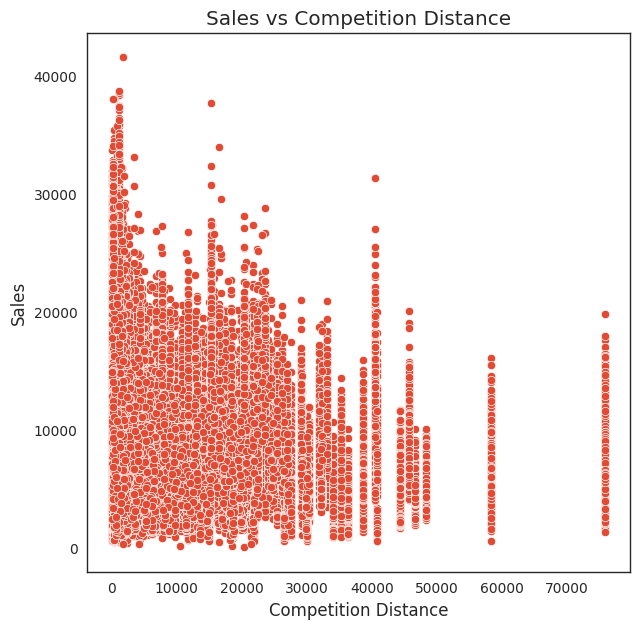

In [ ]:
# Sales Vs CompetitionDistance
plt.figure(figsize=(7, 7))
sns.scatterplot(x=df['CompetitionDistance'], y=df['Sales'])
plt.title('Sales vs Competition Distance')
plt.xlabel('Competition Distance')
plt.ylabel('Sales')
plt.show()


##### 1. Why did you pick the specific chart?

To know the relationship between the sales and competition distance.

##### 2. What is/are the insight(s) found from the chart?

From the above scatter plot it can be observed that mostly the competitor stores weren't that far from each other and the stores densely located near each other saw more sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As we can see sales are more for densely located stores.So, stores can continue providing exciting offers and services to attract customers to compete the market.

#### **Chart - 12 Sales by Day of the Week with Promotion Impact**

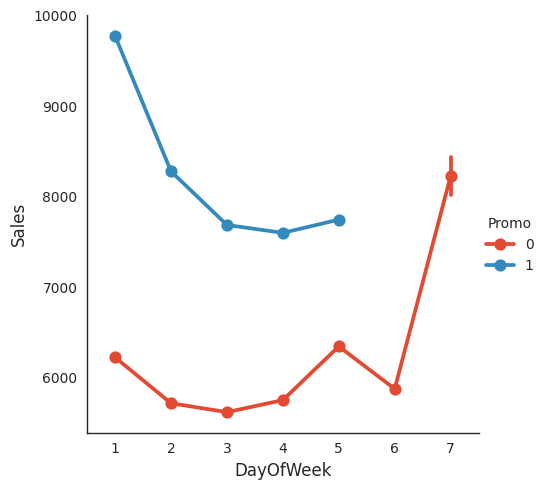

In [ ]:
sns.catplot(data=df, x="DayOfWeek", y="Sales", hue="Promo", kind="point")
plt.show()

##### 1. Why did you pick the specific chart?



  A point plot is suitable because It shows trends over an ordered categorical variable.



##### 2. What is/are the insight(s) found from the chart?



*   Promo Days (Promo = 1) consistently show higher sales than non-promo days, especially on weekdays (1–5).
*   Day 1 (Monday) has the highest sales when promotion is active, but sales decline gradually through the week.


*   For non-promo days (Promo = 0), sales are relatively flat from Monday to Saturday but drop sharply to near zero on Sunday (Day 7).


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



*   Promo Effectiveness Timing: Promotions are clearly more effective on weekdays, especially early in the week — this supports the idea of front-loading promotions (e.g., Mon–Wed).
*   Sunday Focus: Sales drop significantly without promotions on Sundays — consider adding or boosting promotions on Sundays to offset the decline.



#### **Chart - 13  Sales vs Promo2SinceYear**

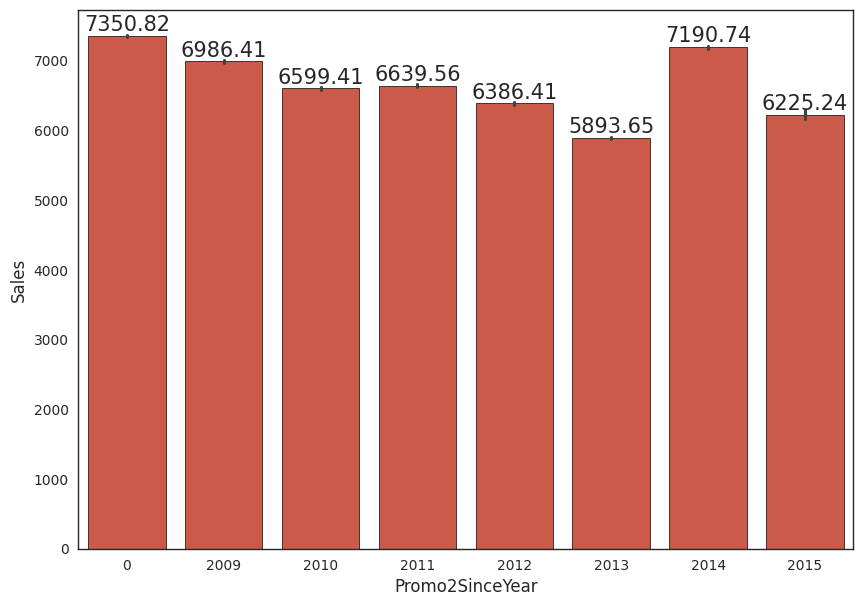

In [ ]:
# Sales vs Promo2SinceYear

plt.figure(figsize=(10,7))

plots=sns.barplot(x=df['Promo2SinceYear'],y=df['Sales'],edgecolor='black')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

##### 1. Why did you pick the specific chart?

To know the sale count for various years since the promo2 started.

##### 2. What is/are the insight(s) found from the chart?


This barplot explains that sales were still the highest when the store wasn't running any consecutive promotional events. But in 2014, the sales were really shoot up and they are recorded as 2nd highest. Good quality products, better deals, shutdown of competitions etc could be the reasons.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. The insights are indeed helpful as they are highlighting one of the most important thing about consecutive promotions. Clearly, such promotions are not enough to convert customers into buyers. The store needs to come up with more innovative and more rewardful solutions.

#### Chart - 14 - Correlation Heatmap

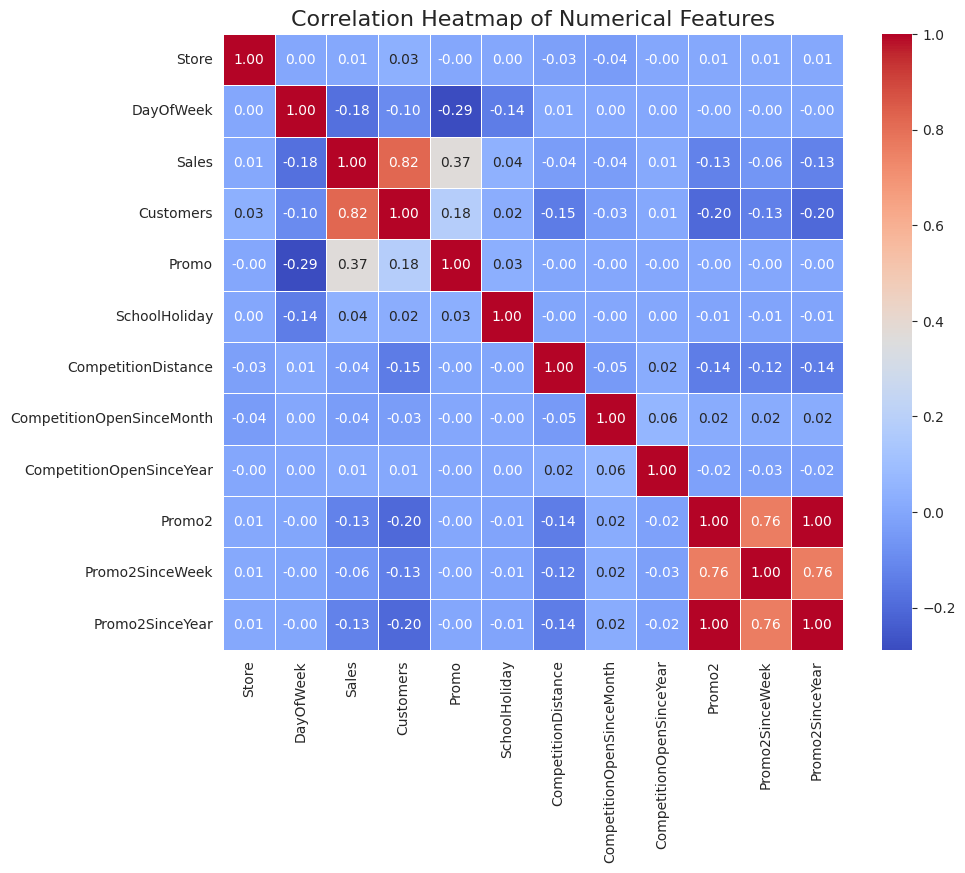

In [ ]:
numeric_columns = df.select_dtypes(include=['float64', 'int64', 'int32', 'UInt32'])
correlation_matrix = numeric_columns.corr()
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap is ideal for Visualizing the strength and direction of linear relationships between numerical features.

##### 2. What is/are the insight(s) found from the chart?



*   Strong positive correlation between Sales and Customers (0.91): More customers directly drive higher sales.
*  Open is also strongly correlated with Sales (0.76), which makes sense — stores must be open to make sales.


*   Promo shows a moderate positive correlation with Sales (0.48), confirming promotions help boost revenue.
*   Promo2 has very weak correlation with Sales (-0.05), implying Promo2 may not be as effective or is not well-targeted.





#### Chart - 15 - Pair Plot

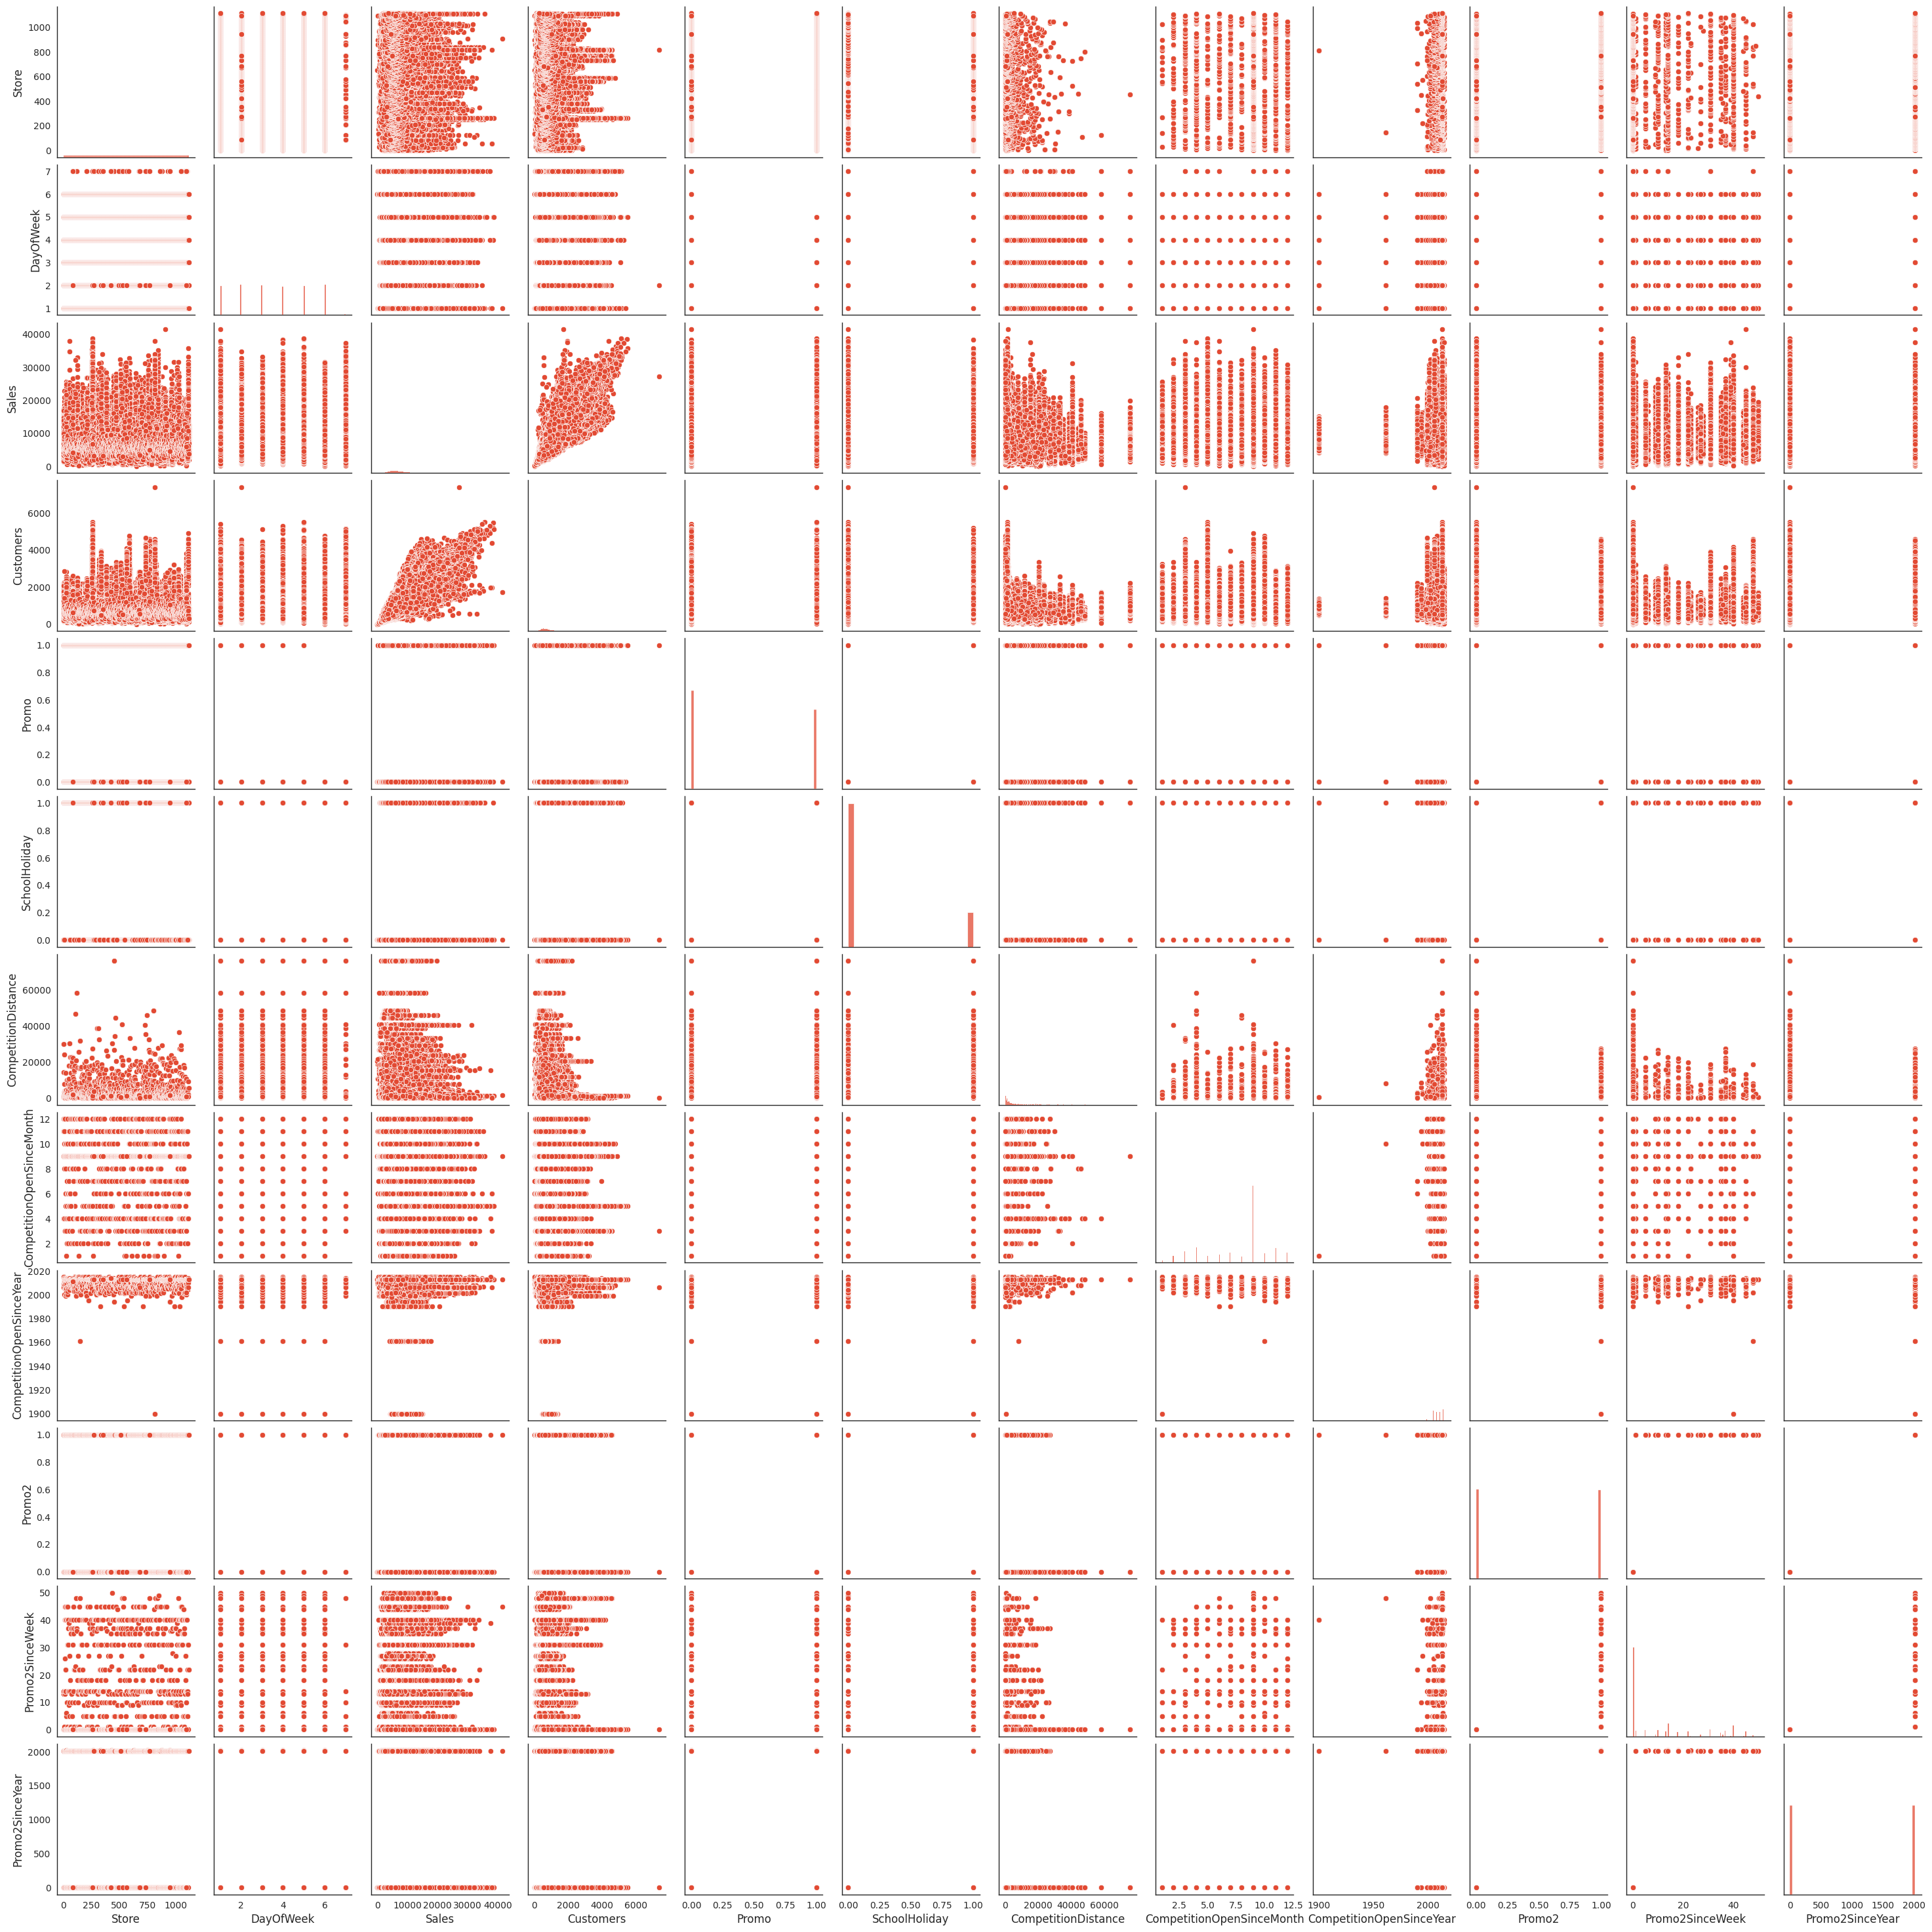

In [25]:
sns.pairplot(df)

# Show plot
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot consists of multiple scatterplots arranged in a grid, with each scatterplot showing the relationship between two variables.

##### 2. What is/are the insight(s) found from the chart?

It can be used to visualize relationships between multiple variables and to identify patterns in the data.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.



*   Null Hypothesis: There is no relationship between Sales and Customers.

*   ALternative Hypothesis: There is relationship between Sales and Customers.

*   Null Hypothesis: There is no relationship between Sales and DayOfWeek.
*   ALternative Hypothesis: There is relationship between Sales and DayOfWeek


*   Null Hypothesis: There is no relation between SchoolHoliday and Sales.


*   ALternative Hypothesis: There is a relation between SchoolHoliday and Sales.



### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

*   Null Hypothesis: There is no relationship between Sales and Customers.
*   ALternative Hypothesis: There is a relationship between Sales and Customers.



#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr
first_sample = df["Customers"].head(60)
second_sample = df["Sales"].head(60)

stat, p = pearsonr(first_sample, second_sample)
print('stat=%.3f, p = %.2f'%(stat, p))
if p> 0.05:
  print('Accept Null Hypothesis')
else:
  print('Rejected Null Hypothesis')

stat=0.840, p = 0.00
Rejected Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

We have used Pearson Correlation test to obtain P-Value along with Pearson Correlation coefficient value.It is a measure of linear correlation between two sets of data.

##### Why did you choose the specific statistical test?

We want to check the relationship between two features if they are positively or negatively correlated.P-value and Pearson Correlation coefficient will always have a value between -1 and 1.Here we can see that after applying test on Customers and sales features we got Correlation coefficient as 0.840 which implies that theses two features are having strong positive correlation between them.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.



*   Null Hypothesis: There is no relation between DayOfWeek and Sales.
*   ALternative Hypothesis:There is a relationship between DayOfWeek and sales.



#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Try using a larger or randomized sample
sample_df = df.sample(n=100, random_state=42)
stat, p = pearsonr(sample_df["DayOfWeek"], sample_df["Sales"])
print('stat=%.3f, p = %.2f' % (stat, p))
if p > 0.05:
    print('Accept Null Hypothesis')
else:
    print('Reject Null Hypothesis')


stat=-0.244, p = 0.01
Reject Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

We have used Pearson Correlation test to obtain P-Value along with Pearson Correlation coefficient value.It is a measure of linear correlation between two sets of data.

##### Why did you choose the specific statistical test?



*   stat = -0.244: A weak negative correlation (as day increases, sales slightly decrease).

*   p = 0.01: This is less than 0.05, so the result is statistically significant.
*    Interpretation: We reject the null hypothesis that there is no relationship — the day of the week does affect sales to a small but statistically significant extent.








### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

*   Null Hypothesis: There is no relationship between Sales and SchoolHoliday.
*   ALternative Hypothesis: There is relationship between Sales and SchoolHoliday.



#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr
first_sample = df["SchoolHoliday"].head(60)
second_sample = df["Sales"].head(60)

stat, p = pearsonr(first_sample, second_sample)
print('stat=%.3f, p = %.2f'%(stat, p))
if p> 0.05:
  print('Accept Null Hypothesis')
else:
  print('Rejected Null Hypothesis')

stat=0.058, p = 0.66
Accept Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

You used the Pearson correlation coefficient test from scipy.stats.pearsonr.

##### Why did you choose the specific statistical test?



*   stat = 0.058: Very weak positive correlation.

*   p = 0.66: High p-value → Not statistically significant.
*    Therefore, Accept the null hypothesis: No significant linear relationship between school holidays and sales.






## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isna().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

As we have already treated null values so we do not have any more missing/null/duplicate values in our dataset and our dataset is good to go.

#### What all missing value imputation techniques have you used and why did you use those techniques?

We have checked the outliers by plotting the box plot and then replaced the null values of various variables with mean, median,mode and 0 accordingly.

### 2. Handling Outliers

In [ ]:
# assigning continous variable features in new variables so that it makes sense while visulatizing through box plots
continous_value_feature= ["DayOfWeek", "Sales", "Customers", "CompetitionDistance", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Promo2SinceWeek", "Promo2SinceYear"]
numeric_features= ['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek','Promo2SinceYear']
categorical_features= ["Date", "StoreType", "Assortment", "PromoInterval"]
print("Numeric_features: ",numeric_features)
print("Categorical_features: ",categorical_features)
print("Continous_value_feature: ",continous_value_feature)

Numeric_features:  ['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear']
Categorical_features:  ['Date', 'StoreType', 'Assortment', 'PromoInterval']
Continous_value_feature:  ['DayOfWeek', 'Sales', 'Customers', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear']


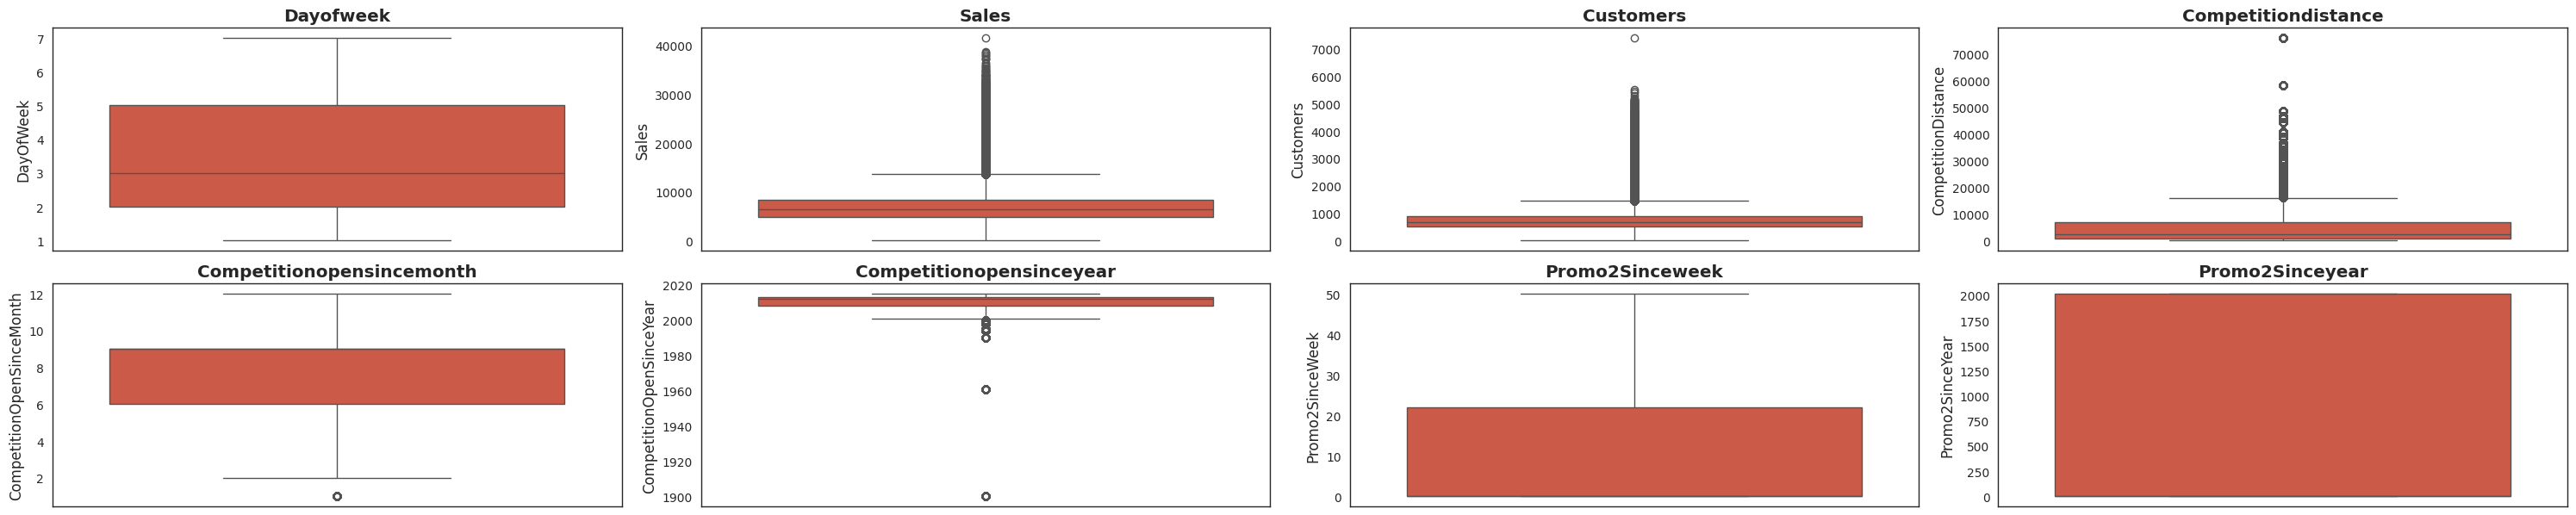

In [ ]:
# checking outliers with the help of box plot for continous features
plt.figure(figsize=(30,15))
for n,column in enumerate(continous_value_feature):
  plt.subplot(5, 4, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

From the above box plots we can see clearly the features "Sales", "Customers", "CompetitionDistance", "CompetitionOpenSinceMonth" and "CompetitionOpenSinceYear" contains several outliers and rest of the features are fine as they are categorical in nature.

Let's define a code to detect the number of outliers and percentage of outliers present in each of the feature in order to handle them accordingly.

In [ ]:
# defining the code for outlier detection and percentage using IQR.
def detect_outliers(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q2 = np.percentile(data, 50)
    q3 = np.percentile(data, 75)
    print(f"q1:{q1}, q2:{q2}, q3:{q3}")

    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    print(f"Lower bound: {lwr_bound}, Upper bound: {upr_bound}, IQR: {IQR}")

    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    len_outliers= len(outliers)
    print(f"Total number of outliers are: {len_outliers}")

    print(f"Total percentage of outlier is: {round(len_outliers*100/len(data),2)} %")

In [ ]:
# Determining IQR, Lower and Upper bound and number out outliers present in each of the continous numerical feature
for feature in continous_value_feature:
  print(feature,":")
  detect_outliers(df[feature])
  print("\n")

DayOfWeek :
q1:2.0, q2:3.0, q3:5.0
Lower bound: -2.5, Upper bound: 9.5, IQR: 3.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


Sales :
q1:4859.0, q2:6369.0, q3:8360.0
Lower bound: -392.5, Upper bound: 13611.5, IQR: 3501.0
Total number of outliers are: 30769
Total percentage of outlier is: 3.64 %


Customers :
q1:519.0, q2:676.0, q3:893.0
Lower bound: -42.0, Upper bound: 1454.0, IQR: 374.0
Total number of outliers are: 40853
Total percentage of outlier is: 4.84 %


CompetitionDistance :
q1:710.0, q2:2325.0, q3:6880.0
Lower bound: -8545.0, Upper bound: 16135.0, IQR: 6170.0
Total number of outliers are: 83040
Total percentage of outlier is: 9.83 %


CompetitionOpenSinceMonth :
q1:6.0, q2:9.0, q3:9.0
Lower bound: 1.5, Upper bound: 13.5, IQR: 3.0
Total number of outliers are: 10297
Total percentage of outlier is: 1.22 %


CompetitionOpenSinceYear :
q1:2008.0, q2:2012.0, q3:2013.0
Lower bound: 2000.5, Upper bound: 2020.5, IQR: 5.0
Total number of outliers are: 22852

Below mentioned continous features with the percentage of outliers:

"Sales" - 2.62%
"Customers" - 3.75%
"CompetitionDistance" - 9.75%
"CompetitionOpenSinceMonth" - 1.22%
"CompetitionOpenSinceYear" - 2.71%
Let's define a function for the outlier treatment using IQR technique and cap the outliers in 25-75 percentile.





In [ ]:
# Defining the function that treats outliers with the IQR technique
def treat_outliers_iqr(data):
    # Calculate the first and third quartiles
    q1, q3 = np.percentile(data, [25, 75])

    # Calculate the interquartile range (IQR)
    iqr = q3 - q1

    # Identify the outliers
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = [x for x in data if x < lower_bound or x > upper_bound]

    # Treat the outliers (e.g., replace with the nearest quartile value)
    treated_data = [q1 if x < lower_bound else q3 if x > upper_bound else x for x in data]
    treated_data_int = [int(absolute) for absolute in treated_data]

    return treated_data_int

In [ ]:
# Passing all the feature one by one from the list of continous_value_feature in our above defined function for outlier treatment
for feature in continous_value_feature:
  df[feature]= treat_outliers_iqr(df[feature])

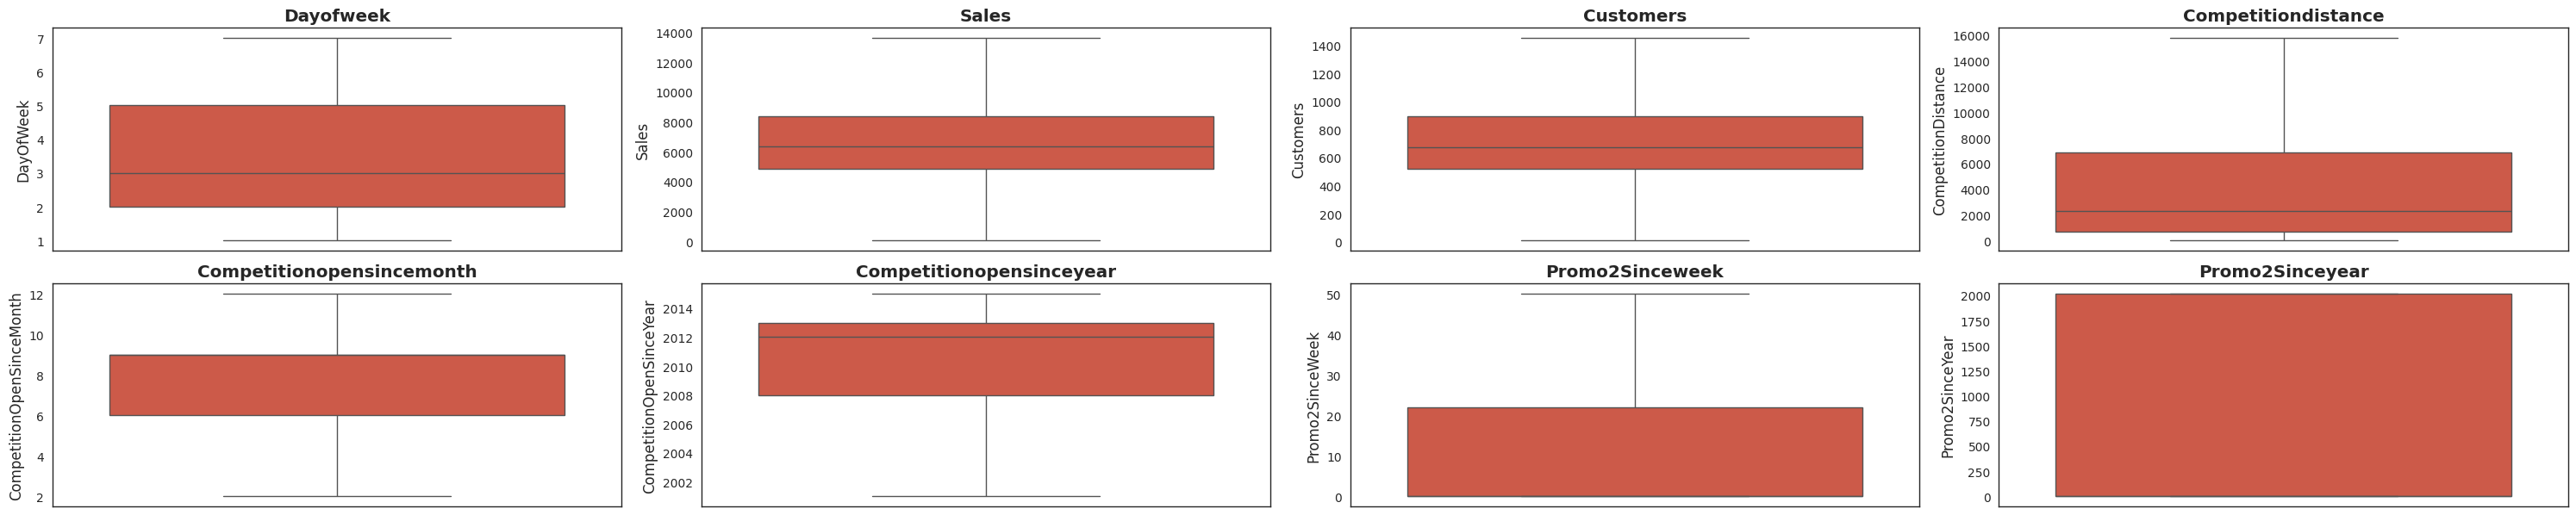

In [ ]:
# Replotting the box plots and rechecking the percentage of outliers still available(if any) in the list of continous_value_feature.
plt.figure(figsize=(30,15))
for n,column in enumerate(continous_value_feature):
  plt.subplot(5, 4, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

In [ ]:
# Rechecking the total number of outliers and its percentage present in our dataset.
for feature in continous_value_feature:
  print(feature,":")
  detect_outliers(df[feature])
  print("\n")

DayOfWeek :
q1:2.0, q2:3.0, q3:5.0
Lower bound: -2.5, Upper bound: 9.5, IQR: 3.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


Sales :
q1:4859.0, q2:6369.0, q3:8360.0
Lower bound: -392.5, Upper bound: 13611.5, IQR: 3501.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


Customers :
q1:519.0, q2:676.0, q3:893.0
Lower bound: -42.0, Upper bound: 1454.0, IQR: 374.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


CompetitionDistance :
q1:710.0, q2:2325.0, q3:6880.0
Lower bound: -8545.0, Upper bound: 16135.0, IQR: 6170.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


CompetitionOpenSinceMonth :
q1:6.0, q2:9.0, q3:9.0
Lower bound: 1.5, Upper bound: 13.5, IQR: 3.0
Total number of outliers are: 0
Total percentage of outlier is: 0.0 %


CompetitionOpenSinceYear :
q1:2008.0, q2:2012.0, q3:2013.0
Lower bound: 2000.5, Upper bound: 2020.5, IQR: 5.0
Total number of outliers are: 0
Total percentage of out

##### What all outlier treatment techniques have you used and why did you use those techniques?

Outliers can lead to biased insights and conclusions when analyzing data.So we should treat the outliers before passing the data into our model.In our dataset only in Sales,Customers and CompetitionDistnace outliers were present and i have already removed them during EDA process by consideing values around 95 percentile and removed all other values above itAnswer Here.

### 3. Categorical Encoding

In [ ]:
# checking the features having dtype as object
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 844338 entries, 0 to 1017190
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Store                      844338 non-null  int64         
 1   DayOfWeek                  844338 non-null  int64         
 2   Date                       844338 non-null  datetime64[ns]
 3   Sales                      844338 non-null  int64         
 4   Customers                  844338 non-null  int64         
 5   Promo                      844338 non-null  int64         
 6   StateHoliday               844338 non-null  object        
 7   SchoolHoliday              844338 non-null  int64         
 8   StoreType                  844338 non-null  object        
 9   Assortment                 844338 non-null  object        
 10  CompetitionDistance        844338 non-null  int64         
 11  CompetitionOpenSinceMonth  844338 non-null  int64       

Clearly we have "StoreType", "Assortment", "PromoInterval" as "object". To feed them as an input of our Machine Learning algorithm, we need to use some encoding technique to make dtype of these column as "integer".

In [ ]:
# creating the variable that contains list of "object" dtypes
obj= ["StateHoliday", "StoreType", "Assortment", "PromoInterval"]


In [ ]:
# checking the unique counts of object dype column which is essential to determine the type of encoding to use in various column
for unique in obj:
  print(f"{unique}: ")
  print(f"The unique values are: {df[unique].unique()}")
  print(f"Total number of unique values are: {df[unique].nunique()}")
  print("\n")

StateHoliday: 
The unique values are: ['0' 'a' 'b' 'c']
Total number of unique values are: 4


StoreType: 
The unique values are: ['c' 'a' 'd' 'b']
Total number of unique values are: 4


Assortment: 
The unique values are: ['a' 'c' 'b']
Total number of unique values are: 3


PromoInterval: 
The unique values are: [0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']
Total number of unique values are: 4




From the above output we can see that the feature "StateHoliday" contains "0" as string and 0 as int at various observations. So let's convert "0"(str) to 0(int)

In [ ]:
# replacing "0" to 0 and a=b=c=1 for our simplicity as they resembles that there is holiday
df["StateHoliday"].replace({"0":0, "a":1, "b":1, "c":1}, inplace=True)

<ipython-input-35-845662447670>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["StateHoliday"].replace({"0":0, "a":1, "b":1, "c":1}, inplace=True)
<ipython-input-35-845662447670>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["StateHoliday"].replace({"0":0, "a":1, "b":1, "c":1}, inplace=Tr

In [ ]:
# rechecking the unique counts of object dype column which is essential to determine the type of encoding to be use in various column
for unique in obj:
  print(f"{unique}: ")
  print(f"The unique values are: {df[unique].unique()}")
  print(f"Total number of unique values are: {df[unique].nunique()}")
  print("\n")

StateHoliday: 
The unique values are: [0 1]
Total number of unique values are: 2


StoreType: 
The unique values are: ['c' 'a' 'd' 'b']
Total number of unique values are: 4


Assortment: 
The unique values are: ['a' 'c' 'b']
Total number of unique values are: 3


PromoInterval: 
The unique values are: [0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']
Total number of unique values are: 4




Since we have several encoding techniques but the major ones are:


*   Ordinal encoding: Used when the features are ordinal in nature and have some rank between them.

*   Nominal encoding: Used when the features have equal weightage and are nominal in nature.




As our all the categorical columns are nominal in nature(do not have any rank or order) so will use One-Hot Encoding (Type of Nominal encoding) in our senario:

In [ ]:
#Lets create a copy of dataframe to avoid blunders with our original dataframe
df_new=df.copy()

In [ ]:
# Encode your categorical columns by dropping the first category
df_new= pd.get_dummies(df, dtype=int)

We can use the above code to create binary dummy variable using ONE-HOT ENCODING for each of the feature but we will face the issue of "multicollinearity" or "dummy variable trap" as the information given by the one feature can be explained by the other features and this results in the high "VIF". So its better to drop the redundant feature (one category among all other category) here only.

We can do this easily by passing the argument "drop_first = True" in get_dummies without doing it manually, thanks to python code development team to make our tasks easier

In [ ]:
# Encode your categorical columns by dropping the first category
df_new= pd.get_dummies(df, dtype=int, drop_first=True)

In [ ]:
# code to see all the features
pd.set_option('display.max_columns', None)

In [ ]:
# Let's see first five observations of our dataset
df_new.head()

Store  DayOfWeek       Date  Sales  Customers  Promo  StateHoliday  \
0      1          5 2015-07-31   5263        555      1             0   
1      2          5 2015-07-31   6064        625      1             0   
2      3          5 2015-07-31   8314        821      1             0   
3      4          5 2015-07-31   8360        893      1             0   
4      5          5 2015-07-31   4822        559      1             0   

   SchoolHoliday  CompetitionDistance  CompetitionOpenSinceMonth  \
0              1                 1270                          9   
1              1                  570                         11   
2              1                14130                         12   
3              1                  620                          9   
4              1                 6880                          4   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                      2008       0                0                0   
1                      2007       1               13             2010   
2                      2006       1               14             2011   
3                      2009       0                0                0   
4                      2015       0                0                0   

   StoreType_b  StoreType_c  StoreType_d  Assortment_b  Assortment_c  \
0            0            1            0             0             0   
1            0            0            0             0             0   
2            0            0            0             0             0   
3            0            1            0             0             1   
4            0            0            0             0             0   

   PromoInterval_Feb,May,Aug,Nov  PromoInterval_Jan,Apr,Jul,Oct  \
0                              0                              0   
1                              0                              1   
2                              0                              1   
3                              0                              0   
4                              0                              0   

   PromoInterval_Mar,Jun,Sept,Dec  
0                               0  
1                               0  
2                               0  
3                               0  
4                               0

In [ ]:
# Verifying the dtype
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 844338 entries, 0 to 1017190
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Store                           844338 non-null  int64         
 1   DayOfWeek                       844338 non-null  int64         
 2   Date                            844338 non-null  datetime64[ns]
 3   Sales                           844338 non-null  int64         
 4   Customers                       844338 non-null  int64         
 5   Promo                           844338 non-null  int64         
 6   StateHoliday                    844338 non-null  int64         
 7   SchoolHoliday                   844338 non-null  int64         
 8   CompetitionDistance             844338 non-null  int64         
 9   CompetitionOpenSinceMonth       844338 non-null  int64         
 10  CompetitionOpenSinceYear        844338 non-null  int64      

#### What all categorical encoding techniques have you used & why did you use those techniques?



*  We have used one-hot encoding technique to change our categorical features of object type into int type by creating their dummies so that it becomes compatible to feed it into various ML algorithms in future.
*   Since, we have 3 to 4 unique orderless categories in all the categorical features (which is less in number). So, it is good to use Nominal encoding technique than ordinal.



### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Extracting date, month and year from Date feature
df_new["Day"]= df_new["Date"].dt.day
df_new["Month"]= df_new["Date"].dt.month
df_new["Year"]= df_new["Date"].dt.year
# Use .dt.isocalendar().week instead of .dt.week
df_new["Week"]= df_new["Date"].dt.isocalendar().week

In [ ]:
#checking first 5 observations
df_new.head()

Store  DayOfWeek       Date  Sales  Customers  Promo  StateHoliday  \
0      1          5 2015-07-31   5263        555      1             0   
1      2          5 2015-07-31   6064        625      1             0   
2      3          5 2015-07-31   8314        821      1             0   
3      4          5 2015-07-31   8360        893      1             0   
4      5          5 2015-07-31   4822        559      1             0   

   SchoolHoliday  CompetitionDistance  CompetitionOpenSinceMonth  \
0              1                 1270                          9   
1              1                  570                         11   
2              1                14130                         12   
3              1                  620                          9   
4              1                 6880                          4   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                      2008       0                0                0   
1                      2007       1               13             2010   
2                      2006       1               14             2011   
3                      2009       0                0                0   
4                      2015       0                0                0   

   StoreType_b  StoreType_c  StoreType_d  Assortment_b  Assortment_c  \
0            0            1            0             0             0   
1            0            0            0             0             0   
2            0            0            0             0             0   
3            0            1            0             0             1   
4            0            0            0             0             0   

   PromoInterval_Feb,May,Aug,Nov  PromoInterval_Jan,Apr,Jul,Oct  \
0                              0                              0   
1                              0                              1   
2                              0                              1   
3                              0                              0   
4                              0                              0   

   PromoInterval_Mar,Jun,Sept,Dec  Day  Month  Year  Week  
0                               0   31      7  2015    31  
1                               0   31      7  2015    31  
2                               0   31      7  2015    31  
3                               0   31      7  2015    31  
4                               0   31      7  2015    31

In [ ]:
# deriving 2 new features:
# 1. "CompetitionDuration -> Duration from which two stores are competiting"
# 2. "PromoDuration -> Duration from which the store is involved in promotion"
##    Final values are in Months.
df_new["CompetitionDuration"]= (df_new["Year"]-df_new["CompetitionOpenSinceYear"])*12 + (df_new["Month"]-df_new["CompetitionOpenSinceMonth"])
df_new["CompetitionDuration"] = df_new["CompetitionDuration"].map(lambda x: int(0) if x < 0 else int(x)).fillna(0)

# Creating PromoDuration feature
df_new["PromoDuration"]= (df_new["Year"]-df_new["Promo2SinceYear"])*12 + (df_new["Week"]-df_new["Promo2SinceWeek"])*7/30.5
df_new["PromoDuration"] = df_new["PromoDuration"].map(lambda x: int(0) if x < 0 else int(x)).fillna(0) * df["Promo2"]

In [ ]:
# checking first 5 observations after feature extraction
df_new.head()

Store  DayOfWeek       Date  Sales  Customers  Promo  StateHoliday  \
0      1          5 2015-07-31   5263        555      1             0   
1      2          5 2015-07-31   6064        625      1             0   
2      3          5 2015-07-31   8314        821      1             0   
3      4          5 2015-07-31   8360        893      1             0   
4      5          5 2015-07-31   4822        559      1             0   

   SchoolHoliday  CompetitionDistance  CompetitionOpenSinceMonth  \
0              1                 1270                          9   
1              1                  570                         11   
2              1                14130                         12   
3              1                  620                          9   
4              1                 6880                          4   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                      2008       0                0                0   
1                      2007       1               13             2010   
2                      2006       1               14             2011   
3                      2009       0                0                0   
4                      2015       0                0                0   

   StoreType_b  StoreType_c  StoreType_d  Assortment_b  Assortment_c  \
0            0            1            0             0             0   
1            0            0            0             0             0   
2            0            0            0             0             0   
3            0            1            0             0             1   
4            0            0            0             0             0   

   PromoInterval_Feb,May,Aug,Nov  PromoInterval_Jan,Apr,Jul,Oct  \
0                              0                              0   
1                              0                              1   
2                              0                              1   
3                              0                              0   
4                              0                              0   

   PromoInterval_Mar,Jun,Sept,Dec  Day  Month  Year  Week  \
0                               0   31      7  2015    31   
1                               0   31      7  2015    31   
2                               0   31      7  2015    31   
3                               0   31      7  2015    31   
4                               0   31      7  2015    31   

   CompetitionDuration  PromoDuration  
0                   82              0  
1                   92             64  
2                  103             51  
3                   70              0  
4                    3              0

#### 2. Feature Selection

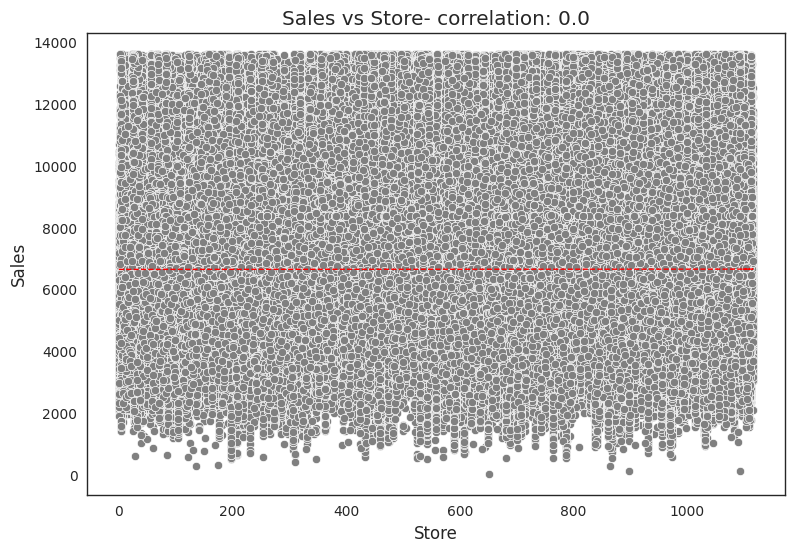

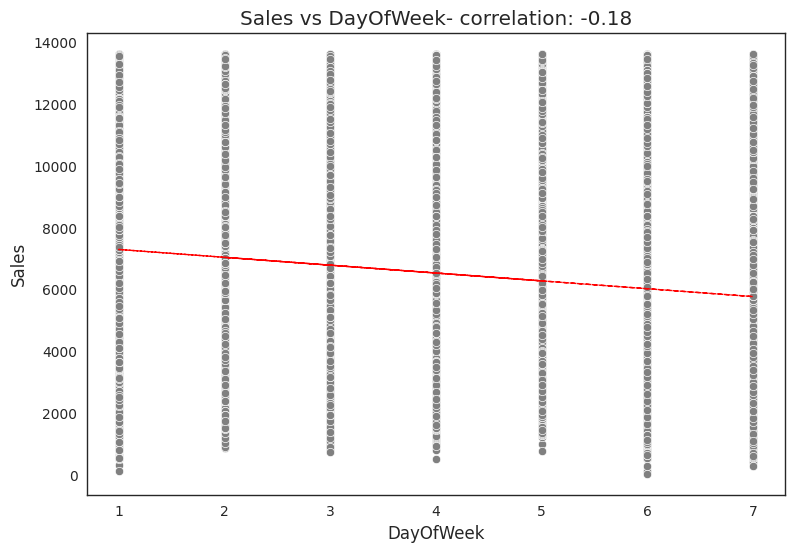

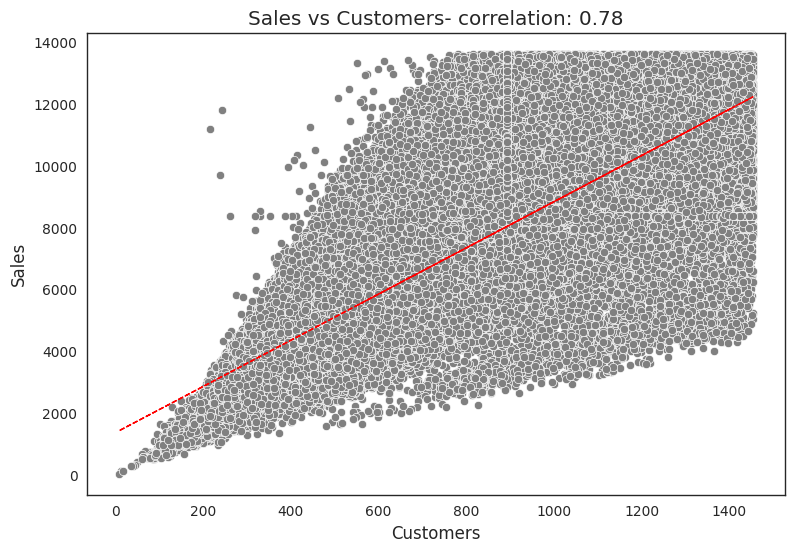

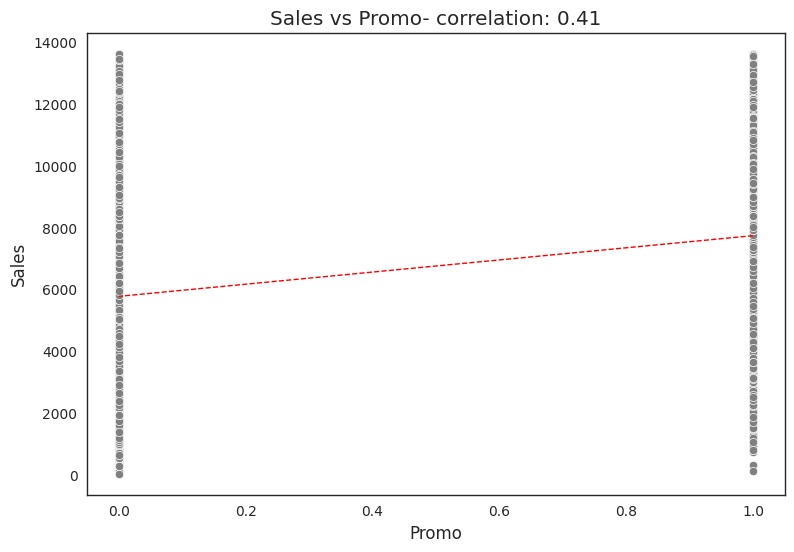

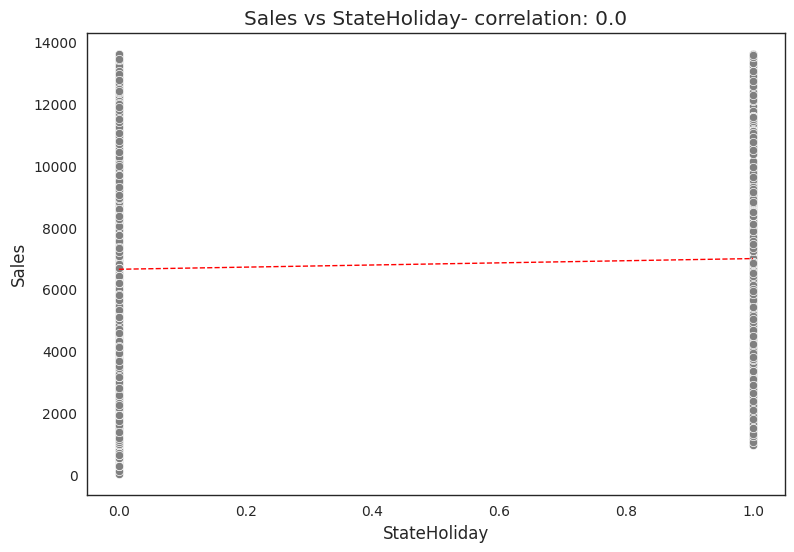

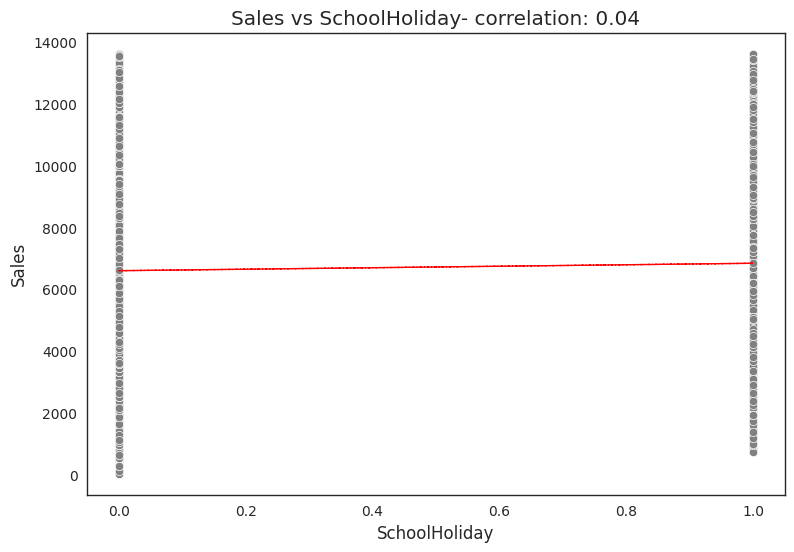

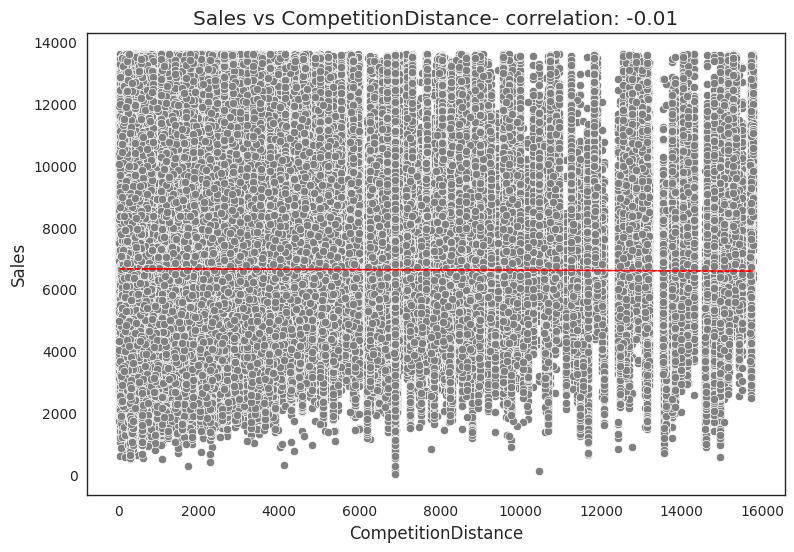

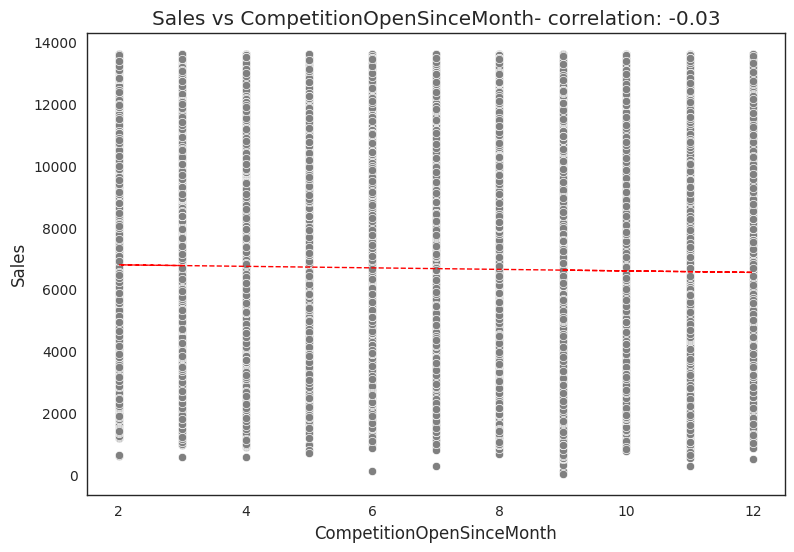

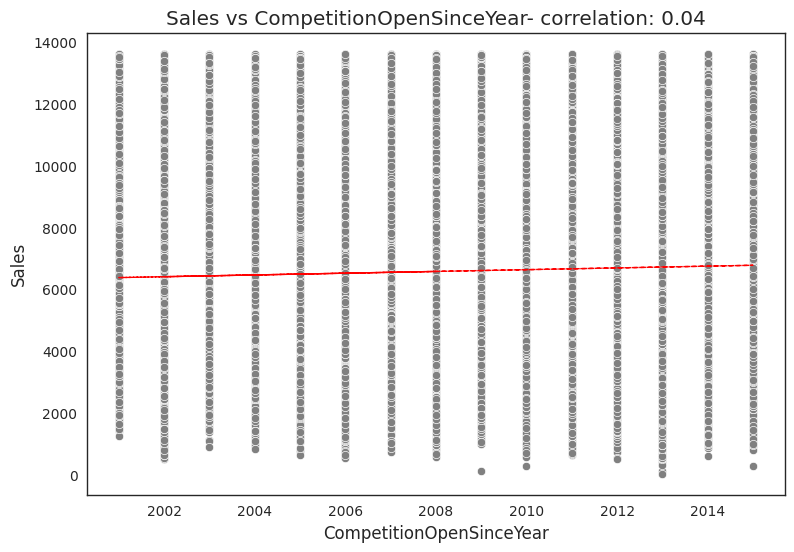

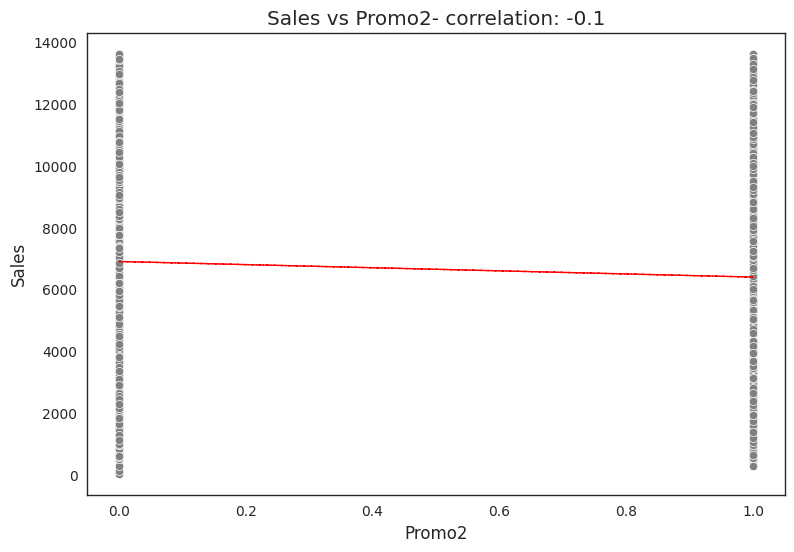

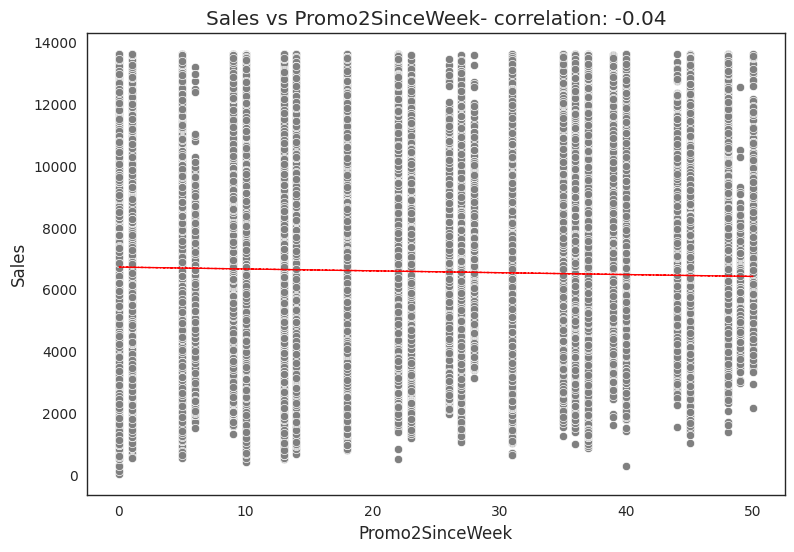

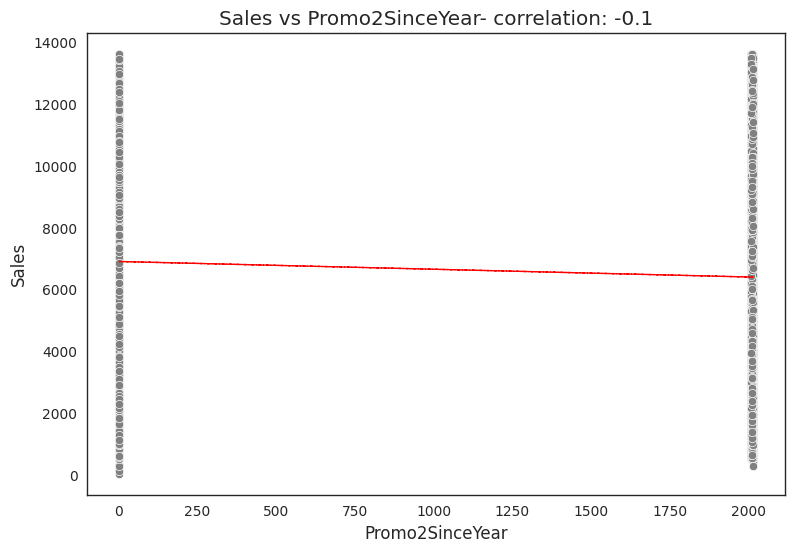

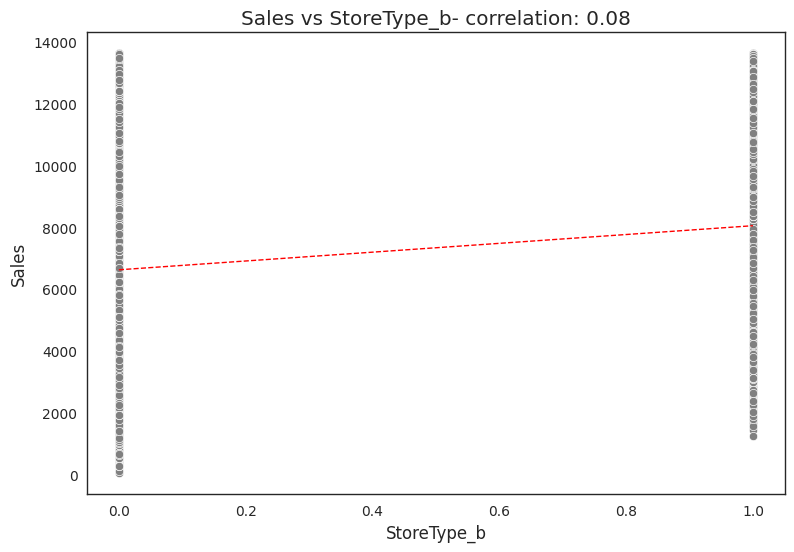

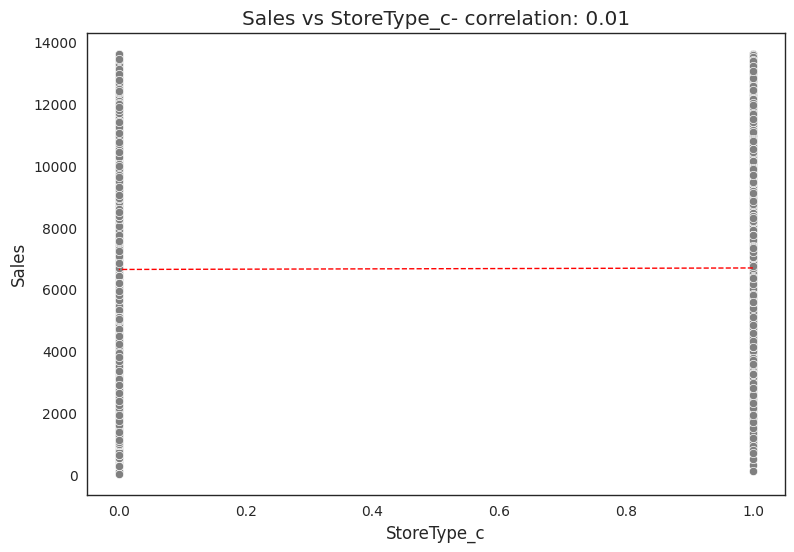

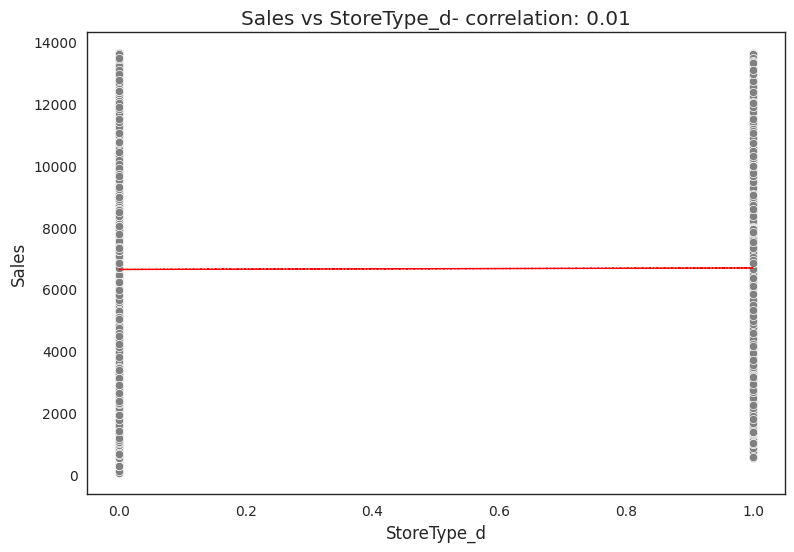

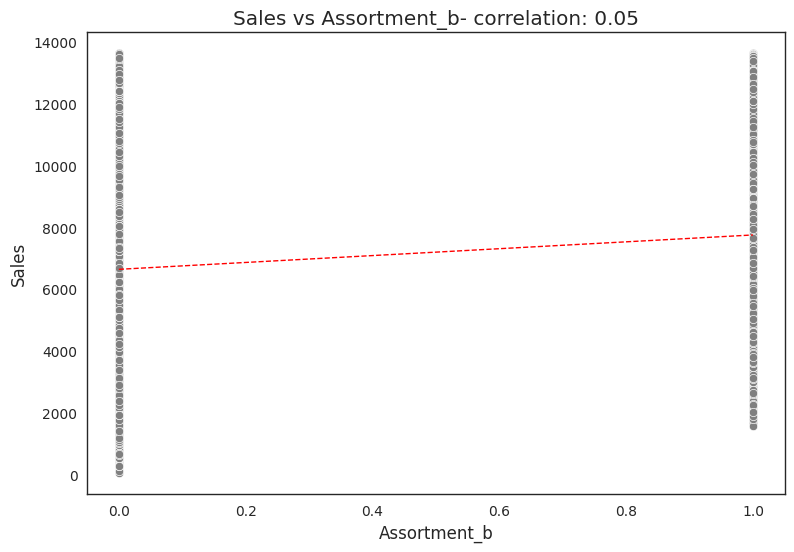

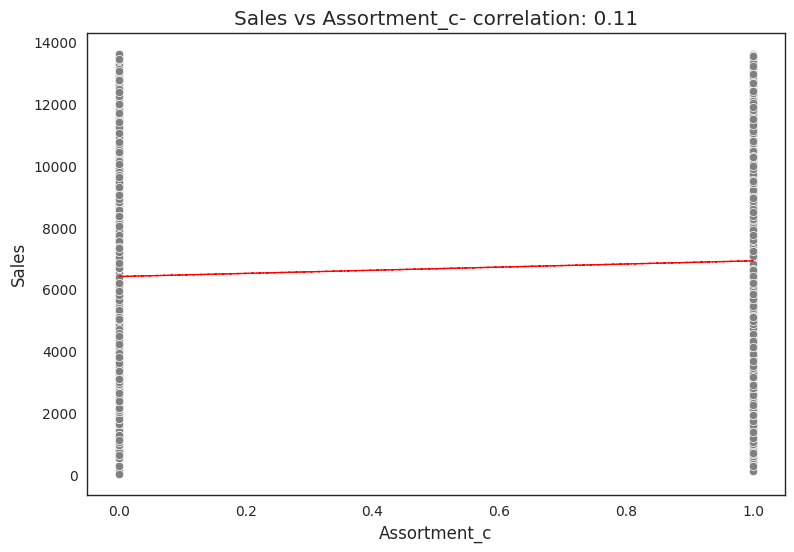

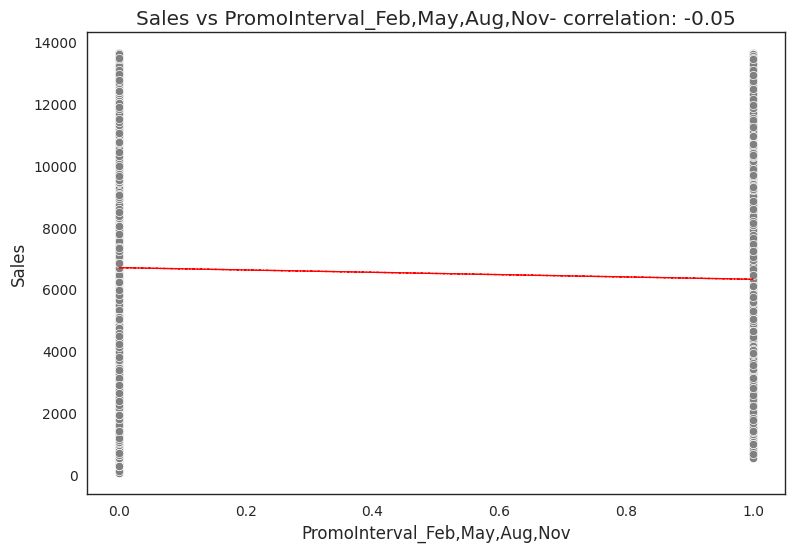

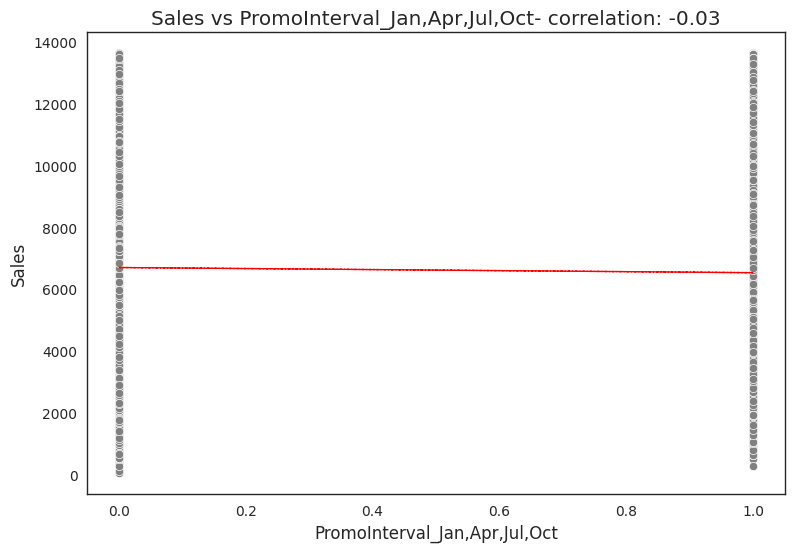

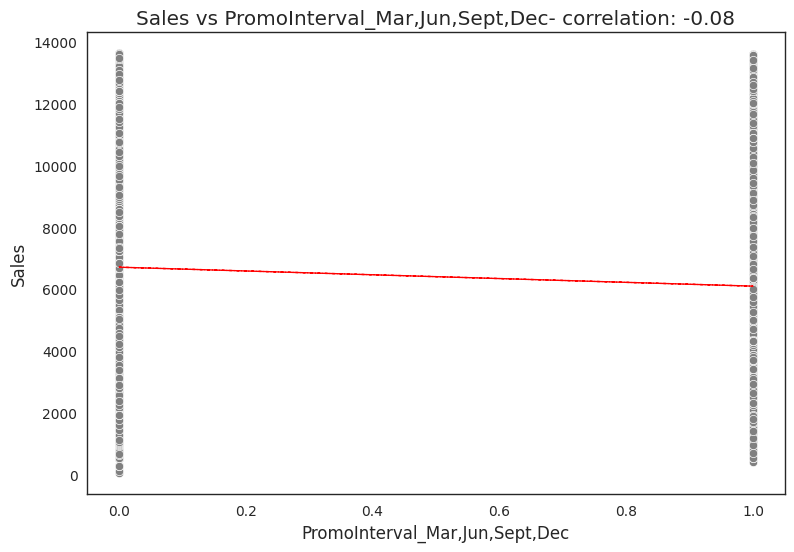

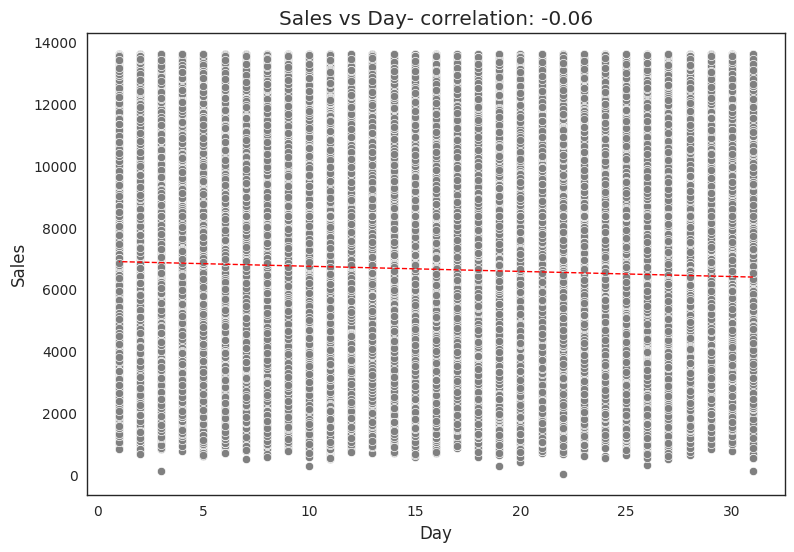

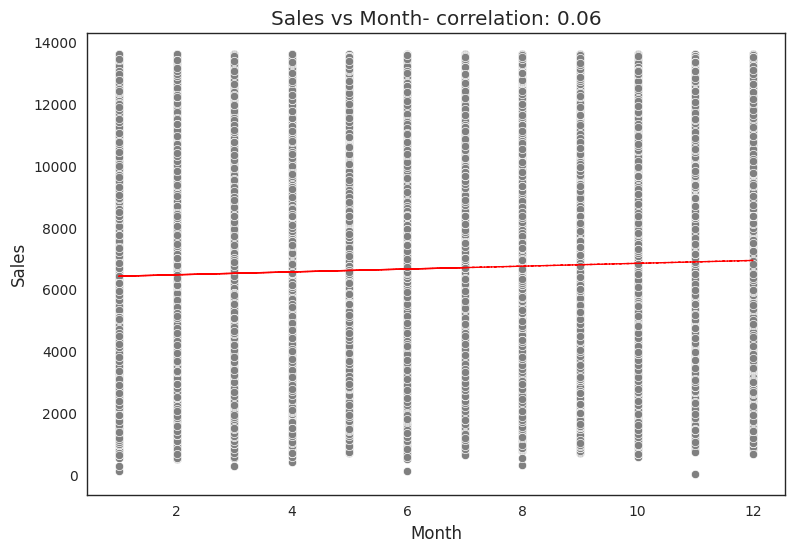

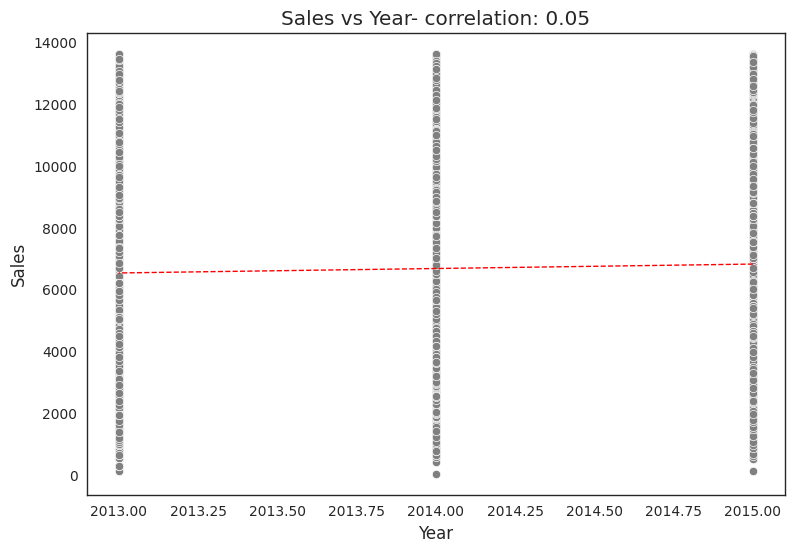

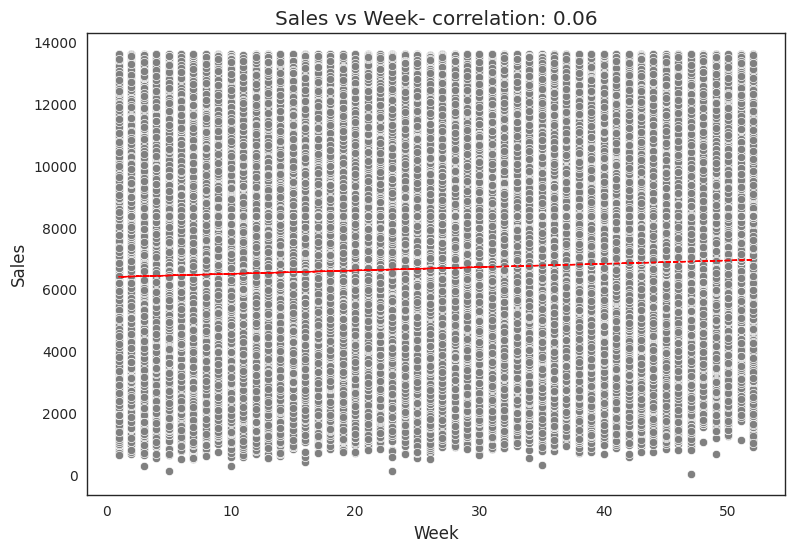

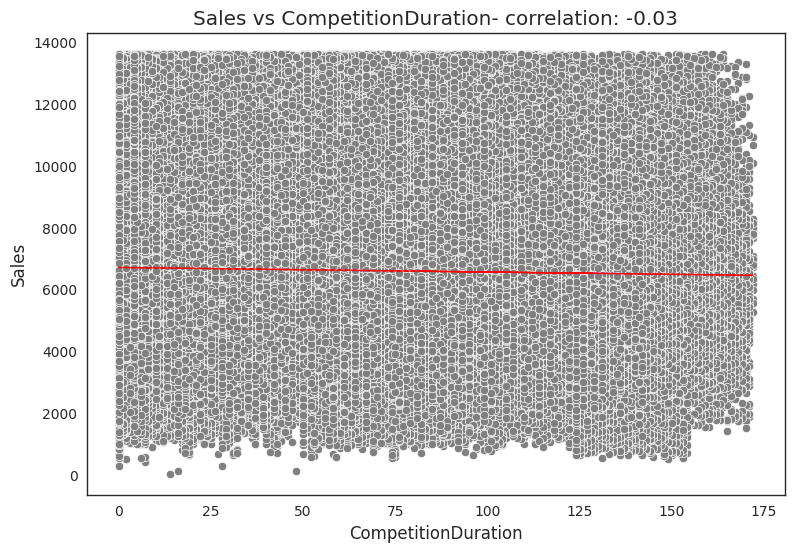

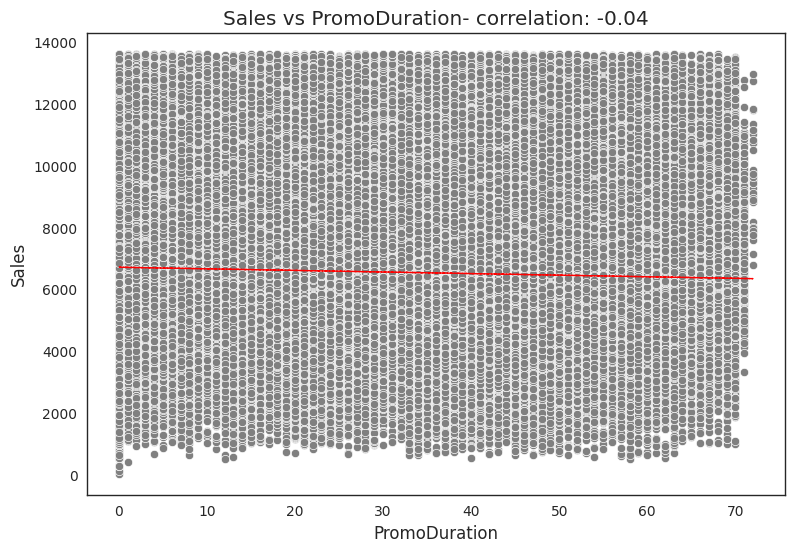

In [ ]:
# Let's see how sales and other features are related
# Select only numerical columns for plotting
numeric_cols = df_new.select_dtypes(include=np.number).columns.tolist()

for col in numeric_cols:
    # Skip the target variable itself
    if col == 'Sales':
        continue

    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df_new[col]
    label = df_new['Sales']

    # Ensure the feature column does not have NaN values before calculating correlation and plotting
    # For simplicity, we will drop NaNs here. More sophisticated handling might be needed depending on the data.
    temp_df = df_new[[col, 'Sales']].dropna()
    if not temp_df.empty:
        correlation = temp_df[col].corr(temp_df['Sales'])
        sns.scatterplot(x=temp_df[col], y=temp_df['Sales'], color="gray")
        plt.xlabel(col)
        plt.ylabel('Sales')
        ax.set_title('Sales vs ' + col + '- correlation: ' + str(round(correlation, 2)))

        # Fit and plot the regression line only if there's data after dropping NaNs
        z = np.polyfit(temp_df[col], temp_df['Sales'], 1)
        y_hat = np.poly1d(z)(temp_df[col])
        plt.plot(temp_df[col], y_hat, "r--", lw=1)

    else:
        # Handle the case where all values are NaN after dropping
        plt.xlabel(col)
        plt.ylabel('Sales')
        ax.set_title('Sales vs ' + col + '- No data after dropping NaNs')

    plt.show()


<Axes: >

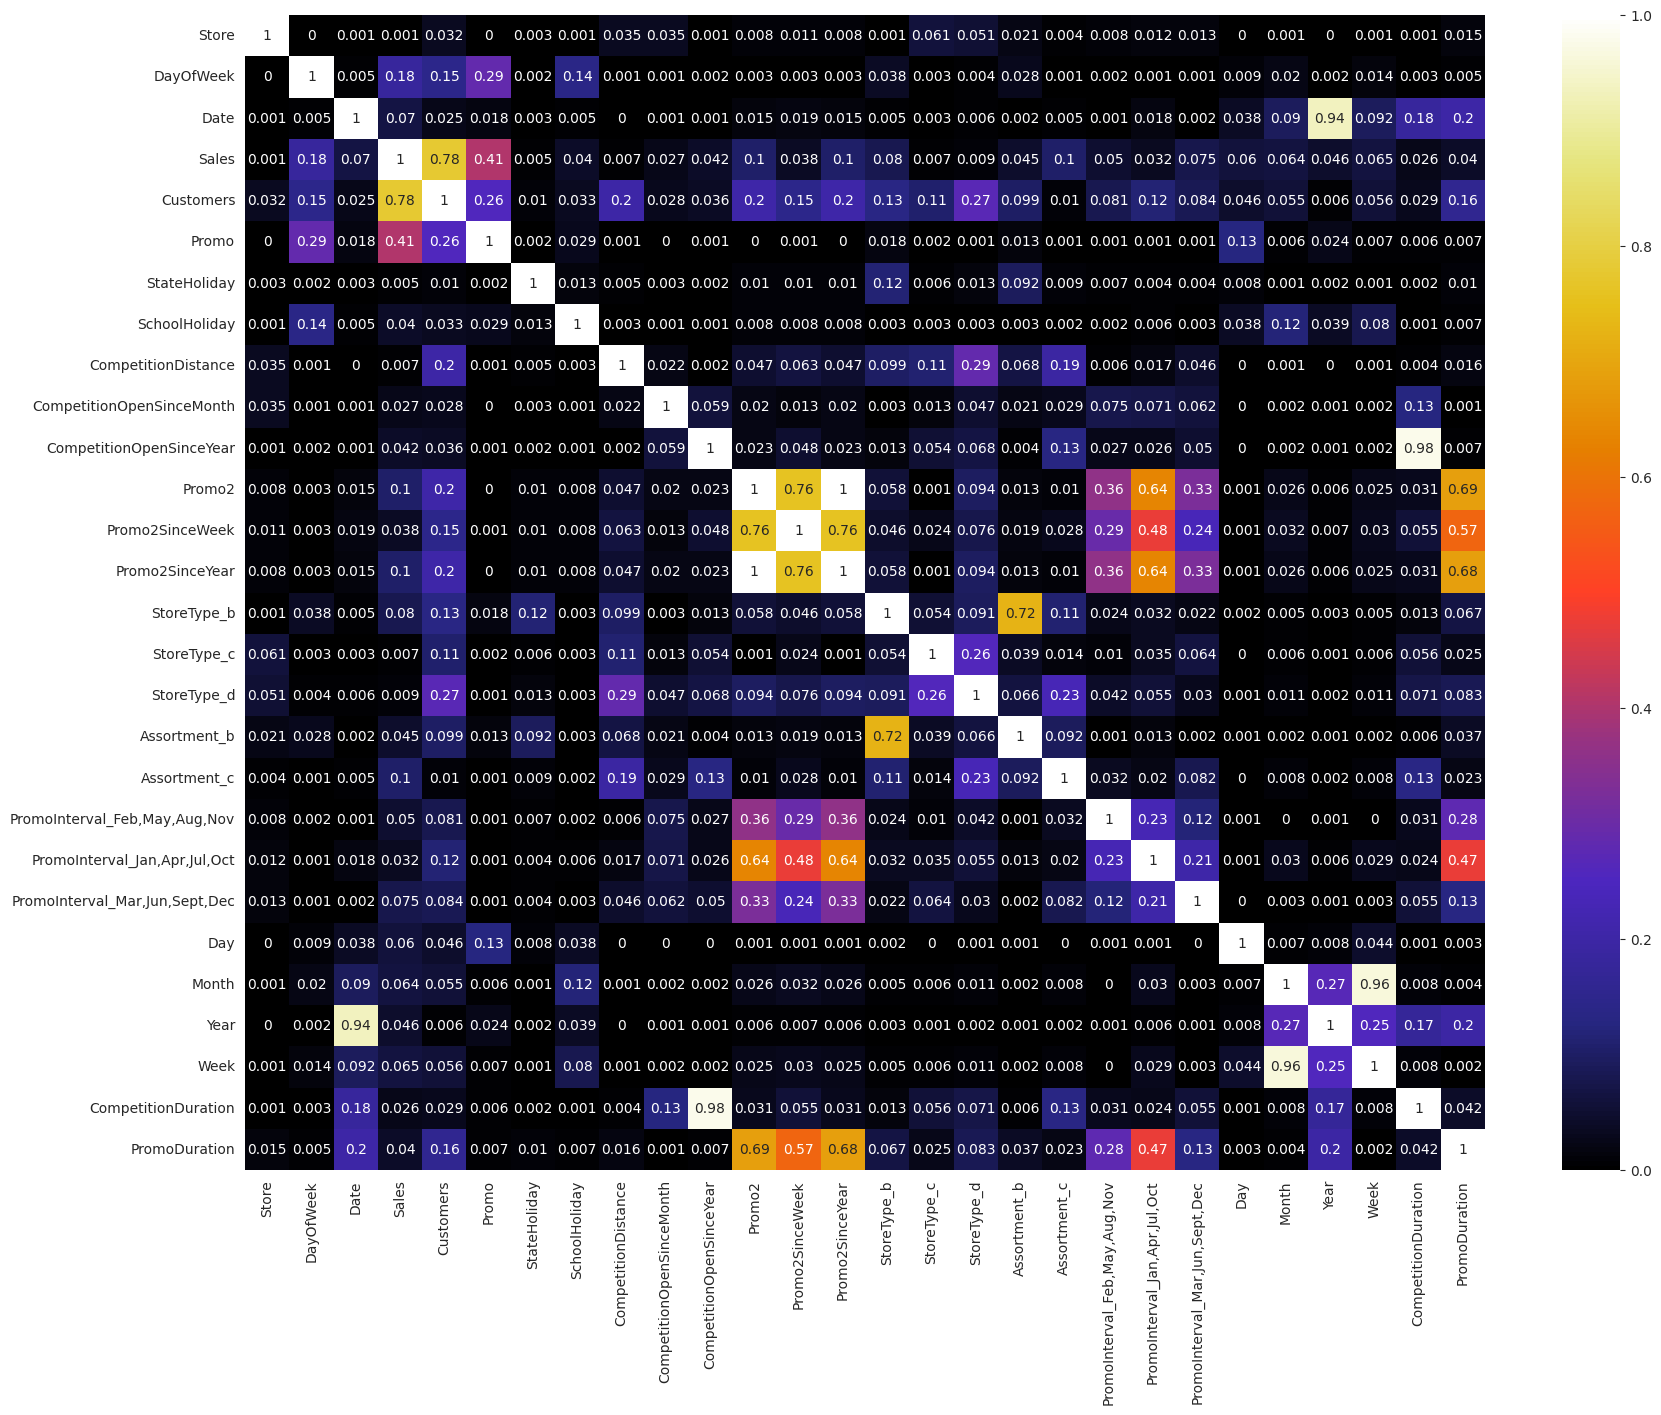

In [ ]:
# Select your features wisely to avoid overfitting
plt.figure(figsize=(20,15))
sns.heatmap(abs(round(df_new.corr(),3)), annot=True, cmap=plt.cm.CMRmap)

Let's include only those features in our final dataframe that are highly impacting on the dependent variable i.e Sales. For this we are using Variance Inflation Factor technique to determine multicolinearity.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

def calc_vif(X):
    # Keep only numeric columns
    X = X.select_dtypes(include=[np.number])

    # Drop rows with NaN or infinite values
    X = X.replace([np.inf, -np.inf], np.nan).dropna()

    # VIF calculation
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return vif


Calculating VIF(Variance Inflation Factor) by excluding:


*   "Sales" -> As it is target variable
*   "Store" -> As it is StoreID and not giving any information






We have extracted new features "CompetitionDuration" and "PromoDuration" from features "Promo2SinceWeek", "Promo2SinceYear", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Month", "Year", "Week". So we can exclude them while calculating VIF.

In [ ]:
# calculating the vif by excluding some features which are not giving any information
calc_vif(df_new[[i for i in df_new.describe().columns if i not in ["Store", "Sales", "Promo2SinceWeek", "Promo2SinceYear", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear","Month", "Year", "Week"]]])

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


variables       VIF
0                        DayOfWeek  4.218629
1                        Customers  6.332071
2                            Promo  2.072781
3                     StateHoliday  1.015326
4                    SchoolHoliday  1.247397
5              CompetitionDistance  2.186942
6                           Promo2       inf
7                      StoreType_b  2.196688
8                      StoreType_c  1.267899
9                      StoreType_d  1.777004
10                    Assortment_b  2.122488
11                    Assortment_c  2.084880
12   PromoInterval_Feb,May,Aug,Nov       inf
13   PromoInterval_Jan,Apr,Jul,Oct       inf
14  PromoInterval_Mar,Jun,Sept,Dec       inf
15                             Day  3.782107
16             CompetitionDuration  1.845662
17                   PromoDuration  2.857203

Since, "Promo2","PromoInterval_Jan,Apr,Jul,Oct", "PromoInterval_Feb,May,Aug,Nov", "PromoInterval_Mar,Jun,Sept,Dec" are having high VIF values and "PromoInterval_Jan,Apr,Jul,Oct" is having least corelation with "Sales". So, let's exclude "PromoInterval_Jan,Apr,Jul,Oct"

In [ ]:
# calculating the vif by excluding some features
calc_vif(df_new[[i for i in df_new.describe().columns if i not in ["Store", "Sales", "Promo2SinceWeek", "Promo2SinceYear", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Month", "Year","Week", "PromoInterval_Jan,Apr,Jul,Oct"]]])

variables       VIF
0                        DayOfWeek  4.218629
1                        Customers  6.332071
2                            Promo  2.072781
3                     StateHoliday  1.015326
4                    SchoolHoliday  1.247397
5              CompetitionDistance  2.186942
6                           Promo2  4.579747
7                      StoreType_b  2.196688
8                      StoreType_c  1.267899
9                      StoreType_d  1.777004
10                    Assortment_b  2.122488
11                    Assortment_c  2.084880
12   PromoInterval_Feb,May,Aug,Nov  1.407492
13  PromoInterval_Mar,Jun,Sept,Dec  1.374556
14                             Day  3.782107
15             CompetitionDuration  1.845662
16                   PromoDuration  2.857203

Since, "Promo2","PromoInterval_Jan,Apr,Jul,Oct", "PromoInterval_Feb,May,Aug,Nov", "PromoInterval_Mar,Jun,Sept,Dec" are having high VIF values and "PromoInterval_Jan,Apr,Jul,Oct" is having least corelation with "Sales". So, let's exclude "PromoInterval_Jan,Apr,Jul,Oct"

In [ ]:
# calculating the vif by excluding some features
calc_vif(df_new[[i for i in df_new.describe().columns if i not in ["Store", "Sales", "Promo2SinceWeek", "Promo2SinceYear", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear", "Month", "Year","Week", "PromoInterval_Jan,Apr,Jul,Oct","Assortment_b"]]])

variables       VIF
0                        DayOfWeek  4.218246
1                        Customers  6.331868
2                            Promo  2.072681
3                     StateHoliday  1.015180
4                    SchoolHoliday  1.247383
5              CompetitionDistance  2.186742
6                           Promo2  4.575587
7                      StoreType_b  1.082048
8                      StoreType_c  1.267897
9                      StoreType_d  1.776997
10                    Assortment_c  2.083859
11   PromoInterval_Feb,May,Aug,Nov  1.407283
12  PromoInterval_Mar,Jun,Sept,Dec  1.374387
13                             Day  3.781920
14             CompetitionDuration  1.845656
15                   PromoDuration  2.856510

Since "Promo2" and "PromoDuration" are highly correlated having correlation 0.69 and "PromoDuration" is least correlated with "Sales". So, let's exclude "PromoDuration" from VIF.

In [ ]:
# New Dataframe which will be our final dataframe
final_df = df_new[["DayOfWeek", "Customers","Promo","StateHoliday","SchoolHoliday","CompetitionDistance","Promo2","StoreType_b","StoreType_c","StoreType_d","Assortment_c","PromoInterval_Feb,May,Aug,Nov","PromoInterval_Mar,Jun,Sept,Dec","Day","CompetitionDuration","Sales"]]

In [ ]:
# Checking info of our final dataframe
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 844338 entries, 0 to 1017190
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype
---  ------                          --------------   -----
 0   DayOfWeek                       844338 non-null  int64
 1   Customers                       844338 non-null  int64
 2   Promo                           844338 non-null  int64
 3   StateHoliday                    844338 non-null  int64
 4   SchoolHoliday                   844338 non-null  int64
 5   CompetitionDistance             844338 non-null  int64
 6   Promo2                          844338 non-null  int64
 7   StoreType_b                     844338 non-null  int64
 8   StoreType_c                     844338 non-null  int64
 9   StoreType_d                     844338 non-null  int64
 10  Assortment_c                    844338 non-null  int64
 11  PromoInterval_Feb,May,Aug,Nov   844338 non-null  int64
 12  PromoInterval_Mar,Jun,Sept,Dec  844338 non-null 

##### What all feature selection methods have you used  and why?

We have plotted the seaborn's scatterplot and seaborn's heatmap to see the relationship of each of the feature with target variable and observed the following correlations:

*   **Positive Corelation**- Customers, Open, Promo, SchoolHoliday, CompetitionOpenSinceYear, Assortment_b, Assortment_c, Month, Year, Week, PromoDuration.
*   **Negative Corelation**- DayOfWeek, StateHoliday, ComptitionDistance, CompetitionOpenSinceMonth, Promo2, Promo2SinceWeek,Promo2SinceYear, 'PromoInterval_Feb,May,Aug,Nov, 'PromoInterval_Jan,Apr,Jul,Oct, PromoInterval_Mar,Jun,Sept,Dec, Day, CompetitionDuration,


*   **No Corelation**- Store, StoreType_c, StoreType_d
We have used Filter method with correlation heatmap and VIF(various inflation factor) and excluded some of the features that were creating noise while model implimentation.Also, we have removed multicolinearity and selected features that are highly dependant on our target variable.





##### Which all features you found important and why?

features "DayOfWeek","Customers","Promo","StateHoliday","SchoolHoliday","CompetitionDistance","Promo2","StoreType_b","StoreType_c","StoreType_d","Assortment_c","PromoInterval_Feb,May,Aug,Nov","PromoInterval_Mar,Jun,Sept,Dec","Day","CompetitionDuration" as our final features as they are highly corelated with the target variable (Sales) and no two features are providing the same information.

### **5. Data Transformation**

In [ ]:
# checking which of the variables are continous in nature
for i in final_df.columns:
  print(f"The number of unique counts in feature {i} is: {final_df[i].nunique()}")

The number of unique counts in feature DayOfWeek is: 7
The number of unique counts in feature Customers is: 1390
The number of unique counts in feature Promo is: 2
The number of unique counts in feature StateHoliday is: 2
The number of unique counts in feature SchoolHoliday is: 2
The number of unique counts in feature CompetitionDistance is: 555
The number of unique counts in feature Promo2 is: 2
The number of unique counts in feature StoreType_b is: 2
The number of unique counts in feature StoreType_c is: 2
The number of unique counts in feature StoreType_d is: 2
The number of unique counts in feature Assortment_c is: 2
The number of unique counts in feature PromoInterval_Feb,May,Aug,Nov is: 2
The number of unique counts in feature PromoInterval_Mar,Jun,Sept,Dec is: 2
The number of unique counts in feature Day is: 31
The number of unique counts in feature CompetitionDuration is: 173
The number of unique counts in feature Sales is: 12755


In [ ]:
# Storing the continous variables(number of unique counts >40) in a separate list and treating them in order to make gaussian distribution
cont_variables= ["Sales", "Customers", "CompetitionDistance", "CompetitionDuration"]

Before Applying Transformation


<ipython-input-52-6ee612828b9a>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df[col])
<ipython-input-52-6ee612828b9a>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df[col])
<ipython-input-52-6ee612828b9a>:6: UserWarning: 

`distplot` is a deprecated function and will be remove

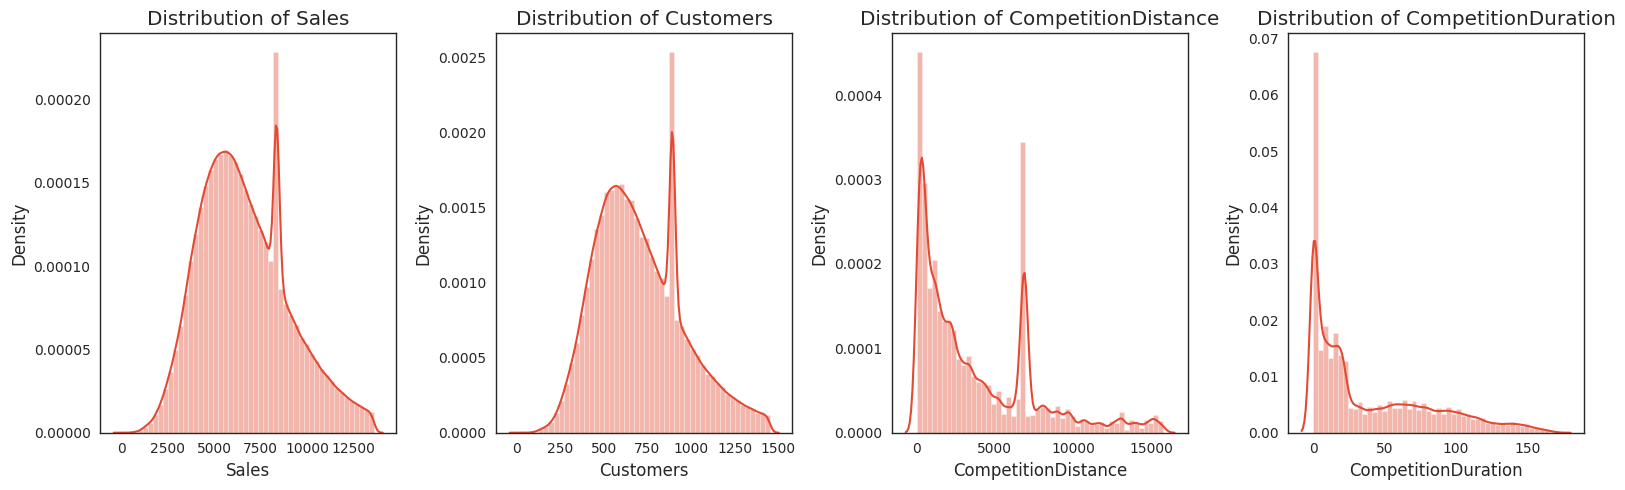

In [ ]:
# Checking the distribution of each continous variable from our final dataframe
plt.figure(figsize=(20,5))
print("Before Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.distplot(final_df[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()


It is clear from above distribution plots that they are not perfectly normally distributed. So we will apply some transformation techniques to get the normally disrtibuted data as it is one of the prior underlying assumption for the linear models such as Linear Regression.




In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot
def plot_data(df,feature):
    stat.probplot(df[feature],dist='norm',plot=pylab)


Q-Q Plot for variable: Sales
Q-Q Plot for variable: Customers
Q-Q Plot for variable: CompetitionDistance
Q-Q Plot for variable: CompetitionDuration


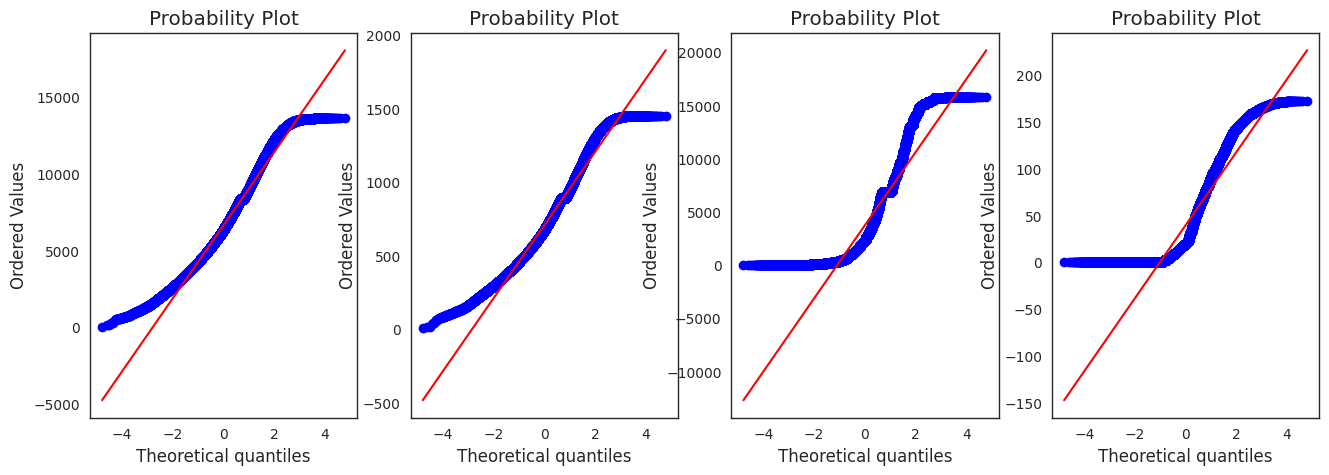

In [ ]:
plt.figure(figsize=(20,5))
for num,column in enumerate(cont_variables):
  plt.subplot(1,5,num+1)
  print(f"Q-Q Plot for variable: {column}")
  plot_data(final_df,column)
plt.show()

As it is clear from above plots that our continous numeric features are not following perfectly normal distribution trend. So, now we will try various transformations techniques to get gaussian distributed curve.

Let's create different copies and check which transformation is best for each feature

In [ ]:
# Creating 5 different copies to check the distribution of each of the variable
test_df1=final_df.copy()
test_df2=final_df.copy()
test_df3=final_df.copy()
test_df4=final_df.copy()
test_df5=final_df.copy()


Logarithmic Transformation

After Applying Transformation


<ipython-input-56-679983919992>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_df1[col])
<ipython-input-56-679983919992>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_df1[col])
<ipython-input-56-679983919992>:12: UserWarning: 

`distplot` is a deprecated function and will be rem

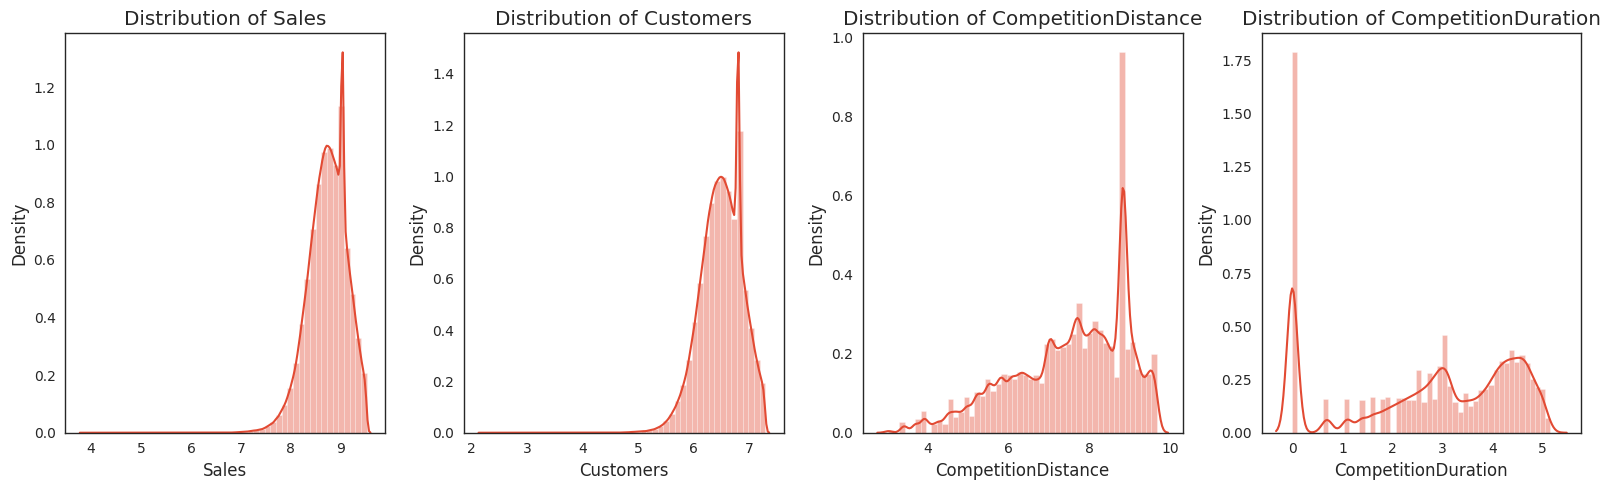

In [ ]:
# Applying transformation on the above considered columns
test_df1['Sales']=np.log(test_df1['Sales']+1)
test_df1['Customers']=np.log(test_df1['Customers']+1)
test_df1['CompetitionDistance']=np.log(test_df1['CompetitionDistance']+1)
test_df1['CompetitionDuration']=np.log(test_df1['CompetitionDuration']+1)

# Checking the distribution of each continous variable by excluding 0 from our final dataframe
plt.figure(figsize=(20,5))
print("After Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.distplot(test_df1[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

Q-Q Plot for variable: Sales
Q-Q Plot for variable: Customers
Q-Q Plot for variable: CompetitionDistance
Q-Q Plot for variable: CompetitionDuration


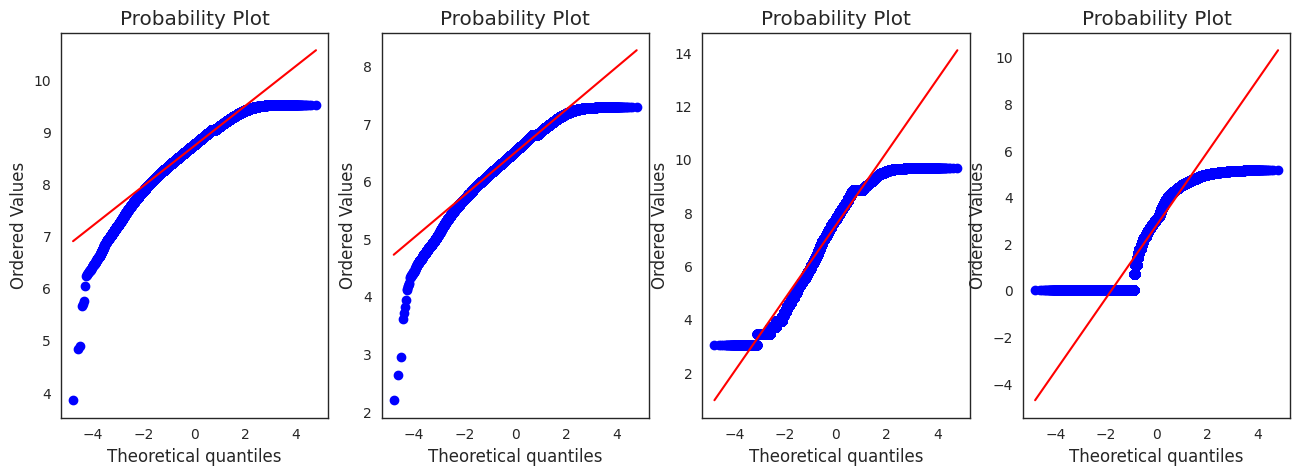

In [ ]:
plt.figure(figsize=(20,5))
for num,column in enumerate(cont_variables):
  plt.subplot(1,5,num+1)
  print(f"Q-Q Plot for variable: {column}")
  plot_data(test_df1,column)
plt.show()

Reciprocal Transformation

After Applying Transformation


<ipython-input-58-a4cb2cda1a3b>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_df2[col])
<ipython-input-58-a4cb2cda1a3b>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_df2[col])
<ipython-input-58-a4cb2cda1a3b>:13: UserWarning: 

`distplot` is a deprecated function and will be rem

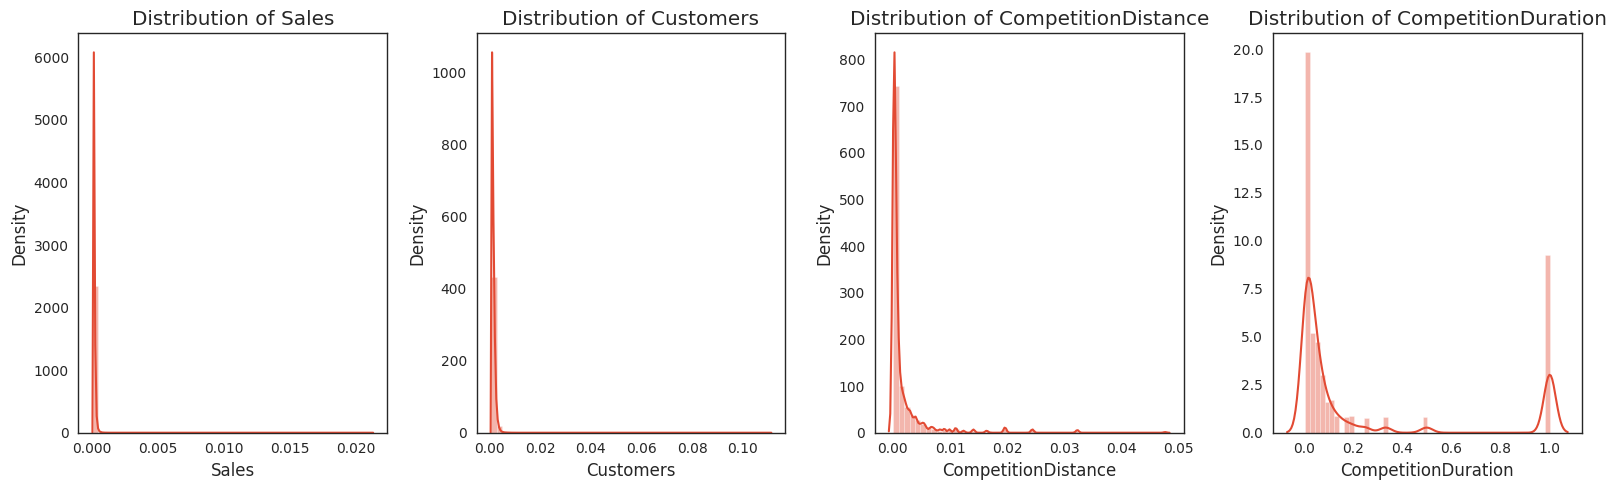

In [ ]:
# Applying transformation on the above considered columns
test_df2['Sales']=1/(test_df2['Sales']+1)
test_df2['Customers']=1/(test_df2['Customers']+1)
test_df2['CompetitionDistance']=1/(test_df2['CompetitionDistance']+1)
test_df2['CompetitionDuration']=1/(test_df2['CompetitionDuration']+1)


# Checking the distribution of each continous variable by excluding 0 from our final dataframe
plt.figure(figsize=(20,5))
print("After Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.distplot(test_df2[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

Q-Q Plot for variable: Sales
Q-Q Plot for variable: Customers
Q-Q Plot for variable: CompetitionDistance
Q-Q Plot for variable: CompetitionDuration


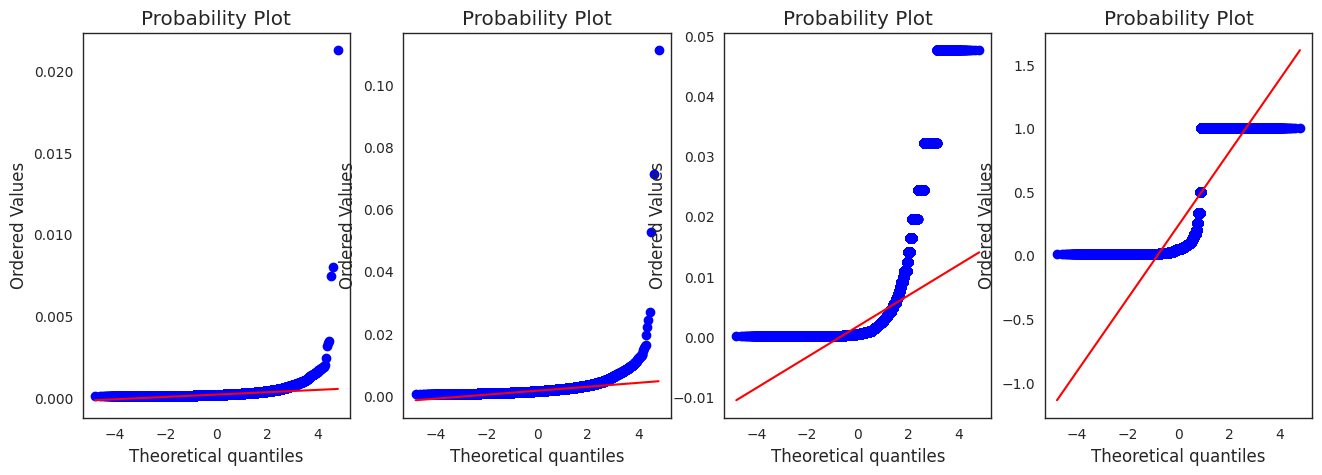

In [ ]:
plt.figure(figsize=(20,5))
for num,column in enumerate(cont_variables):
  plt.subplot(1,5,num+1)
  print(f"Q-Q Plot for variable: {column}")
  plot_data(test_df2,column)
plt.show()


Square Root Transformation

After Applying Transformation


<ipython-input-60-bd1390399ee7>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_df3[col])
<ipython-input-60-bd1390399ee7>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_df3[col])
<ipython-input-60-bd1390399ee7>:12: UserWarning: 

`distplot` is a deprecated function and will be rem

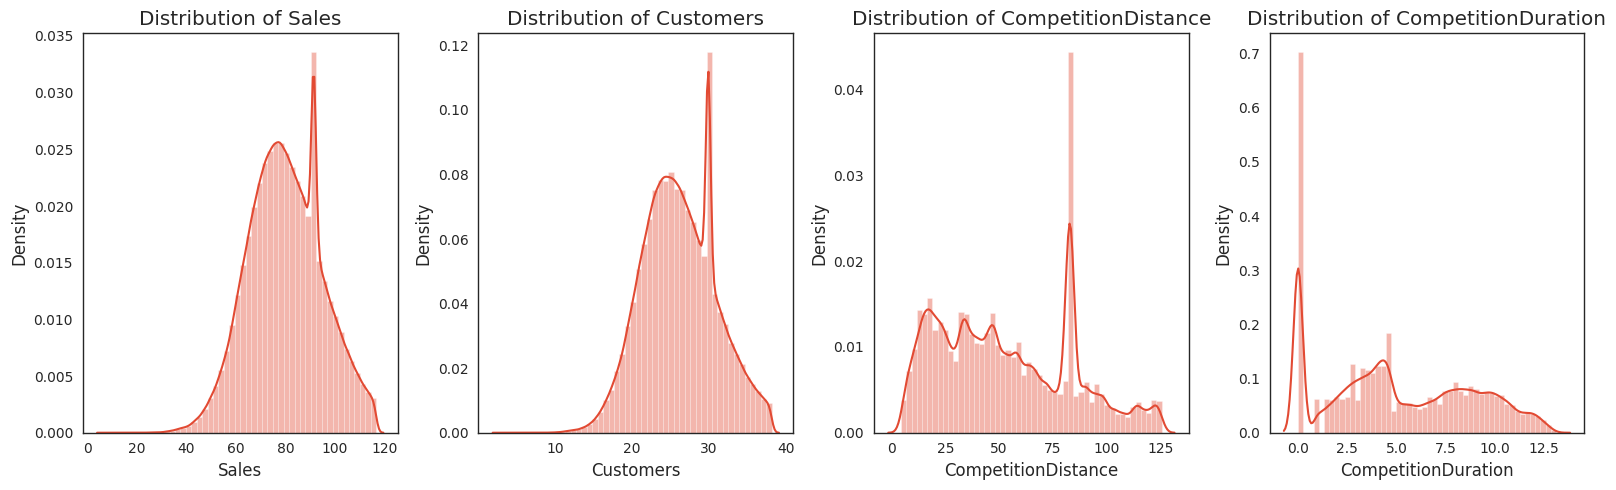

In [ ]:
# Applying transformation on the above considered columns
test_df3['Sales']=(test_df3['Sales'])**(1/2)
test_df3['Customers']=(test_df3['Customers'])**(1/2)
test_df3['CompetitionDistance']=(test_df3['CompetitionDistance'])**(1/2)
test_df3['CompetitionDuration']=(test_df3['CompetitionDuration'])**(1/2)

# Checking the distribution of each continous variable by excluding 0 from our final dataframe
plt.figure(figsize=(20,5))
print("After Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.distplot(test_df3[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

Q-Q Plot for variable: Sales
Q-Q Plot for variable: Customers
Q-Q Plot for variable: CompetitionDistance
Q-Q Plot for variable: CompetitionDuration


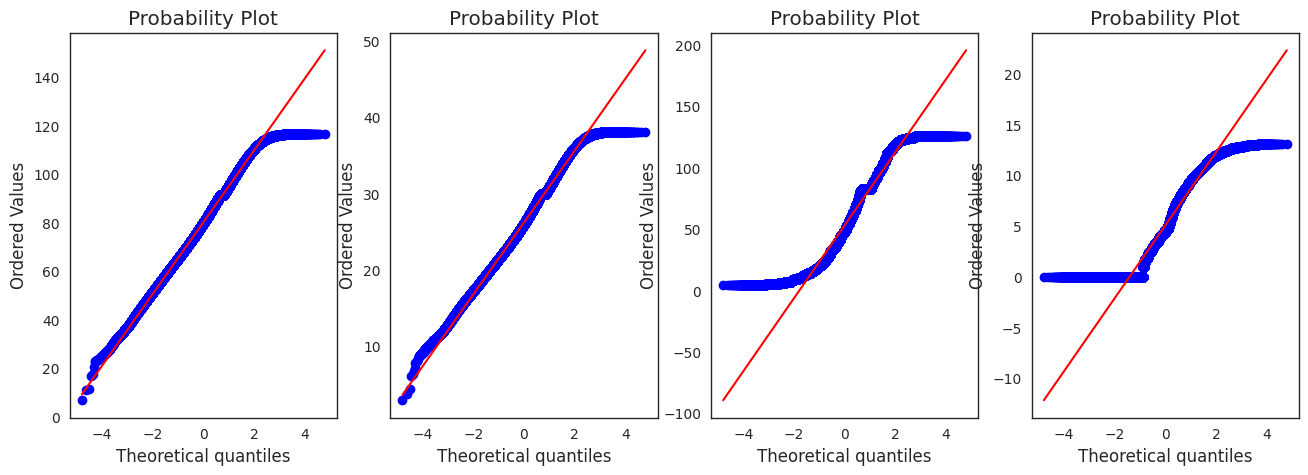

In [ ]:
plt.figure(figsize=(20,5))
for num,column in enumerate(cont_variables):
  plt.subplot(1,5,num+1)
  print(f"Q-Q Plot for variable: {column}")
  plot_data(test_df3,column)
plt.show()

Exponential Transformation

After Applying Transformation


<ipython-input-62-bd03edd9b792>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_df4[col])
<ipython-input-62-bd03edd9b792>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_df4[col])
<ipython-input-62-bd03edd9b792>:12: UserWarning: 

`distplot` is a deprecated function and will be rem

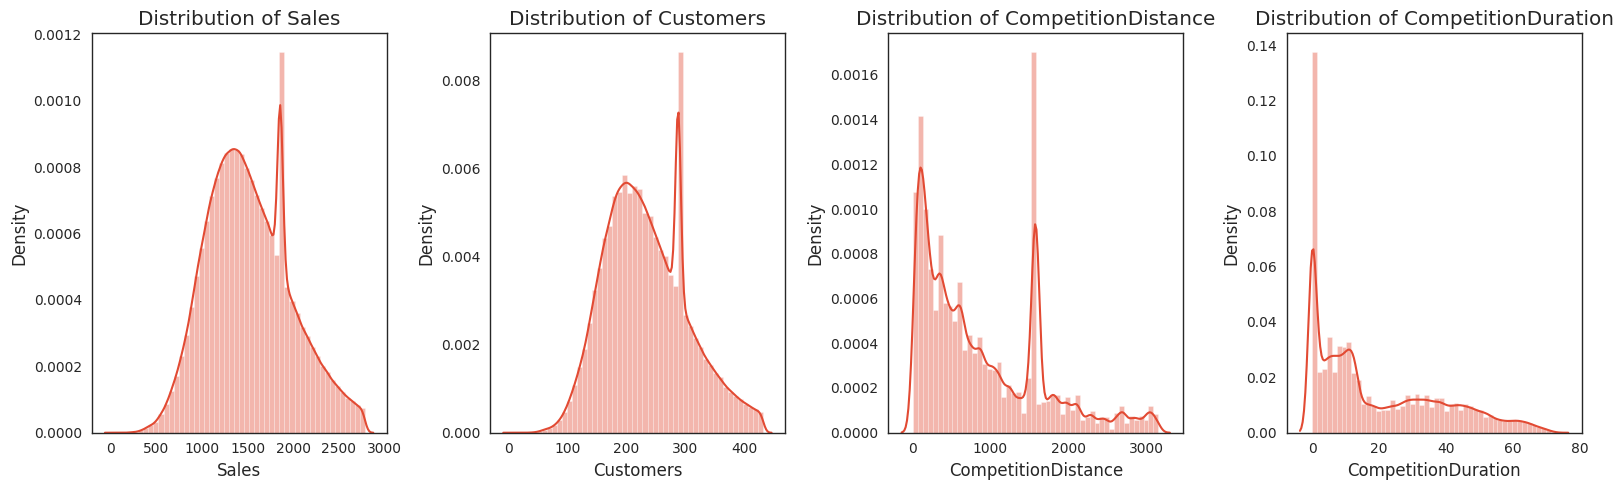

In [ ]:
# Applying transformation on the above considered columns
test_df4['Sales']=(test_df4['Sales'])**(1/1.2)
test_df4['Customers']=(test_df4['Customers'])**(1/1.2)
test_df4['CompetitionDistance']=(test_df4['CompetitionDistance'])**(1/1.2)
test_df4['CompetitionDuration']=(test_df4['CompetitionDuration'])**(1/1.2)

# Checking the distribution of each continous variable by excluding 0 from our final dataframe
plt.figure(figsize=(20,5))
print("After Applying Transformation")
for n,col in enumerate(cont_variables):
  plt.subplot(1,5,n+1)
  sns.distplot(test_df4[col])
  plt.title(f'Distribution of {col}')
  plt.tight_layout()

Q-Q Plot for variable: Sales
Q-Q Plot for variable: Customers
Q-Q Plot for variable: CompetitionDistance
Q-Q Plot for variable: CompetitionDuration


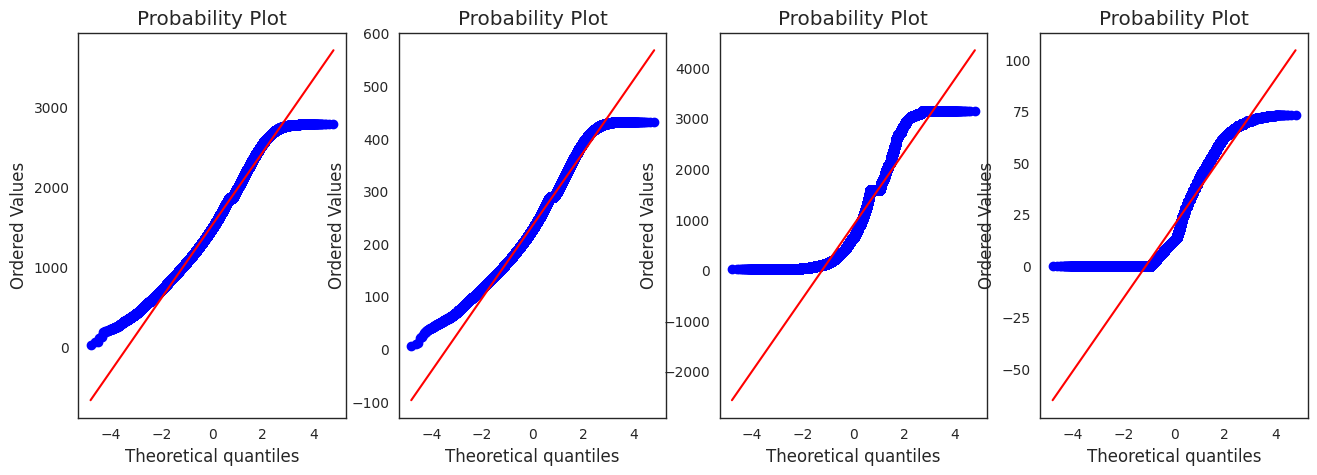

In [ ]:
plt.figure(figsize=(20,5))
for num,column in enumerate(cont_variables):
  plt.subplot(1,5,num+1)
  print(f"Q-Q Plot for variable: {column}")
  plot_data(test_df4,column)
plt.show()

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?



*   Feature "Sales" needs square root transformation.

*   Feature "Customers" needs square root transformation.
*   Feature "CompetitionDistance" needs square root transformation.


*   Feature "CompetitionDuration" no transformation needed.



In [ ]:
# Applying transformation on the above considered columns
## Square root transformation
final_df['Sales']=(final_df['Sales'])**(1/2)
final_df['Customers']=(final_df['Customers'])**(1/2)
final_df['CompetitionDistance']=(final_df['CompetitionDistance'])**(1/2)

<ipython-input-64-45c3e2c99f96>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Sales']=(final_df['Sales'])**(1/2)
<ipython-input-64-45c3e2c99f96>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Customers']=(final_df['Customers'])**(1/2)
<ipython-input-64-45c3e2c99f96>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

### 6. Data Scaling

Before scaling our data let's just seperate our "x" and "y" variables as we do not have to scale our y variable (Target variable).

In [ ]:
# Separating "x" and "y" variables
x= final_df[["DayOfWeek", "Customers","Promo","StateHoliday","SchoolHoliday","CompetitionDistance","Promo2","StoreType_b","StoreType_c","StoreType_d","Assortment_c","PromoInterval_Feb,May,Aug,Nov","PromoInterval_Mar,Jun,Sept,Dec","Day","CompetitionDuration"]]
y= final_df[['Sales']]
print(x.shape)
print(y.shape)

(844338, 15)
(844338, 1)


In [ ]:
# Scaling your data
# Importing StandardScaler library
from sklearn.preprocessing import StandardScaler

In [ ]:
# Creating object
std_regressor= StandardScaler()

In [ ]:
# Fit and Transform
x= std_regressor.fit_transform(x)

##### Which method have you used to scale you data and why?

We have used StandardScaler of sklearn library to scale our data. This is important for us, as features on different scales can lead to poor performance or slow convergence. Standardizing the features also makes it easier to compare different features or observe the effect of a feature on the target variable("Sales") by comparing the magnitude of its coefficient. Additionally, we are going to apply linear regression model for which having normally distributed data is the statistical assumption of the model, which standardization can help enforce.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [ ]:
# Spliting the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
# Checking the shape after spliting
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((675470, 15), (168868, 15), (675470, 1), (168868, 1))

##### What data splitting ratio have you used and why?

Since our dataset is huge and have nearly 10lakh obsevations. So, We have assigned 80% data into train set and 20% into the test set with random_state=0 so that we do not get different observations in every split.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

In [ ]:
# Importing essential libraries to check the accuracy
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
# Defining the function that calculated regression metrics
def regression_metrics(y_train_actual,y_train_pred,y_test_actual,y_test_pred):
  print("-"*50)
  ## mean_absolute_error
  MAE_train= mean_absolute_error(y_train,y_train_pred)
  print("MAE on train is:" ,MAE_train)
  MAE_test= mean_absolute_error(y_test,y_test_pred)
  print("MAE on test is:" ,MAE_test)

  print("-"*50)

  ## mean_squared_error
  MSE_train= mean_squared_error(y_train, y_train_pred)
  print("MSE on train is:" ,MSE_train)
  MSE_test  = mean_squared_error(y_test, y_test_pred)
  print("MSE on test is:" ,MSE_test)

  print("-"*50)

  ## root_mean_squared_error
  RMSE_train = np.sqrt(MSE_train)
  print("RMSE on train is:" ,RMSE_train)
  RMSE_test = np.sqrt(MSE_test)
  print("RMSE on test is:" ,RMSE_test)

  print("-"*50)

  ## mean_absolute_percentage_error
  MAPE_train = mean_absolute_percentage_error(y_train, y_train_pred)*100
  print("MAPE on train is:" ,MAPE_train, " %")
  MAPE_test = mean_absolute_percentage_error(y_test, y_test_pred)*100
  print("MAPE on test is:" ,MAPE_test, " %")

  print("-"*50)

  ## r2_score
  R2_train= r2_score(y_train,y_train_pred)
  print("R2 on train is:" ,R2_train)
  R2_test= r2_score(y_test,y_test_pred)
  print("R2 on test is:" ,R2_test)

  print("-"*50)

  Accuracy_train= 100- MAPE_train
  print("Accuracy of train is:" ,Accuracy_train, " %")
  Accuracy_test= 100- MAPE_test
  print("Accuracy of test is:" ,Accuracy_test, " %")

  print("-"*50)

### ML Model - 1 Linear Regression

In [ ]:
# Importing LinearRegression from sklearn
from sklearn.linear_model import LinearRegression


In [ ]:
# ML Model - 1 Implementation
linear_regressor= LinearRegression()

# Fit the Algorithm
linear_regressor.fit(x_train,y_train)

# Predict the model
y_train_regression_pred= linear_regressor.predict(x_train)
y_test_regression_pred= linear_regressor.predict(x_test)

In [ ]:
# Checking the coefficients
linear_regressor.coef_

array([[ 0.01897995, 12.57582977,  2.78598063, -0.04033691,  0.10933249,
         1.65153343,  1.18626577,  0.06662023, -0.30609499,  2.78863733,
         0.77648252, -0.25561243, -0.47094053,  0.01665519,  0.24632187]])

In [ ]:
# Checking the intercept
linear_regressor.intercept_

array([80.18759328])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Calculating the regression metrics
regression_metrics(y_train,y_train_regression_pred,y_test,y_test_regression_pred)

--------------------------------------------------
MAE on train is: 5.3993639062133285
MAE on test is: 5.397135045548234
--------------------------------------------------
MSE on train is: 51.838213377061194
MSE on test is: 51.85624827426849
--------------------------------------------------
RMSE on train is: 7.199875927893563
RMSE on test is: 7.2011282639783945
--------------------------------------------------
MAPE on train is: 6.756242165207523  %
MAPE on test is: 6.7591153244278885  %
--------------------------------------------------
R2 on train is: 0.7642276479767801
R2 on test is: 0.7648823059686068
--------------------------------------------------
Accuracy of train is: 93.24375783479248  %
Accuracy of test is: 93.24088467557212  %
--------------------------------------------------


**Insights:**


*    This model generalizes well and is not overfitting or underfitting.
*  The model learned the underlying patterns in the data without memorizing the training set.



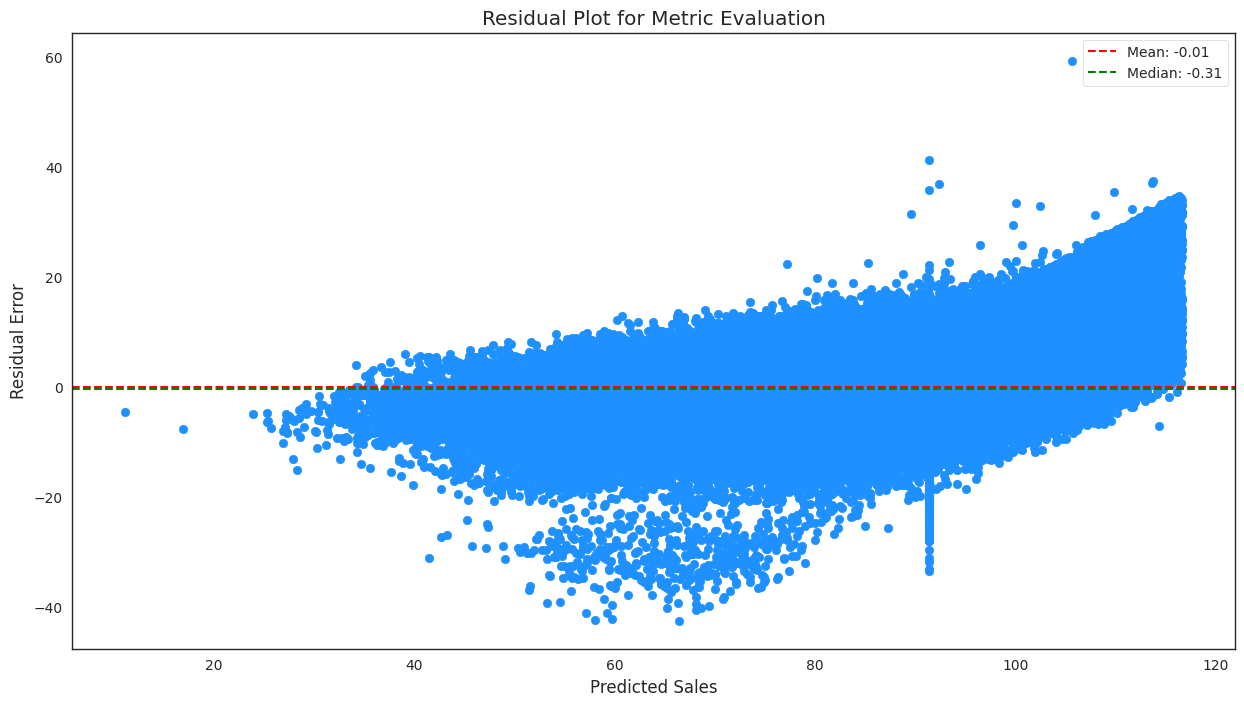

In [ ]:
# Calculating residuals
residuals = y_test - y_test_regression_pred
Mean = round(np.mean(residuals), 2)
Median = round(np.median(residuals), 2)

# Plot residuals
plt.figure(figsize=(15, 8))
plt.scatter(y_test, residuals, c="dodgerblue")
plt.title("Residual Plot for Metric Evaluation")
plt.xlabel('Predicted Sales')
plt.ylabel('Residual Error')

# Add horizontal lines
plt.axhline(y=np.nanmean(residuals), color='red', linestyle='--', label=f"Mean: {Mean}")
plt.axhline(y=np.nanmedian(residuals), color='green', linestyle='--', label=f"Median: {Median}")
plt.legend()

plt.show()




*  Residuals are the differences between actual and predicted values

**Objective of Residual Analysis:**

*   Have a mean of zero
*   randomly distributed

*   Show constant variance (homoscedasticity)
*  Detect bias: Patterns in residuals can indicate the model is missing something (e.g., non-linear trends)


*   There are some extreme residuals (very negative or positive), which might indicate Outliers in the data.



**Insights:**




*   Suggests that the residuals are unbiased.
*  On average, the model doesn’t consistently overestimate or underestimate sales


*   As predicted sales increase, the spread of residuals increases.
*  It suggests that the model is less accurate for stores with higher sales — prediction errors grow as sales increase.


*   There are some extreme residuals (very negative or positive), which might indicate:Outliers in the data.


*   We have started with the most basic and simple ML model i.e Linear Regression. We have tried to evaluate the most important regression metics on both the train and test datesets so that we can conclude our ML model. Here for Linear Regression, we can observe that both the r2 scores are pretty close which explains that on test dataset and our model is following the correct way.
*   We can comprehend that 'dependent' and 'independent' variables are not much following direct linear relationship with each other thats why we got 0.75 maximum r2 score in LR model implementation.


*   Also we are getting the Mean=-0.01 and Median=-0.31 in our residual plot that resembles our predictions are closely following Normal Distribution (Mean=Median=0) because of this our accuracy (100-MAPE) is pretty good in simple linear model.
*  In order to fetch good and more accurate results, we shall go for cross- Validation & Hyperparameter Tuning of 'Lasso', 'Ridge' and 'Elastic Net' models.




#### 2. Cross- Validation & Hyperparameter Tuning

Rigde Regression

In [ ]:
# import ridge regression from sklearn library
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Creating Ridge instance
ridge= Ridge()

# Defining parameters
parameters = {"alpha": [1e-1,1,5,7,10,11,14,15,16,17], "max_iter":[1,2,3]}

# Train the model
ridgeR = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridgeR.fit(x_train,y_train)

# Predict the output
y_train_ridge_pred = ridgeR.predict(x_train)
y_test_ridge_pred = ridgeR.predict(x_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {ridgeR.best_params_}")
print(f"Negative mean square error is: {ridgeR.best_score_}")

The best alpha value found out to be: {'alpha': 5, 'max_iter': 1}
Negative mean square error is: -51.84161630198643


In [ ]:
# Calculating regression metrics for Ridge
regression_metrics(y_train,y_train_ridge_pred,y_test,y_test_ridge_pred)

--------------------------------------------------
MAE on train is: 5.399368317463948
MAE on test is: 5.397139365030184
--------------------------------------------------
MSE on train is: 51.838213390095376
MSE on test is: 51.85624931397073
--------------------------------------------------
RMSE on train is: 7.19987592879873
RMSE on test is: 7.201128336168626
--------------------------------------------------
MAPE on train is: 6.75625264802869  %
MAPE on test is: 6.7591257798631315  %
--------------------------------------------------
R2 on train is: 0.7642276479174976
R2 on test is: 0.7648823012545676
--------------------------------------------------
Accuracy of train is: 93.24374735197131  %
Accuracy of test is: 93.24087422013687  %
--------------------------------------------------


Lasso Regression

In [ ]:
# import lasso regression from sklearn library
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Creating Ridge instance
lasso= Lasso()

# Defining parameters
parameters_lasso = {"alpha": [1e-5,1e-4,1e-3,1e-2,1e-1,1,5], "max_iter":[7,8,9,10]}

# Train the model
lassoR = GridSearchCV(lasso, parameters_lasso, scoring='neg_mean_squared_error', cv=5)
lassoR.fit(x_train,y_train)

# Predict the output
y_train_lasso_pred = lassoR.predict(x_train)
y_test_lasso_pred = lassoR.predict(x_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {lassoR.best_params_}")
print(f"Negative mean square error is: {lassoR.best_score_}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.295e+07, tolerance: 1.188e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.296e+07, tolerance: 1.189e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.293e+07, tolerance: 1.188e

The best alpha value found out to be: {'alpha': 1e-05, 'max_iter': 8}
Negative mean square error is: -51.84164296103468


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.396e+07, tolerance: 1.485e+04
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# Calculating regression metrics for Lasso
regression_metrics(y_train,y_train_lasso_pred,y_test,y_test_lasso_pred)

--------------------------------------------------
MAE on train is: 5.39937005605611
MAE on test is: 5.397141169955692
--------------------------------------------------
MSE on train is: 51.83821341225924
MSE on test is: 51.856248514207515
--------------------------------------------------
RMSE on train is: 7.199875930337914
RMSE on test is: 7.201128280638216
--------------------------------------------------
MAPE on train is: 6.756255374815047  %
MAPE on test is: 6.7591285720161025  %
--------------------------------------------------
R2 on train is: 0.7642276478166912
R2 on test is: 0.7648823048807165
--------------------------------------------------
Accuracy of train is: 93.24374462518496  %
Accuracy of test is: 93.2408714279839  %
--------------------------------------------------


Elastic Net Regression

In [ ]:
# import elastic net regression from sklearn library
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# Creating e_net instance
e_net= ElasticNet()

# Defining hyperparameters
parameters_e_net = {"alpha": [1e-5,1e-4,1e-3,1e-2,1,5], "max_iter":[12,13,14,15]}

# Train the model
e_netR = GridSearchCV(e_net, parameters_e_net, scoring='neg_mean_squared_error', cv=5)
e_netR.fit(x_train,y_train)

# Predict the output
y_train_e_net_pred = e_netR.predict(x_train)
y_test_e_net_pred = e_netR.predict(x_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {e_netR.best_params_}")
print(f"Negative mean square error is: {e_netR.best_score_}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.867e+05, tolerance: 1.188e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.837e+05, tolerance: 1.189e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.760e+05, tolerance: 1.188e

The best alpha value found out to be: {'alpha': 1e-05, 'max_iter': 14}
Negative mean square error is: -51.84164296969463


In [ ]:
# Calculating regression metrics for Elastic Net
regression_metrics(y_train,y_train_e_net_pred,y_test,y_test_e_net_pred)

--------------------------------------------------
MAE on train is: 5.399367672172308
MAE on test is: 5.397138812454814
--------------------------------------------------
MSE on train is: 51.83821338523007
MSE on test is: 51.85624922791782
--------------------------------------------------
RMSE on train is: 7.199875928460855
RMSE on test is: 7.201128330193666
--------------------------------------------------
MAPE on train is: 6.756250488878984  %
MAPE on test is: 6.759123701524286  %
--------------------------------------------------
R2 on train is: 0.7642276479396262
R2 on test is: 0.7648823016447339
--------------------------------------------------
Accuracy of train is: 93.24374951112101  %
Accuracy of test is: 93.24087629847571  %
--------------------------------------------------


##### Which hyperparameter optimization technique have you used and why?

We have used GridSearchCV as the hyperparameter optimization technique as it uses all possible combinations of hyperparameters and their values. It then calculates the performance for each combination and selects the best value for the hyperparameters. This offers the most accurate tuning method.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Despite using Lasso, Ridge and Elastic net models, we couldn't see any significant improvement in the r2 score, MSE and on MAPE as well. This provoked us to go for higher and more complex ML models like Decision trees, Random Forest, XGBoost Regression and LightGBM Regression.

### ML Model - 2 Random Forest

In [ ]:
# import the regressor
from sklearn.ensemble import RandomForestRegressor

# create a regressor object
RF_TreeR = RandomForestRegressor(n_estimators=100, max_depth=18)

# fit the regressor with X and Y data
RF_TreeR.fit(x_train, y_train.values.ravel())

# predict the model
y_train_RFtree_pred= RF_TreeR.predict(x_train)
y_test_RFtree_pred= RF_TreeR.predict(x_test)

In [ ]:
# Calculating Regression Metrics using RandomForestRegressor
regression_metrics(y_train,y_train_RFtree_pred,y_test,y_test_RFtree_pred)


--------------------------------------------------
MAE on train is: 2.0137398275450127
MAE on test is: 2.575852071444091
--------------------------------------------------
MSE on train is: 8.585747348090276
MSE on test is: 13.532803617378933
--------------------------------------------------
RMSE on train is: 2.9301445950823446
RMSE on test is: 3.678695912599862
--------------------------------------------------
MAPE on train is: 2.467426743522226  %
MAPE on test is: 3.1739920520587286  %
--------------------------------------------------
R2 on train is: 0.960950007450833
R2 on test is: 0.938641886249286
--------------------------------------------------
Accuracy of train is: 97.53257325647778  %
Accuracy of test is: 96.82600794794128  %
--------------------------------------------------


Insights:


*   Random Forest has cut errors almost in half compared to linear regression, while increasing accuracy and explained variance significantly.
*  This indicates the data has non-linear patterns that Random Forest is able to capture.



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

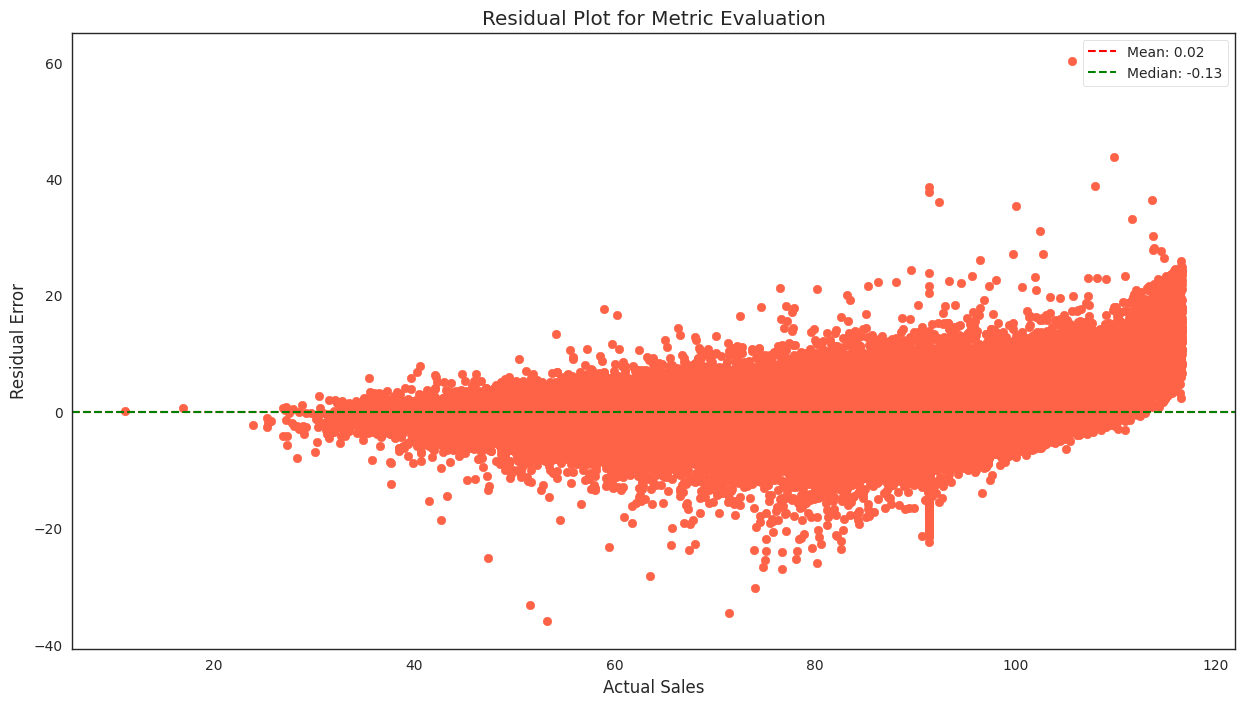

In [ ]:
# Visualizing evaluation Metric Score chart
# Calculating residuals
# Reshape predictions if necessary
y_test_RFtree_pred = y_test_RFtree_pred.reshape(-1, 1)

# Calculate residuals
residuals_RF = y_test - y_test_RFtree_pred
Mean = round(np.mean(residuals_RF), 2)
Median = round(np.median(residuals_RF), 2)

# Plot residuals
plt.figure(figsize=(15, 8))
plt.scatter(y_test, residuals_RF, c="tomato")  # Use residuals_RF, not residuals_DT
plt.title("Residual Plot for Metric Evaluation")
plt.xlabel('Actual Sales')
plt.ylabel('Residual Error')

# Add horizontal lines for mean and median
plt.axhline(y=np.nanmean(residuals_RF), color='red', linestyle='--', label=f"Mean: {Mean}")
plt.axhline(y=np.nanmedian(residuals_RF), color='green', linestyle='--', label=f"Median: {Median}")
plt.legend()

plt.show()


Insights:


*   The residuals are mostly scattered around 0, indicating that the model does not have a consistent bias.
*   Mean ≈ 0.02, Median ≈ -0.13 — very close to 0 — confirms that predictions are balanced on average.


*   For lower and moderate sales values (≈ 20 to 80), residuals are tightly clustered, suggesting very accurate predictions in this range.


*   Compared to the Linear Regression residual plot, this one shows less fanning or increasing spread with higher values.


*   Some increase in variance at high actual sales (90–120), but much better controlled than the earlier model. As actual sales increase, residual errors slightly widen,This means the model may be slightly less precise at predicting extremely high sales, possibly due to:Outliers in the data,Complex patterns not captured well even by Random Forest.





*  we might explore advanced ensembles like XGBoost or add log-transformation or binning to stabilize variance.
 Your Random Forest model performs very well:No systemic bias,Low residual variance,High accuracy,Much improved over linear regression







By implimenting using our third model i.e Random Forest we have achieved the r2 score of 0.96 on training and 0.94 on test dataset that is very good MSE also reduced from 19 to 17 and that means our model is moving towards optimal model. Apart from this our MAPE is also reducing gradually as we are using ensemble of Decision trees that is Bootstrap Aggregation(Bagging) so it is giving equal preference each of the feature while spliting.

We got the Mean=0.02 and Median=-0.13 this shows that as our accuracy increases, our mean and median are shifting towards 0 and the residual error is tending toward gaussian distribution.

In order to get the higher accuracy let's perform hyperparameter tuning for the same model and see if we are getting significant results.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# import ridge regression from sklearn library
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge instance
RF_tree= RandomForestRegressor()

# Defining parameters
parameters= {'n_estimators':[100], 'max_depth': [19,20], 'min_samples_leaf': [1, 2]}

# Train the model
RF_treeR = RandomizedSearchCV(RF_tree, parameters, n_iter=3, n_jobs=-1, scoring='neg_mean_squared_error', cv=3,  verbose=3)
RF_treeR.fit(x_train,y_train)

# Predict the output
y_train_grid_RFtree_pred = RF_treeR.predict(x_train)
y_test_grid_RFtree_pred = RF_treeR.predict(x_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {RF_treeR.best_params_}")
print(f"Negative mean square error is: {RF_treeR.best_score_}")

Fitting 3 folds for each of 3 candidates, totalling 9 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


The best alpha value found out to be: {'n_estimators': 100, 'min_samples_leaf': 1, 'max_depth': 20}
Negative mean square error is: -13.326385699769679


In [ ]:
# Calculating Regression Metrics using GridSearchCV in RandomForestRegressor
regression_metrics(y_train,y_train_grid_RFtree_pred,y_test,y_test_grid_RFtree_pred)

--------------------------------------------------
MAE on train is: 1.5889737339229568
MAE on test is: 2.4177795606923294
--------------------------------------------------
MSE on train is: 5.7173042078368415
MSE on test is: 12.33003667723861
--------------------------------------------------
RMSE on train is: 2.3910884985371914
RMSE on test is: 3.511415195791949
--------------------------------------------------
MAPE on train is: 1.945155712795035  %
MAPE on test is: 2.9839940259470414  %
--------------------------------------------------
R2 on train is: 0.9739963595869137
R2 on test is: 0.9440952655205225
--------------------------------------------------
Accuracy of train is: 98.05484428720497  %
Accuracy of test is: 97.01600597405296  %
--------------------------------------------------


##### Which hyperparameter optimization technique have you used and why?

We have used RandomizedSearchCV in Random Forest since we have huge dataset and it is good for huge and complex models where we just want to select random parameters from the bag of parameters. It reduces the processing and training time by taking the random subsets of the provided parameters wihout compromising the accuracy of the model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After using RandomizedSearchCV with different hyperparameters we saw that their is not much significant improvement observed. Although MSE on test dataset has been reduced from 14 to 13.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3 XGBOOST

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
#import the algorithm
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=100,learning_rate=0.1, max_depth=13)
#fit the algorithm
xgb.fit(x_train,y_train)
# Predict on the mode
y_train_xgb_pred=xgb.predict(x_train)
y_test_xgb_pred=xgb.predict(x_test)

In [ ]:
# calculate evaluation Metric Score
# Import necessary libraries for evaluation metrics
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

# Define the function to calculate evaluation metrics
def cal_metrics_score(y_train, y_train_pred, y_test, y_test_pred):
    """
    Calculates and prints evaluation metrics (R2 and RMSE) for training and testing sets.

    Args:
        y_train (array-like): Actual values for the training set.
        y_train_pred (array-like): Predicted values for the training set.
        y_test (array-like): Actual values for the testing set.
        y_test_pred (array-like): Predicted values for the testing set.
    """
    # Calculate R2 score
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Calculate RMSE
    rmse_train = sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = sqrt(mean_squared_error(y_test, y_test_pred))

    print(f"R2 Score (Train): {r2_train:.4f}")
    print(f"R2 Score (Test): {r2_test:.4f}")
    print(f"RMSE (Train): {rmse_train:.4f}")
    print(f"RMSE (Test): {rmse_test:.4f}")

# Now you can call the function
# calculate evaluation Metric Score
cal_metrics_score(y_train,y_train_xgb_pred,y_test,y_test_xgb_pred)

R2 Score (Train): 0.9628
R2 Score (Test): 0.9454
RMSE (Train): 2.8611
RMSE (Test): 3.4698


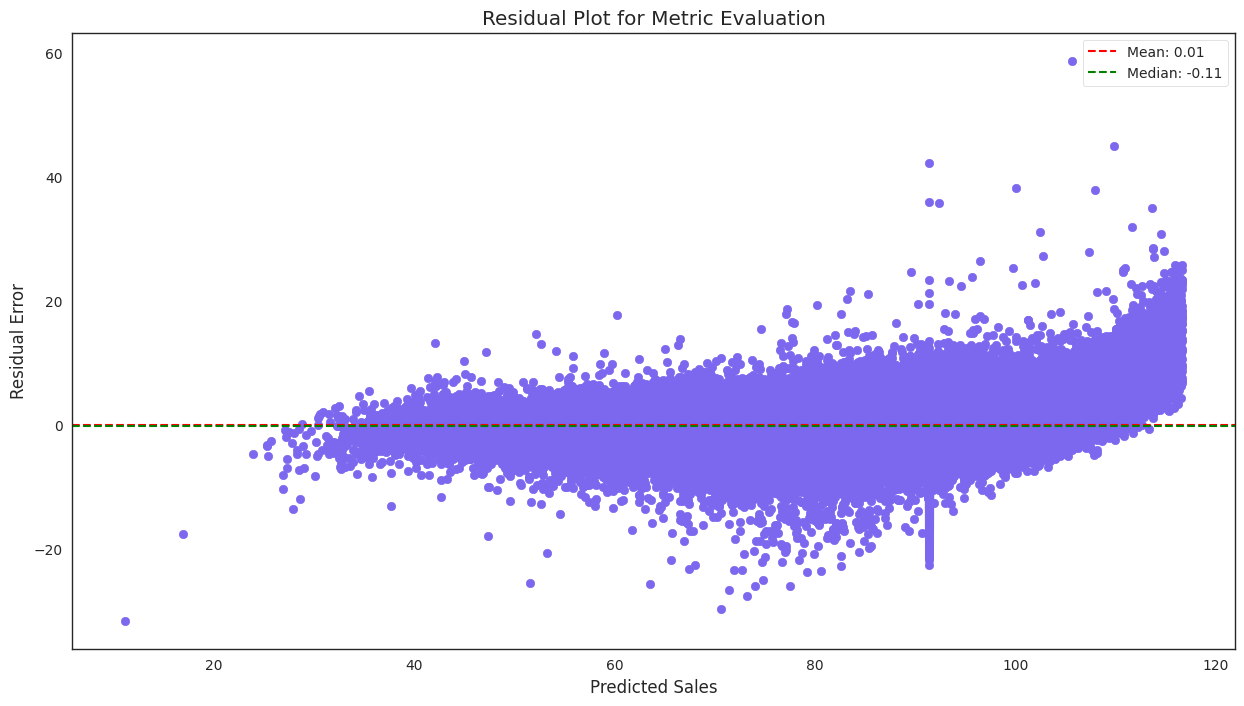

In [ ]:
# Visualizing evaluation Metric Score chart
# Calculating residuals
y_test_xgb_pred = y_test_xgb_pred.reshape(-1,1)
residuals_XG = y_test - y_test_xgb_pred
# Remove the unnecessary round and access as scalar
Mean = np.nanmean(residuals_XG)
Median = np.nanmedian(residuals_XG)

# Plot residuals
plt.figure(figsize=(15,8))
plt.scatter(y_test, residuals_XG, c="mediumslateblue") # Changed residuals_DT to residuals_XG
plt.title("Residual Plot for Metric Evaluation")
plt.xlabel('Predicted Sales')
plt.ylabel('Residual Error')

# Add horizontal line at mean value of y
# Remove the index [0] from Mean
plt.axhline(y=Mean, color='red', linestyle='--', label=f'Mean: {Mean:.2f}')
plt.axhline(y=Median, color='green', linestyle='--', label=f'Median: {Median:.2f}')
plt.legend()

plt.show()

Insights:


*   Mean: 0.01, Median: -0.11 → residuals are tightly centered around 0.


*   Indicates no significant bias — neither persistent overprediction nor underprediction.


*  Residuals form a symmetrical band around 0, especially for mid-range predicted sales.


*  Suggests that errors are normally distributed — a good sign in regression.


*   Compared to the Random Forest residual plot, XGBoost shows tighter clustering even at high predicted values.

*  Much fewer extreme residuals (compared to previous models), especially below -30 or above +30.



*  Reflects robustness and stability in prediction.



*   A very subtle increase in variance at high predicted values (~100–120), though far less pronounced than in Random Forest.
Negative median residual suggests slightly more overpredictions than underpredictions, but the magnitude is small (−0.11).


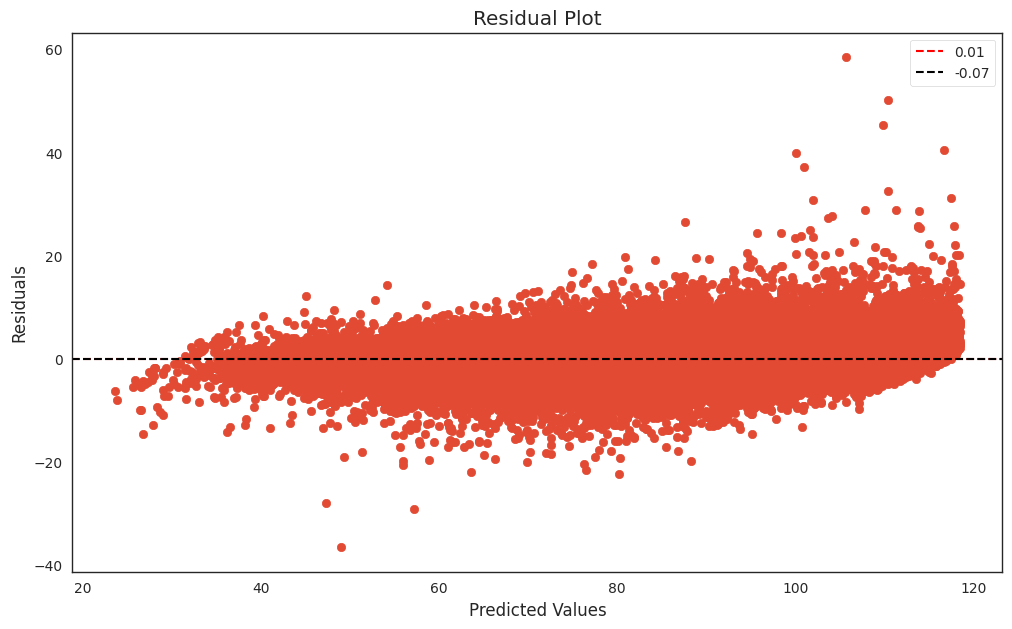

In [ ]:
#plot residuals
y_test_xgbb_pred= y_test_xgb_pred.reshape(-1,1)
residuals=y_test-y_test_xgbb_pred
plt.figure(figsize=(12,7))
plt.scatter(y_test,residuals)
plt.axhline(y=np.nanmean(residuals), color='red', linestyle='--',label=round(np.mean(residuals),2))
plt.axhline(y=np.nanmedian(residuals), color='black', linestyle='--',label=round(np.median(residuals),2))
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()

**Insights:**


*   Mean ≈ 0.01, Median ≈ -0.07 → Very close to zero.Implies no major bias in predictions — the model isn’t consistently over- or under-predicting.

*  Residuals are distributed fairly symmetrically around 0.This is a sign of a well-behaved model in regression.


*  Compared to earlier models, this plot shows a more stable spread of residuals across the range of predicted values.

*   While the spread increases slightly for higher predicted values (above ~90), the variance is lower than in the Random Forest model
and possibly on par or slightly better than XGBoost


*   light funnel shape remains — i.e., variance in residuals increases with larger predictions.
This might indicate some non-constant error variance (mild heteroscedasticity).

After applying XGBoost with 100 estimators, a learning rate of 0.1, and a maximum depth of 13, the model has shown MSE train of 6.05,and the RMSE train score is 2.46, which is the square root of the MSE train score. These scores represent the model's performance on the training data.similarly the MSE test score is 7.89,and the RMSE test score is 2.8. These scores indicate the model's performance on unseen data.

The Model has shown R2 score of 96.97 on training and 96.07 on test, indicating that the model explains approximately 96% of the variability in the target variable. The scatter plot also shows residual mean of 0.01 and residual vlaue of -0.07.

In summary, the XGBoost model with 100 estimators, a learning rate of 0.1, and a maximum depth of 13 demonstrates good performance, with relatively low MSE and RMSE scores and high R2 scores on both the training and test data.

Let's hypertune the model for best performance and best parameters

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# XGBoost with RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Creating XGBoost instance
xgb= XGBRegressor()

# Defining parameters
parameters={"learning_rate":[0.01, 0.1],"max_depth":[12,13]}

# Train the model
xgb_Rand_R= GridSearchCV(xgb,parameters,scoring='neg_mean_squared_error',n_jobs=-1,cv=3,verbose=3)
xgb_Rand_R.fit(x_train,y_train)

# Predict the output
y_train_rand_xgbR_pred = xgb_Rand_R.predict(x_train)
y_test_rand_xgbR_pred = xgb_Rand_R.predict(x_test)

# Printing the best parameters obtained by GridSearchCV
print(f"The best alpha value found out to be: {xgb_Rand_R.best_params_}")
print(f"Negative mean square error is: {xgb_Rand_R.best_score_}")

Fitting 3 folds for each of 4 candidates, totalling 12 fits
The best alpha value found out to be: {'learning_rate': 0.1, 'max_depth': 13}
Negative mean square error is: -12.66681957244873


In [ ]:
# Calculating Regression Metrics using GridSearchCV in RandomForestRegressor
regression_metrics(y_train,y_train_rand_xgbR_pred,y_test,y_test_rand_xgbR_pred)

--------------------------------------------------
MAE on train is: 1.9971612691879272
MAE on test is: 2.4083163738250732
--------------------------------------------------
MSE on train is: 8.185973167419434
MSE on test is: 12.039599418640137
--------------------------------------------------
RMSE on train is: 2.861113973161404
RMSE on test is: 3.4698125912850304
--------------------------------------------------
MAPE on train is: 2.47229915112257  %
MAPE on test is: 2.9756030067801476  %
--------------------------------------------------
R2 on train is: 0.9627683162689209
R2 on test is: 0.9454120993614197
--------------------------------------------------
Accuracy of train is: 97.52770084887743  %
Accuracy of test is: 97.02439699321985  %
--------------------------------------------------


##### Which hyperparameter optimization technique have you used and why?

XGboost is a heavy algorithm and takes much processing time with GridSearchCV. So, tuning of hyperparameter with GridSearchCV was a bit complicated task for us but we have used less parameterts in GridSearchCV because we did'nt want to miss the best parameter combination.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Minor improvement in regresson metrics are also significant now as we are moving towards model perfection. With the help of GridSearchCV we got the r2 score of 0.94 (Now 94% of the variance of test set our model is capturing) for test dataset which is 1% higher than without RandomizedSearchCV and the best parameters found out to be{'learning_rate': 0.1, 'max_depth': 13}. Also we have noticed that our MAPE is further reduced and falling under 3% (Minimum error among all models) and on the other hand MSE is also reduced to 12%. We have also seen that on further increasing the max_depth of tree our model is overfitting so above values of parameters are the best combinations.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Since predicting sales over a period of time falls under the category of "Time series data" and there are following regression metrics that are required as per our goal of analysis (Predicting future Sales):

**MAE(Mean Absolute Error):** This metric calculates the average magnitude of the errors in the predictions, without considering their direction. It has the inverse relation with the accuracy of the model. In regression analysis our aim is to minimise the MAE and ultimately this will create positive business impact.

**RMSE(Root Mean Squared Error):** It is the square root of MSE and this is the most widely use regression metric since it has the same units as the original data so it is easy to interpret the magnitude of error.

**R2_Score:** R2 score(coefficient of determination) is a metric that is widely used in regression analysis because it measures the proportion of the variance in the dependent variable that is explained by the independent variables. R2 score allows analysts to quickly and easily evaluate the goodness of fit of a model and compare different models. It also provides a clear measure of how well the model is explaining the variance in the dependent variable, which can aid in making decisions about model selection and further analysis.

**MAPE(Mean Absolute Percentage Error):** It is calculated by taking the average of the absolute percentage differences between the predicted values and the actual values. This metric is particularly useful when working with time series data(as in our case), as it allows for easy comparison of forecast accuracy across different scales. With the help of MAPE an analyst can easily explain the percentage error to the stakeholders. This metric is considered as one of the most important regression metric in time series data for a positive business impact.

**Accuracy:** In time series data(predicting Sales, Customers, Stock prices, etc) the best metric to calculate the accuracy is 100-MAPE, which is the average of the absolute percentage differences between the predicted values and the actual values. A lower value for 100-MAPE indicates a more accurate model.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [ ]:
# Storing different regression metrics in order to make dataframe and compare them
models = ["Linear_regression","Decision_tree","Random_forest","LightGBM","XGboost"]
MAE_r = [5.38,2.94,2.43,2.83,2.37]
MSE_r = [51.54,17.87,12.47,15.17,11.64]
RMSE_r = [7.17,4.22,3.53,3.89,3.41]
MAPE_r = [6.73,3.63,2.99,3.49,2.93]
r2_r = [0.76,0.91,0.94,0.93,0.94]
accuracy_r = [93.26,96.36,97.00,96.50,97.06]

# Create dataframe from the lists
data = {'Models': models,
        'MAE': MAE_r,
        'MSE': MSE_r,
        'RMSE': RMSE_r,
        'MAPE': MAPE_r,
        'R2': r2_r,
        'Accuracy': accuracy_r
       }
metric_df = pd.DataFrame(data)

# Printing dataframe
metric_df

Models   MAE    MSE  RMSE  MAPE    R2  Accuracy
0  Linear_regression  5.38  51.54  7.17  6.73  0.76     93.26
1      Decision_tree  2.94  17.87  4.22  3.63  0.91     96.36
2      Random_forest  2.43  12.47  3.53  2.99  0.94     97.00
3           LightGBM  2.83  15.17  3.89  3.49  0.93     96.50
4            XGboost  2.37  11.64  3.41  2.93  0.94     97.06

We have chosen XGboost as our final prediction model with hyperparameters {'learning_rate': 0.1, 'max_depth': 13} as it is very clear from above dataframe that it has given the highest accuracy (97%), least MAPE (3%) and maximum r2 score(0.94) on the testing dataset among all other models.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

XGBoost (eXtreme Gradient Boosting) provides an efficient implementation of the gradient boosting framework. It is designed for both linear and tree-based models, and it is useful for large datasets. The basic idea behind XGBoost is to train a sequence of simple models, such as decision trees, and combine their predictions to create a more powerful model. Each tree is trained to correct the errors made by the previous trees in the sequence and this known as boosting.

XGBoost uses a technique called gradient boosting to optimize the parameters of the trees. It minimizes the loss function by adjusting the parameters of the trees in a way that reduces the error of the overall model. XGBoost also includes a number of other features, such as regularization, which helps to prevent overfitting, and parallel processing, which allows for faster training times.

Although tree based algorithm gives most accurate results but they have less explanability. With the help of some explanabilty tools like LIME and SHAP we can explain our model to the stakeholders.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

**Conclusions drawn from EDA**

xploratory Data Analysis (EDA) is an important step because it allows for the initial investigation of a dataset. It helps to identify patterns, anomalies, and relationships in the data, as well as to detect any potential issues such as missing values or outliers. EDA also helps to generate hypotheses and inform the development of more advanced modeling techniques, such as machine learning. Additionally, it is a good way to understand the data, which is crucial for good decision making. EDA also helps to provide a deeper understanding of the data and helps to guide the direction of further analysis. After performing EDA we have drawn the following conclusions:


*  Sales vs Customers graph shows positive correlation between 'Sales' and 'Customers'. As the number of customers increases, the sales also tend to increase.

*   December being a festive month attracts more sale than the rest of the months. Also, November has slightly more sales than other months. This could be due to the 'Black Friday' sale which is very popular across the globe. As Rossmann Stores deals in health and beauty products, it can be guessed that November and December sales are due to the celebratory nature of people who love to buy beauty/health products leading to the sudden increase in sales.

*   Day 1 and day 7 witness the highest sale indicating they are probably days falling on the weekend. Day 2 to day 6 generate medium to low sales indicating they are probably weekdays where customer footfall is low.

*   Sales for the store type b is the highest . Store type B might be located in a more affluent or high-traffic area, which would increase the number of potential customers. Store type B may have a more favorable layout, which makes it more attractive to customers and makes it easier for them to find the products they want, resulting in more sales.
*   Sales are highest for the assortment b . This assortment may have a good mix of products that are in high demand or that are unique to the store, which would result in more sales.


*   From plot sales and competition Open Since Month shows sales go increasing from Novemmber and highest in month December. This may be due to Christmas eve and New Year.


*   We can conclude from sales vs promo2 graph that customers are slightly less responsive to the stores(i.e sales) that are running consecutive promotions. One possibility could be customers might have already taken advantage of a similar promotion earlier. Another reason could be store might not have invested enough in promoting the promotion to customers, resulting in lower awareness and fewer sales. Also, if the store is running same promotion again and again, it could have resulted into lower customer footfal and ultimately leadind to fewer sales.


*   Sales vs Promo2SinceYear barplot explains that sales were still the highest when the store wasn't running any consecutive promotional events. But in 2014, the sales were really shoot up and they are recorded as 2nd highest. Good quality products, better deals, shutdown of competitions etc could be the reasons.



**Conclusions drawn from ML Model Implementation**

Close predictions of any ML model highly impacts the business growth. Before going to further model deployment one should have to check how accurately the model is predicting and performing with the real life data.

Conclusions drawn from any model are very helpful to identify wheather the model is fully baked and good to go for deployment process or needs further refinement. In this section first we will talk about some general points that are essential for every ML model and then will talk about the project oriented conclusions we made:


**General conclusions:**
*  The implementation of an ML model can greatly improve the performance and accuracy of a system or application.


*  It is important to carefully select and preprocess the data used for training and testing the model.

*   Regular evaluation and tuning of the model is necessary to ensure optimal performance.
*   The use of appropriate evaluation metrics can help to measure the
performance of the model.


*   The integration of the model into the system or application should be done in a way that allows for easy maintenance and updates.

**Project conclusions:**
we have implemented various regression model started with Linear Regression and then we have tried other non linear models too. For each of the model we have tried to tune the hyperparameters as well in order to minimize the errors and drawn following conclusions.


*   In Linear Regression we got the accuracy of ~93% and the model is capturing 75% of variance even after using regularization techniques that means our data is not perfectly linearly dependent with target variable(Sales).
*  For Decsion Tree we have achieved ~96.3% accuracy with maximum depth of 18 and on increasing the depth over it we are falling towards overfitting and MAPE of 3.6% which ultimately increases the mean absolute percentage error.



*   Giving preference to each of the variable always results in better accuracy as small subsets can provide significant accuracy percentage. Ensemble technique i.e Random Forest has given the accuray of ~96.96% with total trees of 100 in the forest with hyperparameter tuning.
*   We have also tried gradiant boosting technique with LightGBM although we got the similar results as Random Forest(~96.4%) but we got the more fast results as it has used all the cores and decrease processing time. While training the large dataset one should try LightGBM for good results in less time.




*   At last we have implemented our final model i.e XGboost and achieved the accuracy of 97% with mean absolute percentage error of only 2%. Also we got the mean and median of residuals at 0.09 which is indicating towards excellent residual plot.
Since, a good residual plot have the following characteristics:


1.  It should contain high density of points close to the origin and a low density of points away from the origin.
2.   It is symmetric about the origin.


The residual plot obtained from XGboost of fulfilling both the characteristics and from the above experiments and identifications we have choosen the XGboost as our final optimal model for deployment.



### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***